<a href="https://colab.research.google.com/github/awitz23/master_thesis/blob/main/prototype_and_empirical_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dependencies

In [2]:
!pip install scikit-learn
from sklearn.ensemble import RandomForestClassifier


In [3]:
!pip install pm4py
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import os
import sys
import pm4py
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from tqdm.auto import tqdm
import random


import pandas as pd
import pm4py

#insert path to saved Event-Log
data_path = r"/content/drive/MyDrive/BPI_Challenge_2017.xes.gz"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26095 sha256=0fa0404adde0698d483745fddde5d16b5d53dd1589389d7b5617fad49b8f7f35
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
  Created wheel for stringdist: filename=StringDist-1.0.9-cp310-cp310-linux_x86_64.whl size=16966 sha256=a536593147772dfd26b1806d946bb6f18ad5e5c8e88d3be2d7f74271e7b5ceba
  Stored in directory: /root/.cache/pip/wheels/79/25/0a/4a0c2c7af31a8b473f6e10e30312396f31ae899722600d7b99
Successfully built intervaltree stringdist
Mounted at /content/drive


In [4]:
#Read event log and transform to DF

if __name__ == "__main__":
    log = pm4py.read_xes(data_path)

df = log

/usr/local/lib/python3.10/dist-packages/pm4py/util/dt_parsing/parser.py:77: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/31509 [00:00<?, ?it/s]

In [5]:
log1 = log

In [6]:
df = log

#Import bucket data
only applicable if data is already available, which makes re-reading unnecessary

only a time saving

In [ ]:
data_path = r"/content/drive/MyDrive/df_all_infos_single_bucket.csv"

In [ ]:
df = pd.read_csv(data_path)

#Preprocessing

#Data exploration

In [272]:
depict_list = ['Application_836389034', 'Application_13372270', "Application_731298327"]

In [273]:
selected_rows = log1[log1["case:concept:name"].isin(depict_list)]
print(selected_rows)

              Action org:resource             concept:name  EventOrigin  \
11640        Created       User_1     A_Create Application  Application   
11644        Created       User_1   W_Complete application     Workflow   
11645    statechange       User_1                A_Concept  Application   
11646       Obtained      User_15   W_Complete application     Workflow   
11647    statechange      User_15               A_Accepted  Application   
...              ...          ...                      ...          ...   
1023063     Obtained      User_75  W_Call incomplete files     Workflow   
1023064  statechange      User_75             A_Incomplete  Application   
1023065     Released      User_75  W_Call incomplete files     Workflow   
1023067  statechange     User_131                A_Pending  Application   
1023068      Deleted     User_131  W_Call incomplete files     Workflow   

                      EventID lifecycle:transition  \
11640    Application_13372270             com

In [274]:
#count activities
event_count = log['concept:name'].value_counts()
event_count

W_Validate application        209424
W_Call after offers           190968
W_Call incomplete files       168446
W_Complete application        148802
O_Create Offer                 42970
O_Created                      42970
O_Sent (mail and online)       39682
A_Validating                   38801
A_Create Application           31488
A_Accepted                     31488
A_Concept                      31488
A_Complete                     31341
O_Returned                     23296
A_Incomplete                   23045
A_Pending                      17222
A_Cancelled                    10416
A_Denied                        3753
W_Assess potential fraud        3282
O_Sent (online only)            2026
W_Shortened completion           238
W_Personal Loan collection        22
Name: concept:name, dtype: int64

In [275]:
event_count

value_cases = "A_Create Application"
number_cases = event_count.loc[value_cases]


min_count = number_cases

events_smaller_cases = event_count.index[event_count <= min_count]

In [276]:
names = (log['concept:name'].unique())

In [277]:
#count unique Applications
print(log['case:concept:name'].nunique())

31488


In [278]:
#get unique variants (--> variants = similar traces)
len(pm4py.get_variants_as_tuples(log))

15267

In [279]:
variants = pm4py.get_variants(log)

In [280]:
# how does the process start
pm4py.get_start_activities(log)


{'A_Create Application': 31488}

In [281]:
# how does the process end
pm4py.get_end_activities(log)

{'W_Validate application': 15668,
 'W_Call incomplete files': 6095,
 'W_Call after offers': 9446,
 'W_Complete application': 144,
 'W_Assess potential fraud': 102,
 'W_Personal Loan collection': 2,
 'W_Shortened completion ': 5,
 'A_Denied': 1,
 'O_Sent (online only)': 8,
 'O_Sent (mail and online)': 16,
 'O_Returned': 1}

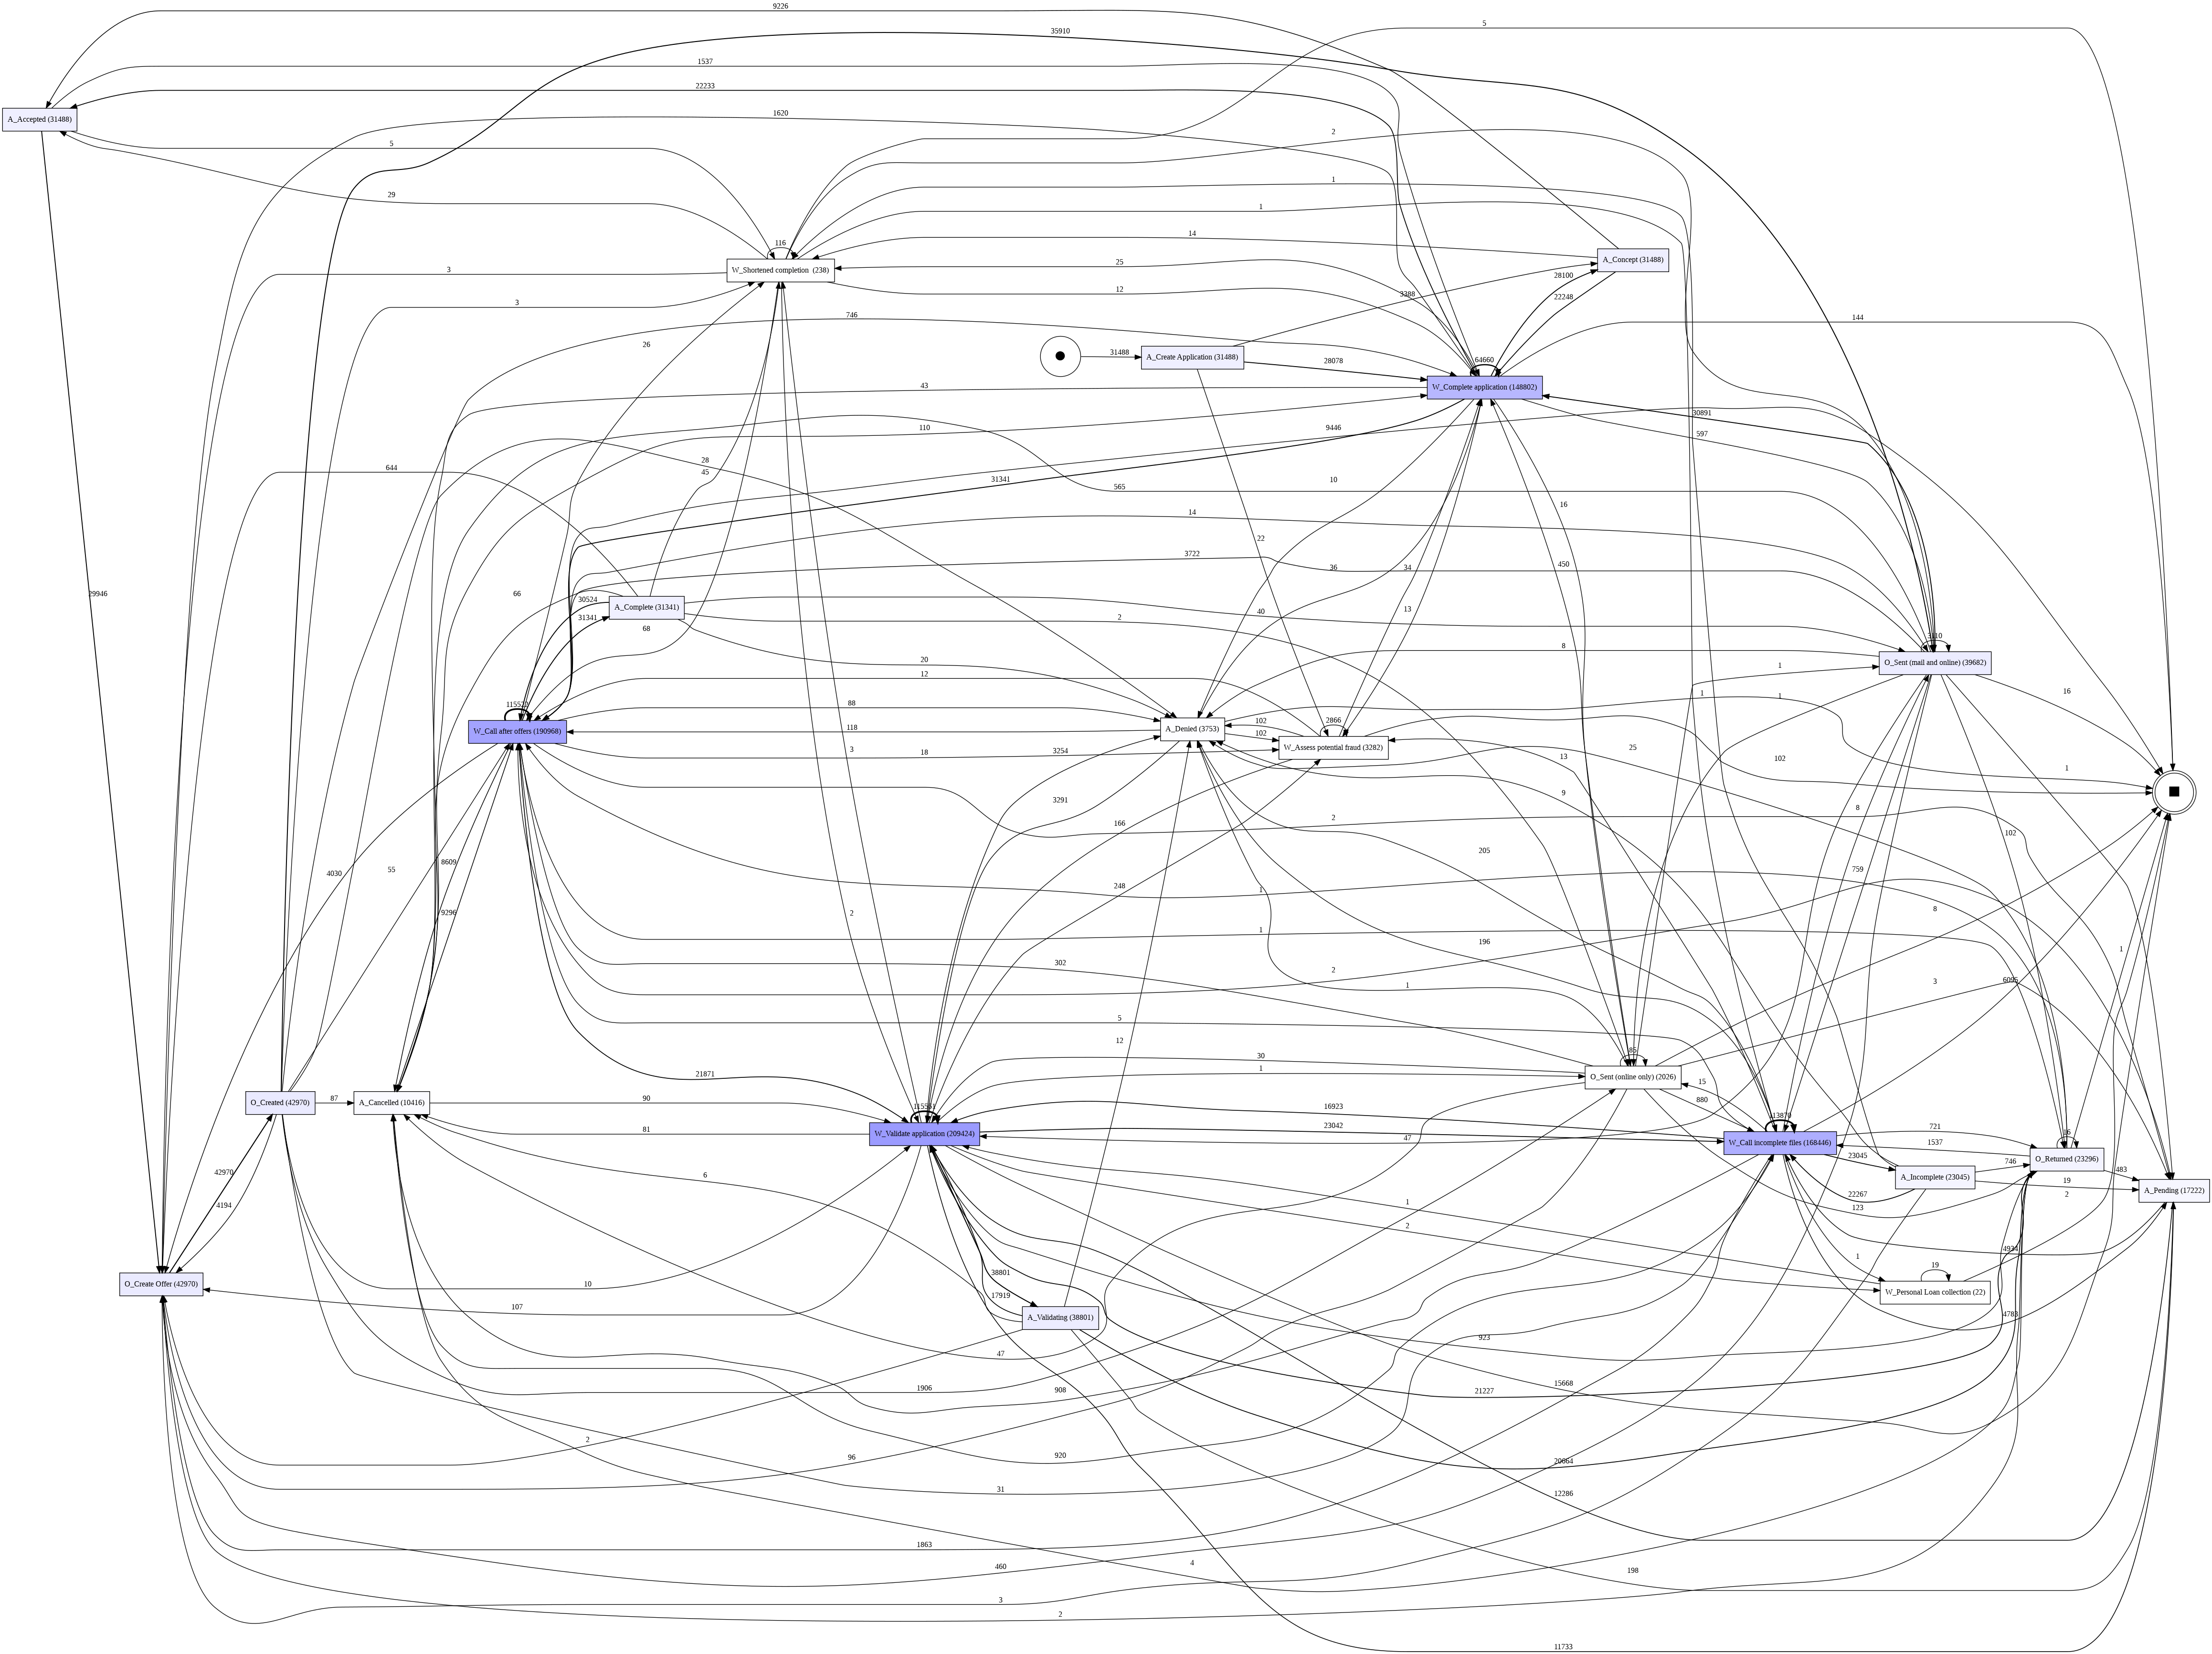

In [282]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log)
pm4py.view_dfg(dfg, start_activities, end_activities)

#Data exploration - charts

In [283]:
id_counts = df.groupby('case:concept:name').size()

# Displaying the counts for each ID
#print(id_counts)

average_rows_per_id = id_counts.median()

# Displaying the average
print("Average number of rows per ID:", average_rows_per_id)

print(id_counts.max())
print(id_counts.min())

Average number of rows per ID: 19.0
19
19


In [284]:
mask = df.groupby('case:concept:name')['concept:name'].apply(lambda x: any(x.isin(["A_Pending", "A_Denied", "A_Cancelled"])))

filtered_ids = df.groupby('case:concept:name')['concept:name'].apply(lambda x: any(x.isin(["A_Pending", "A_Denied", "A_Cancelled"])))

filtered_ids = filtered_ids[mask]
# Displaying the filtered IDs
#print(filtered_ids)

#print(id_counts)

In [285]:
filtered_ids

Series([], Name: concept:name, dtype: bool)

In [286]:
average_rows_per_id = filtered_ids.median()

# Displaying the average
print("Average number of rows per ID:", average_rows_per_id)

print(id_counts.max())
print(id_counts.min())

Average number of rows per ID: nan
19
19


In [287]:
concatenated_df = pd.concat([id_counts, mask], axis=1)
#print(concatenated_df[concatenated_df['concept:name']])
completed_cases = concatenated_df[concatenated_df['concept:name']]
completed_cases = completed_cases.drop('concept:name', axis=1)
#completed_cases.set_index('case:concept:name', inplace=True)
print(type(completed_cases))
print(type(id_counts))

completed_cases_series = completed_cases[0]

# Displaying the Series
print(completed_cases_series)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
Series([], Name: 0, dtype: int64)


In [288]:
average_rows_per_id = completed_cases.mean()

# Displaying the average
print("Average number of rows per ID:", average_rows_per_id)

print(id_counts.max())
print(id_counts.min())

Average number of rows per ID: 0   NaN
dtype: float64
19
19


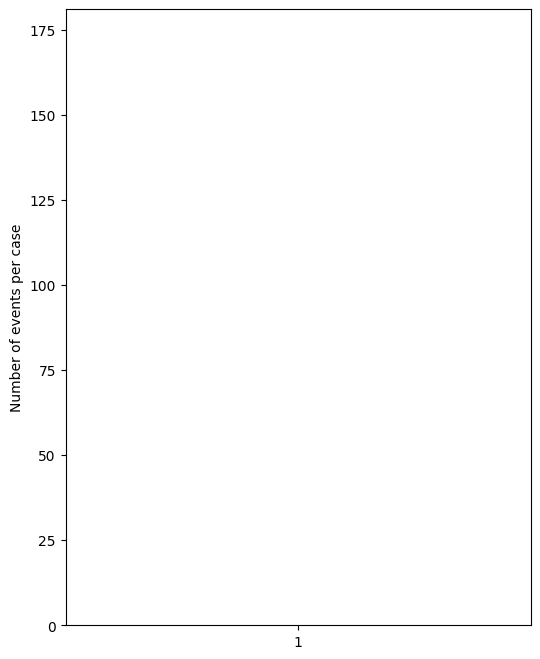

In [289]:
#Boxplot for number of events per case

import matplotlib.pyplot as plt


average_rows_per_id = completed_cases.mean()
median_rows_per_id = completed_cases.median()


plt.figure(figsize=(6, 8))
plt.boxplot([completed_cases_series],
            labels=['1'])
plt.ylabel('Number of events per case')
plt.title('')
plt.ylim(0,181)
#plt.savefig('boxplot_events_per_id.png', bbox_inches='tight')  # Change the filename and format as needed
plt.show()


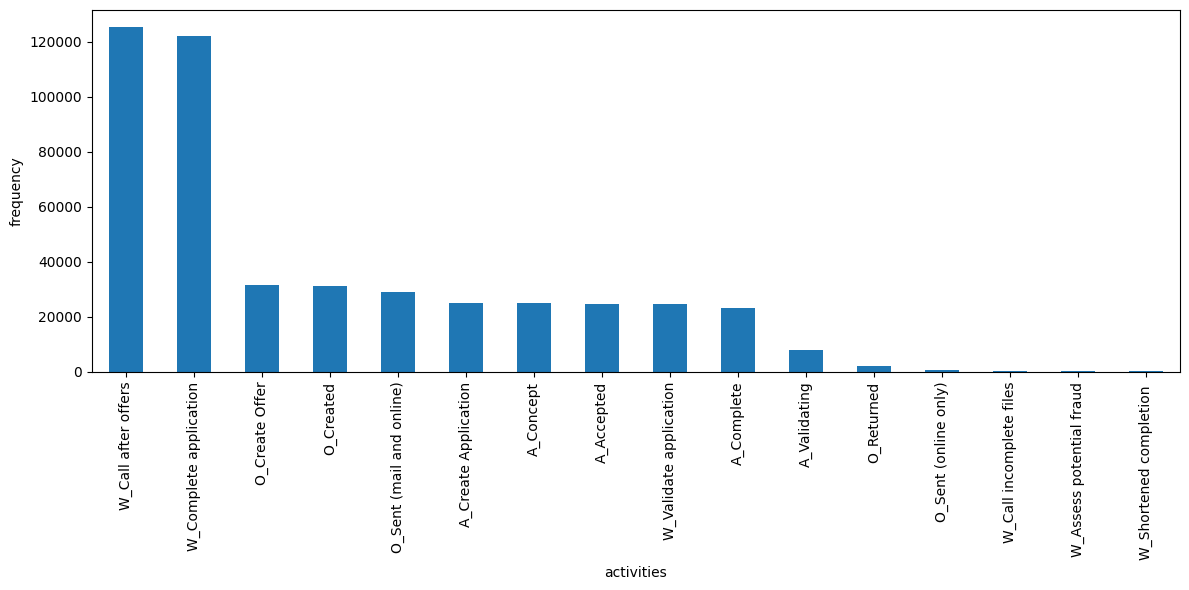

In [290]:
case_value_counts = df['concept:name'].value_counts()

plt.figure(figsize=(12, 6))
case_value_counts.plot(kind='bar')
plt.title('')
plt.xlabel('activities')
plt.ylabel('frequency')
plt.xticks(rotation=90)
plt.tight_layout()
#plt.savefig('frequence_activities.png', bbox_inches='tight')
plt.show()

#Preprocessing und Bucketing (prefix bucketing)

In [44]:
log = log1

In [45]:
log["start"]=pd.to_datetime(log['time:timestamp'])
log['start'] = log.groupby('case:concept:name')['start'].transform('min')
log['Time_Passed'] = log['time:timestamp'] - log['start']
log['Time_Passed_seconds'] = log['Time_Passed'].dt.total_seconds()


In [46]:
(log['Time_Passed'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 1202267 entries, 0 to 1202266
Series name: Time_Passed
Non-Null Count    Dtype          
--------------    -----          
1202267 non-null  timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 9.2 MB


In [47]:

log.drop(log[log["concept:name"] == "O_Accepted"].index, inplace=True)
log.drop(log[log["concept:name"] == "O_Refused"].index, inplace=True)
log.drop(log[log["concept:name"] == "O_Cancelled"].index, inplace=True)
log.drop(log[log["concept:name"] == "W_Handle leads"].index, inplace=True)
log.drop(log[log["concept:name"] == "A_Submitted"].index, inplace=True)


Filter out data so that the model is not trained with the data that is to be predicted later

In [48]:
list_all_id = log['case:concept:name'].tolist()

set_id = set(list_all_id)

pred_id_list = [#negative predictions
                "Application_828200680",
                "Application_1350494635",
                "Application_1085880569",
                "Application_1266995739",
                "Application_387012864",
                "Application_1722592475",
                "Application_61571417",
                "Application_1986755838",
                "Application_2000018435",
                'Application_1710223761',
                'Application_42838382',
                'Application_1966208034',
                'Application_838340812',
                'Application_380535005',
                'Application_1229851589',

                #positive predictions

                "Application_13372270",
                "Application_1685316652",
                "Application_13372270",
                "Application_1272568966",
                "Application_1252110212",
                "Application_428409768",
                "Application_652823628",
                ]

print(pred_id_list)


log = log.drop(log.loc[log['case:concept:name'].isin(pred_id_list)].index, inplace=False)
pred_id_df = df.loc[df['case:concept:name'].isin(pred_id_list)]

from random import randrange

#fix prefix length to r, for the following 19 is chosen, but any other prefix length is possible
r=19


from pm4py.objects.log.obj import EventLog, Trace
pred_id_df_prefixes_Accepted = pm4py.filter_prefixes(pred_id_df, 'A_Pending', activity_key='concept:name', timestamp_key='time:timestamp', case_id_key='case:concept:name')
pred_id_df_prefixes_Denied = pm4py.filter_prefixes(pred_id_df, 'A_Denied', activity_key='concept:name', timestamp_key='time:timestamp', case_id_key='case:concept:name')
pred_id_df_prefixes_Cancelled = pm4py.filter_prefixes(pred_id_df, 'A_Cancelled', activity_key='concept:name', timestamp_key='time:timestamp', case_id_key='case:concept:name')

pred_id_df_prefixes_Accepted["label"] = "accepted"
pred_id_df_prefixes_Cancelled["label"] = "not"
pred_id_df_prefixes_Denied["label"] = "not"

#generate df of log prefixes with length = r
trimmed_pred_id_df_Accepted = pm4py.get_prefixes_from_log(pred_id_df_prefixes_Accepted, length=r, case_id_key='case:concept:name')
trimmed_pred_id_df_Denied = pm4py.get_prefixes_from_log(pred_id_df_prefixes_Denied, length=r, case_id_key='case:concept:name')
trimmed_pred_id_df_Cancelled = pm4py.get_prefixes_from_log(pred_id_df_prefixes_Cancelled, length=r, case_id_key='case:concept:name')

pred_id_df_labeled_prefixes= pd.concat([trimmed_pred_id_df_Accepted, trimmed_pred_id_df_Denied, trimmed_pred_id_df_Cancelled], axis=0)


['Application_828200680', 'Application_1350494635', 'Application_1085880569', 'Application_1266995739', 'Application_387012864', 'Application_1722592475', 'Application_61571417', 'Application_1986755838', 'Application_2000018435', 'Application_1710223761', 'Application_42838382', 'Application_1966208034', 'Application_838340812', 'Application_380535005', 'Application_1229851589', 'Application_13372270', 'Application_1685316652', 'Application_13372270', 'Application_1272568966', 'Application_1252110212', 'Application_428409768', 'Application_652823628']


In [49]:
#Check if extraction worked

one_point = pred_id_df_labeled_prefixes[pred_id_df_labeled_prefixes["case:concept:name"]=="Application_1266995739"]


#print(one_point)

Prefixes

prefix buckets

In [50]:
d = {}
i=0
for i in range(21):

#generate log prefixes for all events that end with "A_Pending", last events, after "A_Pending" are deleted
#in the end, keep a df of all traces that end with A_Pending

  from pm4py.objects.log.obj import EventLog, Trace
  log_prefixes_Accepted = pm4py.filter_prefixes(log, 'A_Pending', activity_key='concept:name', timestamp_key='time:timestamp', case_id_key='case:concept:name')
  log_prefixes_Denied = pm4py.filter_prefixes(log, 'A_Denied', activity_key='concept:name', timestamp_key='time:timestamp', case_id_key='case:concept:name')
  log_prefixes_Cancelled = pm4py.filter_prefixes(log, 'A_Cancelled', activity_key='concept:name', timestamp_key='time:timestamp', case_id_key='case:concept:name')

  log_prefixes_Accepted["label"] = "accepted"
  log_prefixes_Cancelled["label"] = "not"
  log_prefixes_Denied["label"] = "not"

  #generate df of log prefixes with length = i, loop until i=21
  trimmed_log_Accepted = pm4py.get_prefixes_from_log(log_prefixes_Accepted, length=i, case_id_key='case:concept:name')
  trimmed_log_Denied = pm4py.get_prefixes_from_log(log_prefixes_Denied, length=i, case_id_key='case:concept:name')
  trimmed_log_Cancelled = pm4py.get_prefixes_from_log(log_prefixes_Cancelled, length=i, case_id_key='case:concept:name')

  data_labeled_prefixes= pd.concat([trimmed_log_Accepted, trimmed_log_Denied, trimmed_log_Cancelled], axis=0)


  id_counts = data_labeled_prefixes['case:concept:name'].value_counts()

  # filter IDs that appear exactly i-times so that shorter or longer IDs don't appear in the prefix bucket
  valid_ids = id_counts[id_counts == i].index

  filtered_df = data_labeled_prefixes[data_labeled_prefixes['case:concept:name'].isin(valid_ids)]
  d['data_labeled_prefixes{0}'.format(i)] = filtered_df



  i+=1






<ipython-input-50-2869ab5ac14d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_prefixes_Cancelled["label"] = "not"


In [51]:
help= log_prefixes_Cancelled["case:concept:name"]

help.drop_duplicates()

647        Application_1111870538
672        Application_1017492916
912         Application_196483749
942        Application_1363980603
964        Application_1553362978
                    ...          
1198410    Application_1542780878
1198431     Application_434636699
1198562    Application_1865447865
1198646     Application_909810703
1198771     Application_188935499
Name: case:concept:name, Length: 10416, dtype: object

In [52]:
#get bucket of chosen prefix length
r = 19

str_r = str(r)

desired_element = None

#look for bucket with correct amount of prefixes
for key in d.keys():
    if key.endswith(str_r):
        desired_element = d[key]
        break


feature engineering: Online Application

In [53]:
def label_first_two_rows(id_group):

    if all(id_group.head(2)['org:resource'] == 'User_1'):

        return 'Label_1'
    else:

        return 'Label_2'


labels = desired_element.groupby('case:concept:name').apply(label_first_two_rows)


In [54]:
labels = desired_element.groupby('case:concept:name').apply(label_first_two_rows)


desired_element['Label'] = desired_element['org:resource'].map(labels)
desired_element = desired_element.merge(labels.rename('New_Data'), left_on='case:concept:name', right_index=True, how='left')
desired_element["Online_Application"] = desired_element["New_Data"].replace({'Label_1': 1, 'Label_2': 0})



In [55]:
labels_pred = pred_id_df_labeled_prefixes.groupby('case:concept:name').apply(label_first_two_rows)


pred_id_df_labeled_prefixes['Label'] = pred_id_df_labeled_prefixes['org:resource'].map(labels_pred)
pred_id_df_labeled_prefixes = pred_id_df_labeled_prefixes.merge(labels_pred.rename('New_Data'), left_on='case:concept:name', right_index=True, how='left')
pred_id_df_labeled_prefixes["Online_Application"] = pred_id_df_labeled_prefixes["New_Data"].replace({'Label_1': 1, 'Label_2': 0})

pred_id_df_labeled_prefixes['Online_Application'].value_counts()

1    266
0     98
Name: Online_Application, dtype: int64

In [56]:


labels_pred_one_point = one_point.groupby('case:concept:name').apply(label_first_two_rows)


one_point['Label'] = one_point['org:resource'].map(labels_pred_one_point)
one_point = one_point.merge(labels_pred_one_point.rename('New_Data'), left_on='case:concept:name', right_index=True, how='left')
one_point["Online_Application"] = one_point["New_Data"].replace({'Label_1': 1, 'Label_2': 0})

one_point['Online_Application'].value_counts()

<ipython-input-56-31835d1551f2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_point['Label'] = one_point['org:resource'].map(labels_pred_one_point)


1    19
Name: Online_Application, dtype: int64

#Encoding (aggregate encoding)

Event attributes

In [327]:

#choose event attributes in "spalten"
spalten = ['concept:name',
           ]
ergebnis_df = pd.DataFrame()


pivot_tables = []
for spalte in spalten:
    pivot_table = pd.pivot_table(desired_element, values='label', index='case:concept:name', columns=spalte, aggfunc='count', fill_value=0, sort=False)
    pivot_tables.append(pivot_table)


In [328]:
#combine all event attributes to one DF

combined_df = pd.concat([pivot_tables[0],
                         ])

df_dynamic_event_cat = combined_df.groupby(combined_df.index, sort=False).agg('first',)



Case attributes

In [329]:
#static trace cat
work_around = pd.DataFrame()
work_around = desired_element[['case:concept:name',
                               "case:LoanGoal",
                               'case:ApplicationType',
                               'case:RequestedAmount',
                               "label",
                               "Online_Application"
                               ]]

desired_element_time = desired_element.groupby('case:concept:name')['Time_Passed_seconds'].max().reset_index()

work_around = work_around.merge(desired_element_time, on='case:concept:name', how='left')


work_around = work_around.drop_duplicates()
work_around = work_around.set_index("case:concept:name")




In [330]:
work_around_feature_table = pd.get_dummies(work_around)


Extract labels

In [331]:
list_1 = work_around['label'].tolist()

condition = "accepted"


list_2 = [item == condition for item in list_1]


print(list_2)
list_3 = np.asarray(list_2).astype(int)
print(list_3)


[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, Tru

Concat DFs to one DF for further use

In [332]:
df_all_infos = pd.concat([df_dynamic_event_cat,work_around_feature_table])

In [333]:
df_all_infos = df_all_infos.groupby(df_all_infos.index, sort=False).agg('first',)
df_all_infos_labeled = df_all_infos
df_all_infos["Time_Passed_days"] = df_all_infos["Time_Passed_seconds"]/86400
df_all_infos = df_all_infos.drop(["label_accepted","label_not"],axis=1)
df_all_infos = df_all_infos.drop('case:ApplicationType_Limit raise', axis=1)
df_all_infos = df_all_infos.drop('Time_Passed_seconds', axis=1)

#print((df_all_infos))

#FINAL ENCODEDED DF !!!!!!!!

In [334]:
#save DF for time saving measures
#df_all_infos_labeled.to_csv("df_all_infos_labeled.csv")

#Second Encoding (index-based encoding)
IMPORTANT: choose only ONE encoding for futher use, both encoding results are saved under the same name and thus will overwrite each other

In [299]:
desired_element_index = desired_element.drop(['Action',
                                              'org:resource',

                                              'EventOrigin',
                                              'EventID',
                                              'lifecycle:transition',
                                              'time:timestamp',
                                              'FirstWithdrawalAmount',
                                              'NumberOfTerms',
                                              'Accepted',
                                              'MonthlyCost',
                                              'Selected',
                                              'CreditScore',
                                              'OfferedAmount',
                                              'OfferID',
                                              'start',
                                              'Time_Passed',
                                              '@@temp_column',
                                              'Label',
                                              'New_Data',], axis=1)


In [300]:
df = pd.DataFrame(desired_element_index)

df['Sequence'] = df.groupby('case:concept:name').cumcount() + 1
pivot_df = df.pivot(index='case:concept:name', columns='Sequence', values='concept:name').add_prefix('Event_')
pivot_df = pivot_df.reset_index().fillna('No_Event')
final_df = df[['case:concept:name', 'case:LoanGoal', 'case:ApplicationType',  'case:RequestedAmount', 'Time_Passed_seconds',  'label',  'Online_Application']].merge(pivot_df, left_on='case:concept:name', right_on='case:concept:name')
final_df.columns = [col if col != 'case:concept:name' else 'case:concept:name' for col in final_df.columns]


#print(final_df)

feature engineering - time passed

In [301]:
final_df['max_Time_Passed_seconds'] = final_df.groupby('case:concept:name')['Time_Passed_seconds'].transform('max')
max_time_rows = final_df[final_df['Time_Passed_seconds'] == final_df['max_Time_Passed_seconds']]
max_time_rows = max_time_rows.drop(columns='max_Time_Passed_seconds')

In [302]:
max_time_rows_events = max_time_rows.drop(['case:LoanGoal', 'case:ApplicationType',  'case:RequestedAmount', 'Time_Passed_seconds',  'label',  'Online_Application'], axis=1)
max_time_rows_events.set_index("case:concept:name", inplace=True)
max_time_rows_feature_table = pd.get_dummies(max_time_rows_events)

In [303]:
start_column_index = 7
end_column_index = len(max_time_rows.columns)

max_time_rows_static = max_time_rows.drop(max_time_rows.columns[start_column_index:end_column_index], axis=1)
max_time_rows_static.set_index("case:concept:name", inplace=True)

max_time_rows_static_one_hot = max_time_rows_static.drop(["case:RequestedAmount",	"Time_Passed_seconds", "Online_Application", "label"], axis=1)
#max_time_rows_static_one_hot

In [304]:
max_time_rows_static_one_hot = pd.get_dummies(max_time_rows_static_one_hot)

In [305]:
numerical_cols = ["case:RequestedAmount",	"Time_Passed_seconds", "Online_Application"]
max_time_rows_static_numerical = max_time_rows_static[numerical_cols]

In [306]:
max_time_rows_static = max_time_rows_static_numerical.merge(max_time_rows_static_one_hot, how='left', left_index=True, right_index=True)


extract labels

In [307]:
list_1 = max_time_rows['label'].tolist()

condition = "accepted"


list_2 = [item == condition for item in list_1]


print(list_2)
list_3 = np.asarray(list_2).astype(int)
print(list_3)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, Tru

In [308]:
index_encoding_all_infos = max_time_rows_static.merge(max_time_rows_feature_table, how='left', left_index=True, right_index=True)


#Data Scaling for index-based encoding
Only applicable when index-based encoding is chosen

In [335]:
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler

scaler_x = MinMaxScaler()
data_scaled = scaler_x.fit_transform(index_encoding_all_infos)

scaler_y = FunctionTransformer()
target_scaled = scaler_y.fit_transform(list_3.reshape(-1, 1))

In [336]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target_scaled, test_size=0.20, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [337]:
X_train = pd.DataFrame(X_train, columns = index_encoding_all_infos.columns)


#Encode previously excluded traces
Traces, that the model is not trained with and are only used to be predicted for further use

In [338]:
spalten = ['concept:name',
           ]
ergebnis_df = pd.DataFrame()

pivot_tables_predict_point = []
for spalte in spalten:
    pivot_table_predict_point = pd.pivot_table(pred_id_df_labeled_prefixes, values='label', index='case:concept:name', columns=spalte, aggfunc='count', fill_value=0, sort=False)
    pivot_tables_predict_point.append(pivot_table_predict_point)

combined_df_predict_point = pd.concat([pivot_tables_predict_point[0],
                                       ])

df_dynamic_event_cat_pred_point = combined_df_predict_point.groupby(combined_df_predict_point.index, sort=False).agg('first',)

work_around_predict_point = pd.DataFrame()
work_around_predict_point = pred_id_df_labeled_prefixes[['case:concept:name',
                                                         "case:LoanGoal",
                                                         'case:ApplicationType',
                                                         'case:RequestedAmount',
                                                         "label",
                                                         "Online_Application"
                                                         ]]

pred_id_df_labeled_prefixes_time = pred_id_df_labeled_prefixes.groupby('case:concept:name')['Time_Passed_seconds'].max().reset_index()


work_around_predict_point = work_around_predict_point.merge(pred_id_df_labeled_prefixes_time, on='case:concept:name', how='left')

work_around_predict_point = work_around_predict_point.drop_duplicates()
work_around_predict_point = work_around_predict_point.set_index("case:concept:name")



work_around_feature_table_predict_point = pd.get_dummies(work_around_predict_point)

df_all_infos_predict_point = pd.concat([df_dynamic_event_cat_pred_point,work_around_feature_table_predict_point])


df_all_infos_predict_point = df_all_infos_predict_point.groupby(df_all_infos_predict_point.index, sort=False).agg('first',)
df_all_infos_labeled_predict_point = df_all_infos_predict_point
df_all_infos_predict_point = df_all_infos_predict_point.drop(["label_not"],axis=1)

df_all_infos_predict_point = df_all_infos_predict_point.drop('case:ApplicationType_Limit raise', axis=1)

#print((df_all_infos_predict_point))

In [339]:
df_all_infos_predict_point.to_csv("pred_check.csv")

encode single process instance

In [340]:
#Single

spalten = ['concept:name',
           ]
ergebnis_df = pd.DataFrame()

pivot_tables_predict_point = []
for spalte in spalten:
    pivot_table_predict_point = pd.pivot_table(one_point, values='label', index='case:concept:name', columns=spalte, aggfunc='count', fill_value=0, sort=False)
    pivot_tables_predict_point.append(pivot_table_predict_point)

combined_df_predict_point = pd.concat([pivot_tables_predict_point[0],
                                       ])

df_dynamic_event_cat_pred_point = combined_df_predict_point.groupby(combined_df_predict_point.index, sort=False).agg('first',)

work_around_predict_point = pd.DataFrame()
work_around_predict_point = one_point[['case:concept:name',
                                                         "case:LoanGoal",
                                                         'case:ApplicationType',
                                                         'case:RequestedAmount',
                                                         "label",
                                                         "Online_Application"
                                                         ]]

pred_id_df_labeled_prefixes_time = one_point.groupby('case:concept:name')['Time_Passed_seconds'].max().reset_index()

work_around_predict_point = work_around_predict_point.merge(pred_id_df_labeled_prefixes_time, on='case:concept:name', how='left')

work_around_predict_point = work_around_predict_point.drop_duplicates()
work_around_predict_point = work_around_predict_point.set_index("case:concept:name")



work_around_feature_table_predict_point = pd.get_dummies(work_around_predict_point)

df_all_infos_predict_point = pd.concat([df_dynamic_event_cat_pred_point,work_around_feature_table_predict_point])


df_all_infos_predict_point = df_all_infos_predict_point.groupby(df_all_infos_predict_point.index, sort=False).agg('first',)
df_all_infos_labeled_predict_point = df_all_infos_predict_point
df_all_infos_predict_point = df_all_infos_predict_point.drop(["label_not"],axis=1)


print((df_all_infos_predict_point))

                        A_Create Application  W_Complete application  \
case:concept:name                                                      
Application_1266995739                   1.0                    10.0   

                        A_Concept  A_Accepted  O_Create Offer  O_Created  \
case:concept:name                                                          
Application_1266995739        1.0         1.0             1.0        1.0   

                        O_Sent (mail and online)  W_Call after offers  \
case:concept:name                                                       
Application_1266995739                       1.0                  2.0   

                        A_Complete  case:RequestedAmount  Online_Application  \
case:concept:name                                                              
Application_1266995739         1.0                7000.0                 1.0   

                        Time_Passed_seconds  \
case:concept:name                             

In [341]:
df_all_infos_predict_point["Time_Passed_days"]=df_all_infos_predict_point["Time_Passed_seconds"]/86400

In [342]:
df_all_infos_predict_point = df_all_infos_predict_point.drop('Time_Passed_seconds', axis=1)

In [343]:
new_df_data = pd.DataFrame(0, columns=df_all_infos.columns, index=df_all_infos_predict_point.index)


for column in new_df_data.columns:
  if column in df_all_infos_predict_point.columns:
    new_df_data[column] = df_all_infos_predict_point[column]


new_df_data_unscaled = new_df_data

In [344]:
print(type(new_df_data))
print(new_df_data)

<class 'pandas.core.frame.DataFrame'>
                        A_Create Application  W_Complete application  \
case:concept:name                                                      
Application_1266995739                   1.0                    10.0   

                        A_Concept  A_Accepted  O_Create Offer  O_Created  \
case:concept:name                                                          
Application_1266995739        1.0         1.0             1.0        1.0   

                        O_Sent (mail and online)  W_Call after offers  \
case:concept:name                                                       
Application_1266995739                       1.0                  2.0   

                        A_Complete  W_Validate application  ...  \
case:concept:name                                           ...   
Application_1266995739         1.0                       0  ...   

                        case:LoanGoal_Extra spending limit  \
case:concept:name               

#Data Scaling aggregate encoding

In [345]:
p = len(new_df_data)

In [346]:

result = pd.concat([df_all_infos, new_df_data],ignore_index=True, axis=0)
print(result)

       A_Create Application  W_Complete application  A_Concept  A_Accepted  \
0                       1.0                    13.0        1.0         1.0   
1                       1.0                     3.0        1.0         1.0   
2                       1.0                     5.0        1.0         1.0   
3                       1.0                     2.0        1.0         1.0   
4                       1.0                     3.0        1.0         1.0   
...                     ...                     ...        ...         ...   
24848                   1.0                     8.0        1.0         1.0   
24849                   1.0                     7.0        1.0         1.0   
24850                   1.0                    12.0        1.0         0.0   
24851                   1.0                     4.0        1.0         1.0   
24852                   1.0                    10.0        1.0         1.0   

       O_Create Offer  O_Created  O_Sent (mail and online)  \
0

In [347]:
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler

scaler_x = MinMaxScaler()
data_scaled = scaler_x.fit_transform(result)

scaler_y = FunctionTransformer()
target_scaled = scaler_y.fit_transform(list_3.reshape(-1, 1))

In [348]:
print(len(data_scaled))
print(len(target_scaled))

24853
24852


In [349]:
new_df_data = data_scaled[(0-p):]


In [350]:
data_scaled = data_scaled[:(0-p)]


In [351]:
new_df_data

array([[0.        , 0.5625    , 0.        , 1.        , 0.14285714,
        0.14285714, 0.25      , 0.2       , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01555556, 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.01808223]])

In [352]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target_scaled, test_size=0.20, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [353]:
X_train = pd.DataFrame(X_train, columns = df_all_infos.columns)
X_test= pd.DataFrame(X_test, columns = df_all_infos.columns)


#X_train = X_train.drop(["W_Call after offers"],axis=1)
#X_test = X_test.drop(["W_Call after offers"],axis=1)

In [354]:
print(X_train)

       A_Create Application  W_Complete application  A_Concept  A_Accepted  \
0                       0.0                  0.5000        0.0         1.0   
1                       0.0                  0.1250        0.0         1.0   
2                       0.0                  0.6875        0.0         1.0   
3                       0.0                  0.1250        0.0         1.0   
4                       0.0                  0.1875        0.0         1.0   
...                     ...                     ...        ...         ...   
14905                   0.0                  0.1875        0.0         1.0   
14906                   0.0                  0.1875        0.0         1.0   
14907                   0.0                  0.2500        0.0         1.0   
14908                   0.0                  0.5000        0.0         1.0   
14909                   0.0                  0.2500        0.0         1.0   

       O_Create Offer  O_Created  O_Sent (mail and online)  \
0

In [355]:
new_df_data

array([[0.        , 0.5625    , 0.        , 1.        , 0.14285714,
        0.14285714, 0.25      , 0.2       , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01555556, 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.01808223]])

In [356]:
new_df_data = new_df_data.reshape(p, 33) #MUSS 33 sein für 19!!!!! jetzt gerade nur Test


In [357]:

new_df_data = pd.DataFrame(new_df_data, columns = new_df_data_unscaled.columns)

In [358]:
print(type(new_df_data))
print(new_df_data)

<class 'pandas.core.frame.DataFrame'>
   A_Create Application  W_Complete application  A_Concept  A_Accepted  \
0                   0.0                  0.5625        0.0         1.0   

   O_Create Offer  O_Created  O_Sent (mail and online)  W_Call after offers  \
0        0.142857   0.142857                      0.25                  0.2   

   A_Complete  W_Validate application  ...  \
0         1.0                     0.0  ...   

   case:LoanGoal_Extra spending limit  case:LoanGoal_Home improvement  \
0                                 0.0                             0.0   

   case:LoanGoal_Motorcycle  case:LoanGoal_Not speficied  \
0                       0.0                          0.0   

   case:LoanGoal_Other, see explanation  case:LoanGoal_Remaining debt home  \
0                                   0.0                                0.0   

   case:LoanGoal_Tax payments  case:LoanGoal_Unknown  \
0                         0.0                    0.0   

   case:ApplicationType

#Model

#Gradient Boosting Classifier (GBC)

In [125]:
from sklearn.ensemble import GradientBoostingClassifier

In [126]:
clf = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=138, random_state=42).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [127]:
predicted_y_pred = clf.predict(X_test)

In [128]:
predicted_y_pred_proba = clf.predict_proba(X_test)

In [129]:
predicted_y_pred_proba[:7]

array([[0.21831061, 0.78168939],
       [0.21831061, 0.78168939],
       [0.44251418, 0.55748582],
       [0.39914468, 0.60085532],
       [0.21800632, 0.78199368],
       [0.30325945, 0.69674055],
       [0.22322051, 0.77677949]])

#Predict single trace with GBC

In [ ]:
predicted_class = (clf.predict(new_df_data))
print(predicted_class)

[1]


In [ ]:
predicted_class_proba = clf.predict_proba(new_df_data)
print(predicted_class_proba)

[[0.48970641 0.51029359]]


In [ ]:
unique, counts = np.unique(predicted_class, return_counts=True)

print(np.asarray((unique, counts)).T)

[[1 1]]


#SHAP - global explanations
For exploratory purposes only

In [130]:
!pip install shap
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from shap import TreeExplainer, Explanation
from shap.plots import waterfall
shap.initjs()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 8.0 MB/s eta 0:00:00


In [131]:
explainer = shap.TreeExplainer(clf)
explanation = explainer(X_train)

shap_values = explainer.shap_values(X_train)

In [132]:
explainer = shap.Explainer(clf, X_train)
shap_values = explainer(X_train)

 99%|===================| 14794/14910 [00:56<00:00]       

In [134]:
explanation_test = explainer(X_test,check_additivity=False)

 96%|=================== | 4796/4971 [00:29<00:01]       

Erklärung für gesamtes Modell

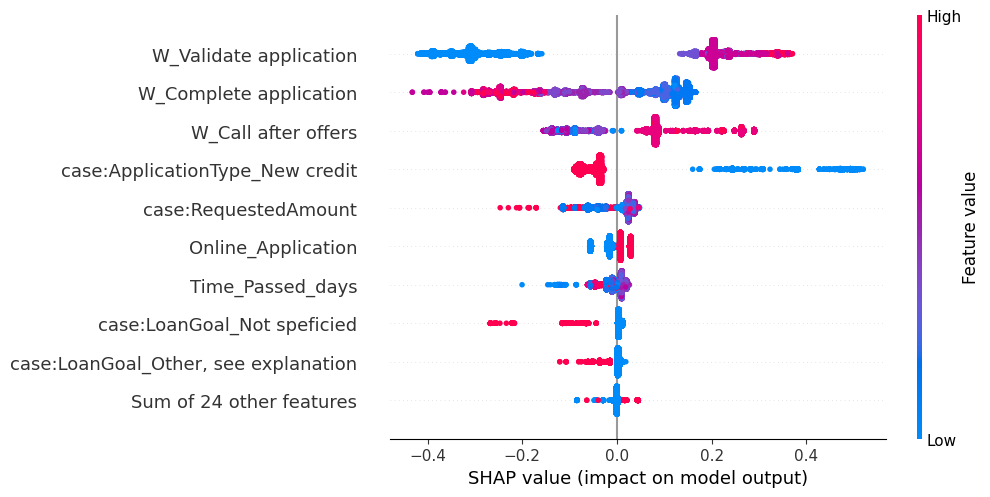

In [135]:
shap.plots.beeswarm(explanation)

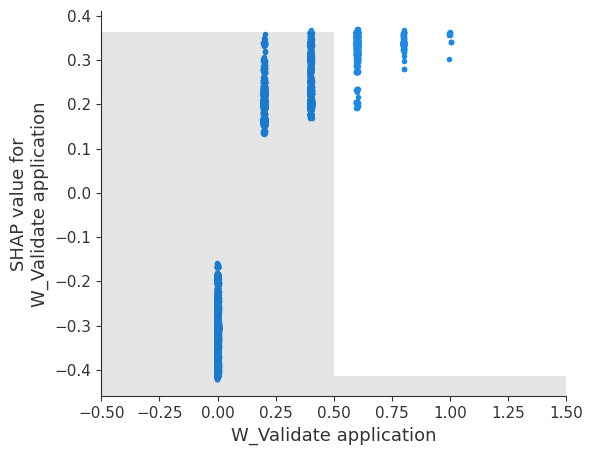

<Figure size 1000x500 with 0 Axes>

In [136]:
shap.plots.scatter(explanation[:, 9])
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.savefig("W_validate application.svg",dpi=1200) #.png,.pdf will also support here
plt.savefig("W_validate application.png",dpi=1200)
plt.show()

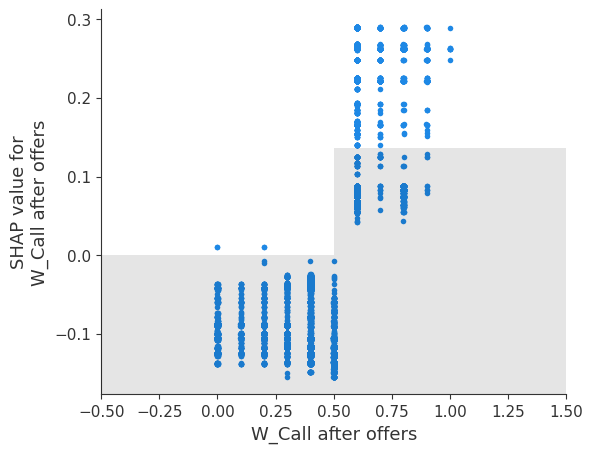

In [137]:
#zeigt wert für einzelne features
shap.plots.scatter(explanation[:, 7])

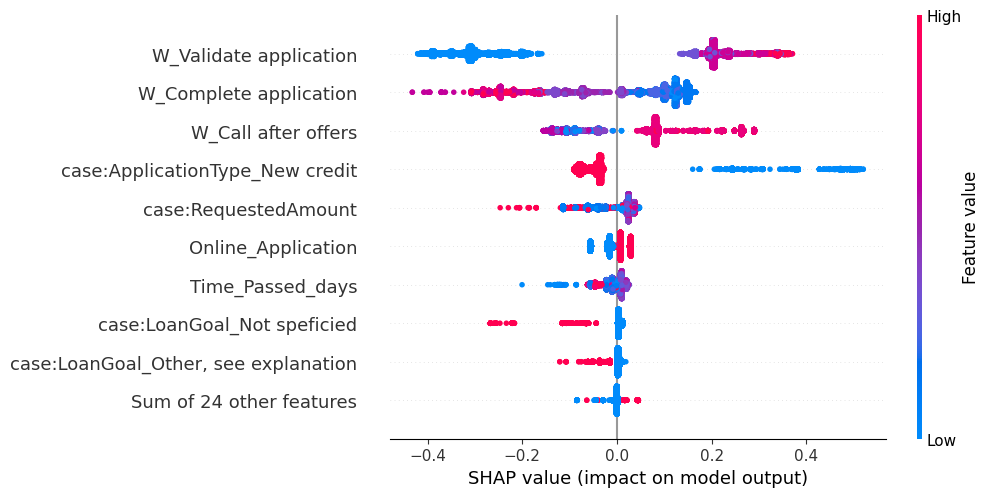

In [138]:
#depths = 5
shap.plots.beeswarm(explanation)

#SHAP - local explanations
These explanations are used in the user study

Dependencies and some necessary is computed in "SHAP - global explanation"

In [150]:
#shap_values = explainer.shap_values(new_df_data)

shap_values_pred = explainer(new_df_data)


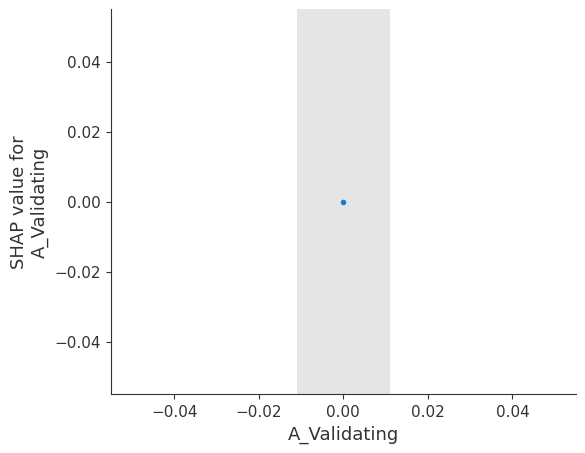

In [151]:
#Erklärung für einzelnen features
shap.plots.scatter(shap_values_pred[:, 10])

In [152]:
#IMPORTANT ! Change scaling of the data
shap_values_pred.data = new_df_data_unscaled.values


In [153]:
new_df_data_unscaled

A_Create Application  W_Complete application  \
case:concept:name                                                      
Application_1266995739                   1.0                    10.0   

                        A_Concept  A_Accepted  O_Create Offer  O_Created  \
case:concept:name                                                          
Application_1266995739        1.0         1.0             1.0        1.0   

                        O_Sent (mail and online)  W_Call after offers  \
case:concept:name                                                       
Application_1266995739                       1.0                  2.0   

                        A_Complete  W_Validate application  ...  \
case:concept:name                                           ...   
Application_1266995739         1.0                       0  ...   

                        case:LoanGoal_Extra spending limit  \
case:concept:name                                            
Application_1266995739                                   0   

                        case:LoanGoal_Home improvement  \
case:concept:name                                        
Application_1266995739                               0   

                        case:LoanGoal_Motorcycle  case:LoanGoal_Not speficied  \
case:concept:name                                                               
Application_1266995739                         0                            0   

                        case:LoanGoal_Other, see explanation  \
case:concept:name                                              
Application_1266995739                                     0   

                        case:LoanGoal_Remaining debt home  \
case:concept:name                                           
Application_1266995739                                  0   

                        case:LoanGoal_Tax payments  case:LoanGoal_Unknown  \
case:concept:name                                                           
Application_1266995739                           0                      0   

                        case:ApplicationType_New credit  Time_Passed_days  
case:concept:name                                                          
Application_1266995739                              1.0          1.011245  

[1 rows x 33 columns]

In [154]:
test =(new_df_data_unscaled != 0).all()

In [155]:
help_df = pd.DataFrame({'feature':test.index, 'value':test.values})

In [156]:
help_df = help_df.loc[help_df['value'] == True]
help_list = help_df.feature.tolist()
print(help_list)


['A_Create Application', 'W_Complete application', 'A_Concept', 'A_Accepted', 'O_Create Offer', 'O_Created', 'O_Sent (mail and online)', 'W_Call after offers', 'A_Complete', 'case:RequestedAmount', 'Online_Application', 'case:LoanGoal_Existing loan takeover', 'case:ApplicationType_New credit', 'Time_Passed_days']


In [157]:
df_display_questionnaire = new_df_data_unscaled[help_list]
print((df_display_questionnaire))

                        A_Create Application  W_Complete application  \
case:concept:name                                                      
Application_1266995739                   1.0                    10.0   

                        A_Concept  A_Accepted  O_Create Offer  O_Created  \
case:concept:name                                                          
Application_1266995739        1.0         1.0             1.0        1.0   

                        O_Sent (mail and online)  W_Call after offers  \
case:concept:name                                                       
Application_1266995739                       1.0                  2.0   

                        A_Complete  case:RequestedAmount  Online_Application  \
case:concept:name                                                              
Application_1266995739         1.0                7000.0                 1.0   

                        case:LoanGoal_Existing loan takeover  \
case:concept:name            

In [158]:
df_display_questionnaire.to_csv("Application_1350494635.csv")

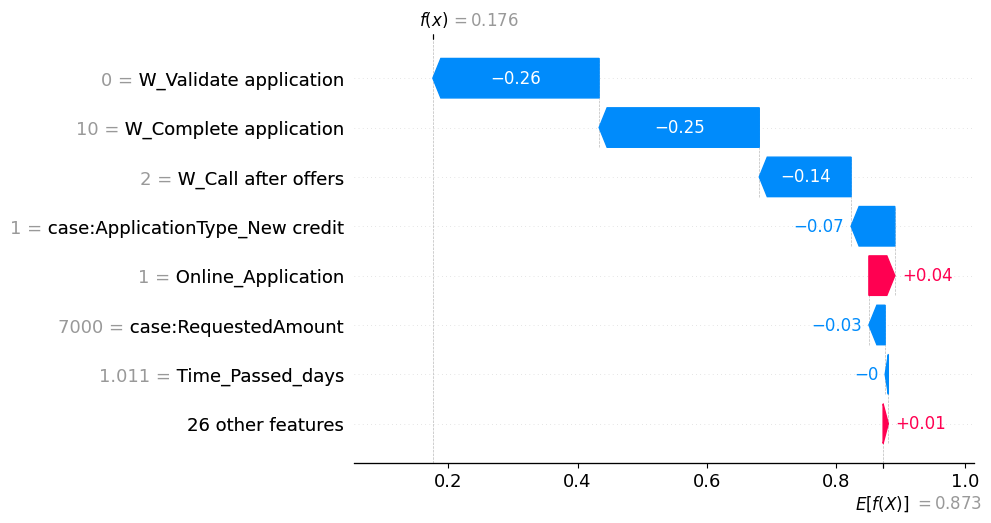

In [159]:
shap.waterfall_plot(shap_values_pred[0],max_display=8)

#LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(4,input_shape=(X_train.shape[1],1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [ ]:
history = model.fit(x=X_train,y=y_train,epochs=100,validation_data=(X_test,y_test),shuffle=False)

Epoch 1/100
466/466 [==============================] - 8s 18ms/step - loss: 0.2130 - val_loss: 0.2124
Epoch 2/100
466/466 [==============================] - 8s 18ms/step - loss: 0.2128 - val_loss: 0.2120
Epoch 3/100
466/466 [==============================] - 6s 14ms/step - loss: 0.2125 - val_loss: 0.2117
Epoch 4/100
466/466 [==============================] - 7s 15ms/step - loss: 0.2123 - val_loss: 0.2113
Epoch 5/100
466/466 [==============================] - 8s 16ms/step - loss: 0.2120 - val_loss: 0.2108
Epoch 6/100
466/466 [==============================] - 6s 13ms/step - loss: 0.2117 - val_loss: 0.2103
Epoch 7/100
466/466 [==============================] - 8s 17ms/step - loss: 0.2113 - val_loss: 0.2099
Epoch 8/100
466/466 [==============================] - 6s 13ms/step - loss: 0.2110 - val_loss: 0.2094
Epoch 9/100
466/466 [==============================] - 8s 18ms/step - loss: 0.2107 - val_loss: 0.2090
Epoch 10/100
466/466 [==============================] - 6s 14ms/step - loss: 0.210

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

In [ ]:
from sklearn import metrics


In [ ]:
Y_p=(model.predict(X_train))
Y_t=(y_train.reshape(y_train.shape[0],1))
print((1-(metrics.mean_absolute_error(Y_t, Y_p)/Y_t.mean()))*100)

466/466 [==============================] - 2s 4ms/step
44.92336872244598


In [ ]:
print((1-(metrics.mean_absolute_error(Y_t, Y_p)/Y_t.mean()))*100)

In [ ]:
y_pred = model.predict(X_test)

y_pred_binary = (y_pred > 0.5).astype(int)


accuracy = np.mean(np.equal(y_test, y_pred_binary))

print("Accuracy:", accuracy)

156/156 [==============================] - 1s 5ms/step
Accuracy: 0.7038825186079259


In [ ]:
f1 = f1_score(y_test,y_pred_binary)
print(f1)

0.8156774355121463


#Benchmarking
adapted from https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

All algorithms

In [ ]:
#Various dependencies for the benchmarking test

!pip install catboost
!pip install xgboost

# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.2 MB/s eta 0:00:00


XGB: 0.807060 (0.008721)
0:	learn: 0.6635371	total: 112ms	remaining: 8.82s
1:	learn: 0.6407908	total: 207ms	remaining: 8.08s
2:	learn: 0.6245544	total: 232ms	remaining: 5.96s
3:	learn: 0.6105030	total: 276ms	remaining: 5.25s
4:	learn: 0.6002955	total: 286ms	remaining: 4.3s
5:	learn: 0.5931407	total: 294ms	remaining: 3.62s
6:	learn: 0.5842739	total: 382ms	remaining: 3.99s
7:	learn: 0.5802854	total: 392ms	remaining: 3.52s
8:	learn: 0.5740059	total: 639ms	remaining: 5.04s
9:	learn: 0.5677899	total: 804ms	remaining: 5.63s
10:	learn: 0.5621513	total: 923ms	remaining: 5.79s
11:	learn: 0.5584961	total: 997ms	remaining: 5.65s
12:	learn: 0.5557010	total: 1.06s	remaining: 5.48s
13:	learn: 0.5512452	total: 1.13s	remaining: 5.34s
14:	learn: 0.5504352	total: 1.14s	remaining: 4.93s
15:	learn: 0.5463033	total: 1.21s	remaining: 4.85s
16:	learn: 0.5437322	total: 1.28s	remaining: 4.75s
17:	learn: 0.5415017	total: 1.35s	remaining: 4.65s
18:	learn: 0.5391075	total: 1.42s	remaining: 4.55s
19:	learn: 0.5375

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

KNN: 0.791072 (0.010691)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

GBC: 0.819485 (0.009666)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

RF: 0.773855 (0.007904)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

SVC: 0.819405 (0.009695)


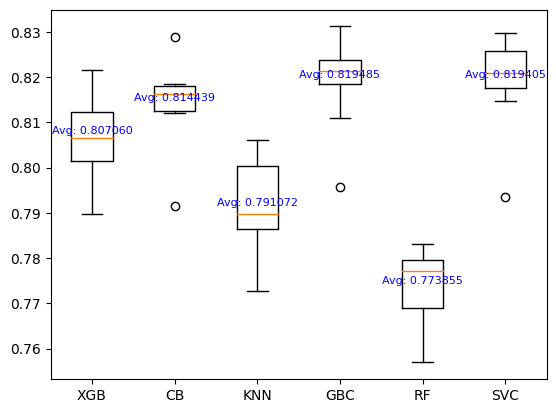

In [ ]:
X=X_train
Y=y_train

seed = 7

models = []
models.append(('XGB', XGBClassifier()))
models.append(('CB', CatBoostClassifier(learning_rate=0.11, max_depth=12, n_estimators=80)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVC', SVC()))


results = []
names = []
scoring = 'f1'
for name, model in models:
 kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
 cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

# boxplot
fig = plt.figure()
fig.suptitle('')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

averages = [np.mean(result) for result in results]


for i, avg in enumerate(averages):
    ax.text(i + 1, avg, f'Avg: {avg:.6f}', ha='center', va='bottom', fontsize=8, color='blue')

plt.savefig('all_algos_boxplot_f1.png', bbox_inches='tight')

plt.show()

XGB: 0.710999 (0.010496)
0:	learn: 0.6635371	total: 137ms	remaining: 10.8s
1:	learn: 0.6407908	total: 266ms	remaining: 10.4s
2:	learn: 0.6245544	total: 285ms	remaining: 7.31s
3:	learn: 0.6105030	total: 317ms	remaining: 6.03s
4:	learn: 0.6002955	total: 330ms	remaining: 4.95s
5:	learn: 0.5931407	total: 341ms	remaining: 4.2s
6:	learn: 0.5842739	total: 494ms	remaining: 5.15s
7:	learn: 0.5802854	total: 508ms	remaining: 4.57s
8:	learn: 0.5740059	total: 639ms	remaining: 5.04s
9:	learn: 0.5677899	total: 754ms	remaining: 5.28s
10:	learn: 0.5621513	total: 887ms	remaining: 5.56s
11:	learn: 0.5584961	total: 1.04s	remaining: 5.88s
12:	learn: 0.5557010	total: 1.17s	remaining: 6.03s
13:	learn: 0.5512452	total: 1.31s	remaining: 6.18s
14:	learn: 0.5504352	total: 1.32s	remaining: 5.74s
15:	learn: 0.5463033	total: 1.46s	remaining: 5.84s
16:	learn: 0.5437322	total: 1.6s	remaining: 5.93s
17:	learn: 0.5415017	total: 1.73s	remaining: 5.97s
18:	learn: 0.5391075	total: 1.86s	remaining: 5.99s
19:	learn: 0.53753

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

KNN: 0.693360 (0.013527)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

GBC: 0.724078 (0.011111)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

RF: 0.672502 (0.006840)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

SVC: 0.710195 (0.013648)


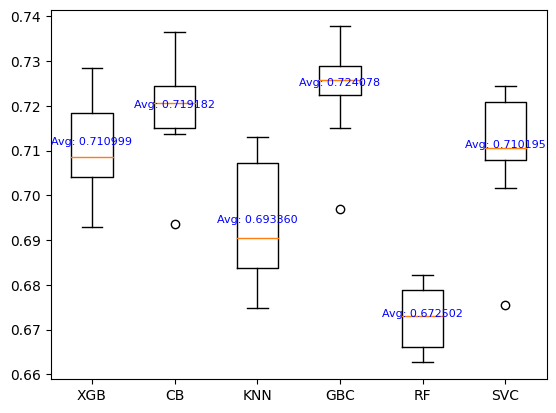

In [ ]:
X=X_train
Y=y_train


seed = 7

models = []
models.append(("XGB", XGBClassifier()))
models.append(('CB', CatBoostClassifier(learning_rate=0.11, max_depth=12, n_estimators=80)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVC', SVC()))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
 kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
 cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

# boxplot
fig = plt.figure()
fig.suptitle('')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

averages = [np.mean(result) for result in results]


for i, avg in enumerate(averages):
    ax.text(i + 1, avg, f'Avg: {avg:.6f}', ha='center', va='bottom', fontsize=8, color='blue')
plt.savefig('all_algos_boxplot_accuracy.png', bbox_inches='tight')


plt.show()

Benchmarking - GBC vs SVC

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

GBC: 0.819501 (0.009623)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

SVC: 0.819405 (0.009695)


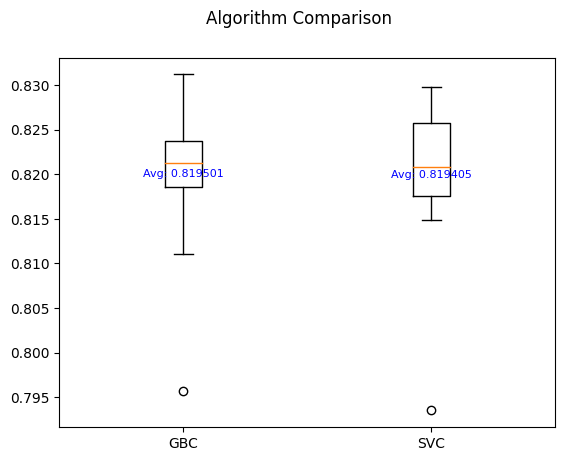

In [ ]:
X=X_train
Y=y_train

seed = 7

models = []

models.append(('GBC', GradientBoostingClassifier()))
models.append(('SVC', SVC()))

results = []
names = []
scoring = 'f1'
for name, model in models:
 kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
 cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

# boxplot
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

averages = [np.mean(result) for result in results]


for i, avg in enumerate(averages):
    ax.text(i + 1, avg, f'Avg: {avg:.6f}', ha='center', va='bottom', fontsize=8, color='blue')

plt.savefig('gbc_svc_boxplot_f1.png', bbox_inches='tight')
plt.show()

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

GBC: 0.724145 (0.011179)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

SVC: 0.710195 (0.013648)


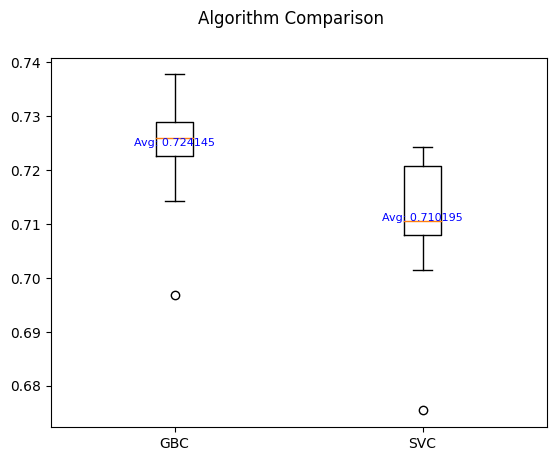

In [ ]:
X=X_train
Y=y_train


seed = 7

models = []

models.append(('GBC', GradientBoostingClassifier()))
models.append(('SVC', SVC()))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
 kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
 cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

# boxplot
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

averages = [np.mean(result) for result in results]


for i, avg in enumerate(averages):
    ax.text(i + 1, avg, f'Avg: {avg:.6f}', ha='center', va='bottom', fontsize=8, color='blue')

plt.savefig('gbc_svc_boxplot_accuracy.png', bbox_inches='tight')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

GBC: 0.705941 (0.010396)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

SVC: 0.658690 (0.012477)


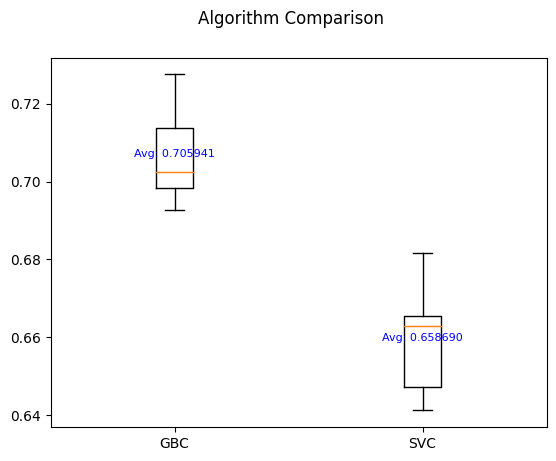

In [ ]:
X=X_train
Y=y_train

seed = 7

models = []
models.append(('GBC', GradientBoostingClassifier()))
models.append(('SVC', SVC()))

results = []
names = []
scoring = 'roc_auc'
for name, model in models:
 kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
 cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

# boxplot
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

averages = [np.mean(result) for result in results]


for i, avg in enumerate(averages):
    ax.text(i + 1, avg, f'Avg: {avg:.6f}', ha='center', va='bottom', fontsize=8, color='blue')

plt.savefig('gbc_svc_boxplot_roc_auc.png', bbox_inches='tight')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

GBC: 0.708121 (0.016107)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

SVC: 0.670132 (0.016542)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

GBC: 0.819487 (0.009599)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

SVC: 0.819405 (0.009695)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

GBC: 0.724145 (0.011126)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

SVC: 0.710195 (0.013648)


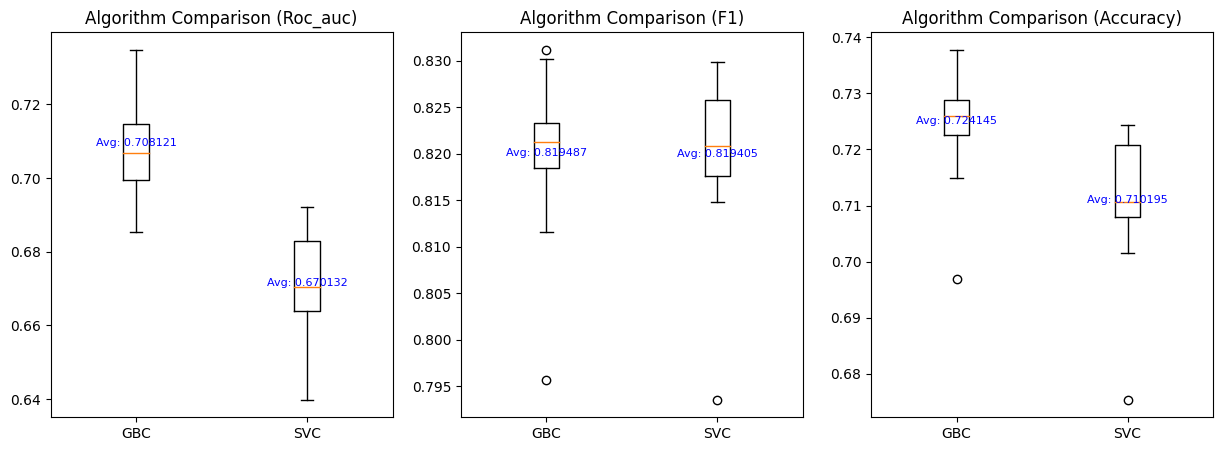

In [ ]:
#All Benchmarking tests (accuracy, F1 and ROC-AUC) in one chart
seed = 7
models = [
    ('GBC', GradientBoostingClassifier()),
    ('SVC', SVC())
]
scorings = ['roc_auc', 'f1', 'accuracy']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(scorings), figsize=(15, 5))

for i, scoring in enumerate(scorings):
    results = []
    names = []

    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
        scorer = make_scorer(f1_score) if scoring == 'f1' else scoring
        cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scorer)
        results.append(cv_results)
        names.append(name)

        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

    # boxplot algorithm comparison
    ax = axes[i]
    ax.boxplot(results)
    ax.set_title(f'Algorithm Comparison ({scoring.capitalize()})')
    ax.set_xticklabels(names)

    averages = [np.mean(result) for result in results]
    for j, avg in enumerate(averages):
        ax.text(j + 1, avg, f'Avg: {avg:.6f}', ha='center', va='bottom', fontsize=8, color='blue')
plt.savefig('gbc_svc_boxplot_three_measures.png', bbox_inches='tight')
plt.show()

#Hyperparametertuning

In [ ]:
!pip install scikit-optimize

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_objective, plot_histogram

from sklearn.datasets import load_digits
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.4 MB/s eta 0:00:00


In [ ]:
param_space = {
    'learning_rate': (0.01, 1.0),
    'max_depth': (1,10),
    'n_estimators' : (100, 1000)
}

# Create BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=GradientBoostingClassifier(),
    search_spaces=param_space,
    n_iter=20,
    cv=10,
    random_state=42,
    scoring='f1',
    verbose=1,
)



# Perform hyperparameter tuning using GroupKFold cross-validation
bayes_search.fit(X_val, y_val)

# Print best parameters and score
print("Best parameters found:", bayes_search.best_params_)
print("Best score found:", bayes_search.best_score_)

# Access the mean test scores for all cross-validation splits and parameter combinations
print(bayes_search.cv_results_['mean_test_score'])


Fitting 10 folds for each of 1 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Best parameters found: OrderedDict([('learning_rate', 0.01), ('max_depth', 3), ('n_estimators', 138)])
Best score found: 0.8201560455378113
[0.76959837 0.77220729 0.77015011 0.76017517 0.75873274 0.76705041
 0.76650345 0.77042125 0.76280295 0.79557814 0.81586436 0.81407744
 0.82015605 0.81681966 0.81676045 0.81633907 0.81873939 0.81789066
 0.81636552 0.78723999]


#Single bucketing - every step from preprocessing to scaling

In [ ]:
log["start"]=pd.to_datetime(log['time:timestamp'])
log['start'] = log.groupby('case:concept:name')['start'].transform('min')
log['Time_Passed'] = log['time:timestamp'] - log['start']
log['Time_Passed_seconds'] = log['Time_Passed'].dt.total_seconds()

In [ ]:
d = {}
i=0
for i in range(21):


 if i <=0:
  i += 1
 else:
  from pm4py.objects.log.obj import EventLog, Trace

  log_prefixes_Accepted = pm4py.filter_prefixes(log, 'A_Pending', activity_key='concept:name', timestamp_key='time:timestamp', case_id_key='case:concept:name')
  log_prefixes_Denied = pm4py.filter_prefixes(log, 'A_Denied', activity_key='concept:name', timestamp_key='time:timestamp', case_id_key='case:concept:name')
  log_prefixes_Cancelled = pm4py.filter_prefixes(log, 'A_Cancelled', activity_key='concept:name', timestamp_key='time:timestamp', case_id_key='case:concept:name')

  log_prefixes_Accepted["label"] = "accepted"
  log_prefixes_Cancelled["label"] = "not"
  log_prefixes_Denied["label"] = "not"


  trimmed_log_Accepted = pm4py.get_prefixes_from_log(log_prefixes_Accepted, length=i, case_id_key='case:concept:name')
  trimmed_log_Denied = pm4py.get_prefixes_from_log(log_prefixes_Denied, length=i, case_id_key='case:concept:name')
  trimmed_log_Cancelled = pm4py.get_prefixes_from_log(log_prefixes_Cancelled, length=i, case_id_key='case:concept:name')

  data_labeled_prefixes= pd.concat([trimmed_log_Accepted, trimmed_log_Denied, trimmed_log_Cancelled], axis=0)


  id_counts = data_labeled_prefixes['case:concept:name'].value_counts()

  # Filter IDs for length i
  valid_ids = id_counts[id_counts == i].index

  filtered_df = data_labeled_prefixes[data_labeled_prefixes['case:concept:name'].isin(valid_ids)]
  filtered_df['NeueSpalte'] = 'data_labeled_prefixes{0}'.format(i)     #only for single bucketing
  filtered_df['new_id'] = filtered_df['NeueSpalte'] + filtered_df['case:concept:name'] #only for single bucketing
  filtered_df['case:concept:name'] = filtered_df['new_id'] #only for single bucketing
  filtered_df = filtered_df.drop(["new_id","NeueSpalte"],axis=1) #only for single bucketing
  d['data_labeled_prefixes{0}'.format(i)] = filtered_df



  i+=1

  print(i)




2
3
4
5
6
7
8


<ipython-input-11-c6049d155026>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['NeueSpalte'] = 'data_labeled_prefixes{0}'.format(i)     #nur wichtig für single Bucketing versuch !
<ipython-input-11-c6049d155026>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['new_id'] = filtered_df['NeueSpalte'] + filtered_df['case:concept:name'] #nur wichtig für single Bucketing versuch !
<ipython-input-11-c6049d155026>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

9


<ipython-input-11-c6049d155026>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['NeueSpalte'] = 'data_labeled_prefixes{0}'.format(i)     #nur wichtig für single Bucketing versuch !
<ipython-input-11-c6049d155026>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['new_id'] = filtered_df['NeueSpalte'] + filtered_df['case:concept:name'] #nur wichtig für single Bucketing versuch !
<ipython-input-11-c6049d155026>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

10


<ipython-input-11-c6049d155026>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['NeueSpalte'] = 'data_labeled_prefixes{0}'.format(i)     #nur wichtig für single Bucketing versuch !
<ipython-input-11-c6049d155026>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['new_id'] = filtered_df['NeueSpalte'] + filtered_df['case:concept:name'] #nur wichtig für single Bucketing versuch !
<ipython-input-11-c6049d155026>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

11


<ipython-input-11-c6049d155026>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['NeueSpalte'] = 'data_labeled_prefixes{0}'.format(i)     #nur wichtig für single Bucketing versuch !
<ipython-input-11-c6049d155026>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['new_id'] = filtered_df['NeueSpalte'] + filtered_df['case:concept:name'] #nur wichtig für single Bucketing versuch !
<ipython-input-11-c6049d155026>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

12


<ipython-input-11-c6049d155026>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['NeueSpalte'] = 'data_labeled_prefixes{0}'.format(i)     #nur wichtig für single Bucketing versuch !
<ipython-input-11-c6049d155026>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['new_id'] = filtered_df['NeueSpalte'] + filtered_df['case:concept:name'] #nur wichtig für single Bucketing versuch !
<ipython-input-11-c6049d155026>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

13


<ipython-input-11-c6049d155026>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['NeueSpalte'] = 'data_labeled_prefixes{0}'.format(i)     #nur wichtig für single Bucketing versuch !
<ipython-input-11-c6049d155026>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['new_id'] = filtered_df['NeueSpalte'] + filtered_df['case:concept:name'] #nur wichtig für single Bucketing versuch !
<ipython-input-11-c6049d155026>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

14


<ipython-input-11-c6049d155026>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_prefixes_Cancelled["label"] = "not"
<ipython-input-11-c6049d155026>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['NeueSpalte'] = 'data_labeled_prefixes{0}'.format(i)     #nur wichtig für single Bucketing versuch !
<ipython-input-11-c6049d155026>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

15


<ipython-input-11-c6049d155026>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['NeueSpalte'] = 'data_labeled_prefixes{0}'.format(i)     #nur wichtig für single Bucketing versuch !
<ipython-input-11-c6049d155026>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['new_id'] = filtered_df['NeueSpalte'] + filtered_df['case:concept:name'] #nur wichtig für single Bucketing versuch !
<ipython-input-11-c6049d155026>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

16


<ipython-input-11-c6049d155026>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['NeueSpalte'] = 'data_labeled_prefixes{0}'.format(i)     #nur wichtig für single Bucketing versuch !
<ipython-input-11-c6049d155026>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['new_id'] = filtered_df['NeueSpalte'] + filtered_df['case:concept:name'] #nur wichtig für single Bucketing versuch !
<ipython-input-11-c6049d155026>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

17


<ipython-input-11-c6049d155026>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['NeueSpalte'] = 'data_labeled_prefixes{0}'.format(i)     #nur wichtig für single Bucketing versuch !
<ipython-input-11-c6049d155026>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['new_id'] = filtered_df['NeueSpalte'] + filtered_df['case:concept:name'] #nur wichtig für single Bucketing versuch !
<ipython-input-11-c6049d155026>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

18


<ipython-input-11-c6049d155026>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['NeueSpalte'] = 'data_labeled_prefixes{0}'.format(i)     #nur wichtig für single Bucketing versuch !
<ipython-input-11-c6049d155026>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['new_id'] = filtered_df['NeueSpalte'] + filtered_df['case:concept:name'] #nur wichtig für single Bucketing versuch !
<ipython-input-11-c6049d155026>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

19


<ipython-input-11-c6049d155026>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['NeueSpalte'] = 'data_labeled_prefixes{0}'.format(i)     #nur wichtig für single Bucketing versuch !
<ipython-input-11-c6049d155026>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['new_id'] = filtered_df['NeueSpalte'] + filtered_df['case:concept:name'] #nur wichtig für single Bucketing versuch !
<ipython-input-11-c6049d155026>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

20


<ipython-input-11-c6049d155026>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['NeueSpalte'] = 'data_labeled_prefixes{0}'.format(i)     #nur wichtig für single Bucketing versuch !
<ipython-input-11-c6049d155026>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['new_id'] = filtered_df['NeueSpalte'] + filtered_df['case:concept:name'] #nur wichtig für single Bucketing versuch !
<ipython-input-11-c6049d155026>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

21


In [ ]:
dataframes_list = list(d.values())


combined_dataframe = pd.concat(dataframes_list)


del d
del dataframes_list

In [ ]:
def label_first_two_rows(id_group):

    if all(id_group.head(2)['org:resource'] == 'User_1'):
        print(id_group.head(2)['org:resource'])
        return 'Label_1'
    else:
        print(id_group.head(2)['org:resource'])
        return 'Label_2'


labels = combined_dataframe.groupby('case:concept:name').apply(label_first_two_rows)


Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
360042    User_23
Name: org:resource, dtype: object
739314    User_1
739315    User_1
Name: org:resource, dtype: object
1138645    User_36
1138646    User_36
Name: org:resource, dtype: object
831077    User_10
831078    User_10
Name: org:resource, dtype: object
1054778    User_51
1054779    User_51
Name: org:resource, dtype: object
588170    User_51
588171    User_51
Name: org:resource, dtype: object
289759    User_46
289760    User_46
Name: org:resource, dtype: object
396852    User_1
396853    User_1
Name: org:resource, dtype: object
168740    User_13
168741    User_13
Name: org:resource, dtype: object
301537    User_1
301538    User_1
Name: org:resource, dtype: object
552615    User_39
552616    User_39
Name: org:resource, dtype: object
66149    User_1
66150    User_1
Name: org:resource, dtype: object
795319    User_1
795320    User_1
Name: org:resource, dtype: object
618996    User_10
618997    User_10
Name: org:res

In [ ]:
combined_dataframe['Label'] = combined_dataframe['org:resource'].map(labels)


In [ ]:
combined_dataframe = combined_dataframe.merge(labels.rename('New_Data'), left_on='case:concept:name', right_index=True, how='left')


In [ ]:
combined_dataframe["Online_Application"] = combined_dataframe["New_Data"].replace({'Label_1': 1, 'Label_2': 0})


single bucketing encoding

Event attributes

In [ ]:

spalten = ['concept:name'
           ]
ergebnis_df = pd.DataFrame()


pivot_tables = []
for spalte in spalten:
    pivot_table = pd.pivot_table(combined_dataframe, values='label', index='case:concept:name', columns=spalte, aggfunc='count', fill_value=0, sort=False)
    pivot_tables.append(pivot_table)



In [ ]:
combined_df = pd.concat([pivot_tables[0],
                         ])

df_dynamic_event_cat = combined_df.groupby(combined_df.index, sort=False).agg('first',)



Trace attributes

In [ ]:
work_around = pd.DataFrame()
work_around = combined_dataframe[['case:concept:name',
                               "case:LoanGoal",
                               'case:ApplicationType',
                               'case:RequestedAmount',
                               "label",
                               "Online_Application"
                               ]]


combined_dataframe_time = combined_dataframe.groupby('case:concept:name')['Time_Passed_seconds'].max().reset_index()


work_around = work_around.merge(combined_dataframe_time, on='case:concept:name', how='left')


work_around = work_around.drop_duplicates()
work_around = work_around.set_index("case:concept:name")


In [ ]:
work_around_feature_table = pd.get_dummies(work_around)


extract labels

In [ ]:


list_1 = work_around['label'].tolist()
condition = "accepted"


list_2 = [item == condition for item in list_1]


print(list_2)
list_3 = np.asarray(list_2).astype(int)
print(list_3)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
df_all_infos = pd.concat([df_dynamic_event_cat,work_around_feature_table])

In [ ]:
df_all_infos = df_all_infos.groupby(df_all_infos.index, sort=False).agg('first',)
df_all_infos = df_all_infos.drop(["label_accepted","label_not"],axis=1)

print((df_all_infos))

##FINAL ENCODED DF !!!!!

                                               A_Create Application  \
case:concept:name                                                     
data_labeled_prefixes1Application_652823628                     1.0   
data_labeled_prefixes1Application_428409768                     1.0   
data_labeled_prefixes1Application_1746793196                    1.0   
data_labeled_prefixes1Application_619403287                     1.0   
data_labeled_prefixes1Application_1529124572                    1.0   
...                                                             ...   
data_labeled_prefixes20Application_1303072211                   1.0   
data_labeled_prefixes20Application_188935499                    1.0   
data_labeled_prefixes20Application_1986755838                   1.0   
data_labeled_prefixes20Application_380535005                    1.0   
data_labeled_prefixes20Application_1722592475                   1.0   

                                               A_Submitted  \
case:concept:n

In [ ]:
df_all_infos.to_csv("df_all_infos_single_bucket.csv")

In [ ]:
import numpy
numpy.savetxt("list_3.csv", list_3, delimiter=",")

scaling

In [ ]:
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler

scaler_x = MinMaxScaler()
data_scaled = scaler_x.fit_transform(df_all_infos)

scaler_y = FunctionTransformer()
target_scaled = scaler_y.fit_transform(list_3.reshape(-1, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target_scaled, test_size=0.20, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

#Model finished!

#From here on empirical examination of the user study

#stat. Auswertung

In [359]:
statistic=pd.read_csv('/content/drive/MyDrive/Umfrage_wichtige_Daten.csv')

In [360]:
new_columns = ['ID', 'Date', 'Rand_ID','Date_start','group','1.1_G1','1.1_G2','1.2.1','1.2.2','1.2.3','2.1_G1','2.1_G2','2.2.1','2.2.2','2.2.3','3.1_G1','3.1_G2','3.2.1','3.2.2','3.2.3','manipulation_check','4.1','4.2','4.3','4.4','4.5','4.6','4.7','gender','student','age_group','experience_loan','experience_ai','additional']
statistic.columns = new_columns

In [361]:
statistic.replace("Trifft voll und ganz zu", 5, inplace=True)
statistic.replace("Trifft zu", 4, inplace=True)
statistic.replace("Keine Meinung", 3, inplace=True)
statistic.replace("Trifft nicht zu", 2, inplace=True)
statistic.replace("Trifft überhaupt nicht zu", 1, inplace=True)


#inverse trust dimension 4.5
def inverse(x):
    y=6- (x)
    return y


statistic['4.5'] = statistic['4.5'].apply(inverse)

In [362]:
statistic.replace('Kreditantrag 1', 0, inplace=True)
statistic.replace('Kreditantrag 2', 1, inplace=True)
statistic.replace('Kreditantrag 3', 1, inplace=True)
statistic.replace('Kreditantrag 4', 0, inplace=True)
statistic.replace('Kreditantrag 5', 0, inplace=True)
statistic.replace('Kreditantrag 6', 1, inplace=True)

In [363]:
statistic_fail = statistic[statistic['manipulation_check'] == 'Blau']

In [364]:
statistic = statistic[statistic['manipulation_check'] == 'Rot']

#Task accuracy

In [365]:
statistic['correct']=statistic['1.1_G1']+statistic['1.1_G2']+statistic['2.1_G1']+statistic['2.1_G2']+statistic['3.1_G1']+statistic['3.1_G2']

In [366]:
statistic.fillna(0, inplace=True)

In [367]:
statistic['Accuracy_avg'] = ((statistic['1.1_G1'] + statistic['1.1_G2'] + statistic['2.1_G1']+statistic['2.1_G2']+statistic['3.1_G1']+statistic['3.1_G2'])/3)

In [368]:
average_accuracy_G1 = statistic.loc[statistic['group'] == 1, 'Accuracy_avg'].mean()
print(average_accuracy_G1)
average_accuracy_G2 = statistic.loc[statistic['group'] == 2, 'Accuracy_avg'].mean()
print(average_accuracy_G2)

0.638888888888889
0.7272727272727273


In [369]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [370]:
from scipy.stats import kstest

#perform Kolmogorov-Smirnov test
kstest(statistic['Accuracy_avg'], 'norm')

#Data is NOT normal distributed --> Mann-Whitney-U

KstestResult(statistic=0.6015731525718595, pvalue=2.0122510592240742e-24, statistic_location=0.3333333333333333, statistic_sign=-1)

In [371]:
group1 = statistic.loc[statistic['group'] == 1, 'Accuracy_avg']
group2 = statistic.loc[statistic['group'] == 2, 'Accuracy_avg']

In [372]:
avg_g1 = group1.mean()
avg_g2 = group2.mean()

sd_g1 = group1.std()
sd_g2 = group2.std()

In [373]:
print(avg_g1, avg_g2, sd_g1,sd_g2)

0.638888888888889 0.7272727272727273 0.21639176700003357 0.2694457461178597


In [374]:
import scipy.stats as stats

stats.mannwhitneyu(group1, group2, alternative='two-sided')

MannwhitneyuResult(statistic=466.0, pvalue=0.08905601242097756)

In [375]:
statistic_copy = statistic

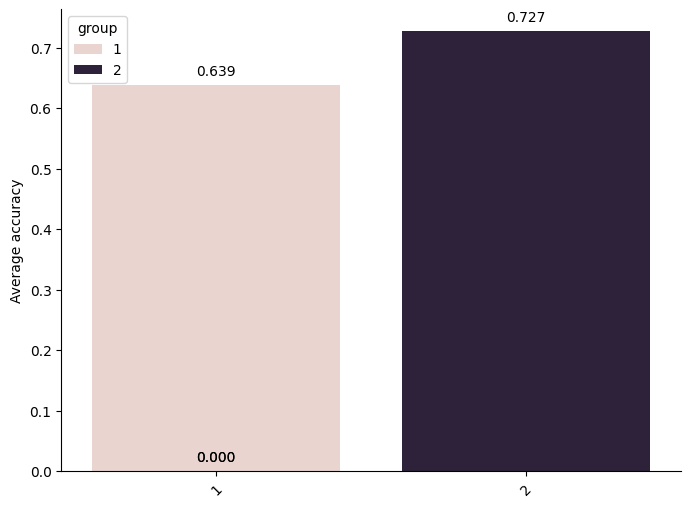

In [376]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='group', y='Accuracy_avg', data=statistic_copy, hue='group',errorbar=None)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45, ha='center')
plt.title("")
ax.set_xlabel('')
plt.ylabel("Average accuracy")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('accuracy.png', bbox_inches='tight')
plt.show()

#Task accuracy - task specific


In [190]:
#average accuracy per group per task

g11_m = statistic.loc[statistic['group'] == 1, '1.1_G1'].mean()
g21_m = statistic.loc[statistic['group'] == 2, '1.1_G2'].mean()
g12_m = statistic.loc[statistic['group'] == 1, '2.1_G1'].mean()
g22_m = statistic.loc[statistic['group'] == 2, '2.1_G2'].mean()
g13_m = statistic.loc[statistic['group'] == 1, '3.1_G1'].mean()
g23_m = statistic.loc[statistic['group'] == 2, '3.1_G2'].mean()


In [191]:
task = ['task 1', 'task 1', 'task 2', 'task 2', 'task 3', 'task 3']
values_a = [g11_m,g21_m,g12_m,g22_m,g13_m,g23_m]
values_b = ['Control group','Treatment group','Control group','Treatment group','Control group','Treatment group']



data_statistics_task = {'task': task, 'Accuracy': values_a, 'Group': values_b}
statistics_task = pd.DataFrame(data_statistics_task)

# task 3 group 1 and group 2 for mann u test
g11 = statistic.loc[statistic['group'] == 1, '1.1_G1']
g21 = statistic.loc[statistic['group'] == 2, '1.1_G2']
g12 = statistic.loc[statistic['group'] == 1, '2.1_G1']
g22 = statistic.loc[statistic['group'] == 2, '2.1_G2']
g13 = statistic.loc[statistic['group'] == 1, '3.1_G1']
g23 = statistic.loc[statistic['group'] == 2, '3.1_G2']

In [192]:
avg_g11 = g11.mean()
avg_g12 = g12.mean()
avg_g13 = g13.mean()

avg_g21 = g21.mean()
avg_g22 = g22.mean()
avg_g23 = g23.mean()

sd_g11 = g11.std()
sd_g12 = g12.std()
sd_g13 = g13.std()

sd_g21 = g21.std()
sd_g22 = g22.std()
sd_g23 = g23.std()

print(avg_g11,
avg_g12,
avg_g13,

avg_g21,
avg_g22,
avg_g23)

print(sd_g11,
sd_g12,
sd_g13,

sd_g21,
sd_g22,
sd_g23)

0.9166666666666666 0.4166666666666667 0.5833333333333334 0.8484848484848485 0.7575757575757576 0.5757575757575758
0.280305955290694 0.5 0.5 0.36410954062720957 0.4351941398892446 0.5018903659106632


In [193]:
stats.mannwhitneyu(g11, g21, alternative='two-sided')

MannwhitneyuResult(statistic=634.5, pvalue=0.38626223876470456)

In [194]:
stats.mannwhitneyu(g13, g23, alternative='two-sided')

MannwhitneyuResult(statistic=598.5, pvalue=0.9551854795884394)

In [195]:
stats.mannwhitneyu(g12, g22, alternative='two-sided')

MannwhitneyuResult(statistic=391.5, pvalue=0.004540999572729372)

<Figure size 800x600 with 0 Axes>

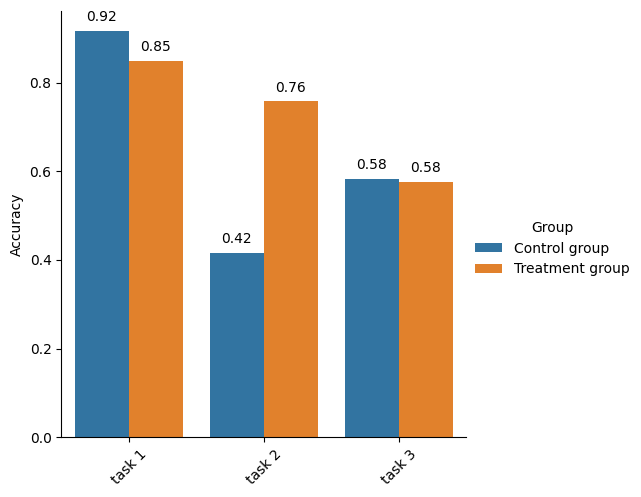

In [196]:
plt.figure(figsize=(8, 6))
g = sns.catplot(x='task', y='Accuracy', data=statistics_task, hue='Group', kind='bar', height=5, aspect=1, errorbar=None)
plt.xticks(rotation=90)
plt.title("")
ax = g.facet_axis(0, 0)

for p in ax.patches:
    height = p.get_height()
    if height != 0:
            ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45, ha='center')
ax.set_xlabel('')

plt.savefig('Plot_task.png', bbox_inches='tight')
plt.show()

In [197]:
g11_eai_nein = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'nein'), '1.1_G1'].mean()
g11_eai_grund = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'grundlegend (zB. durch ein Modul an der Hochschule)'), '1.1_G1'].mean()
g11_eai_ja = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'ja - fortgeschritten (bereits selbst implementiert)'), '1.1_G1'].mean()



g21_eai_nein = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'nein'), '1.1_G2'].mean()
g21_eai_grund = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'grundlegend (zB. durch ein Modul an der Hochschule)'), '1.1_G2'].mean()
g21_eai_ja = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'ja - fortgeschritten (bereits selbst implementiert)'), '1.1_G2'].mean()

g12_eai_nein = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'nein'), '2.1_G1'].mean()
g12_eai_grund = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'grundlegend (zB. durch ein Modul an der Hochschule)'), '2.1_G1'].mean()
g12_eai_ja = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'ja - fortgeschritten (bereits selbst implementiert)'), '2.1_G1'].mean()

g22_eai_nein = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'nein'), '2.1_G2'].mean()
g22_eai_grund = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'grundlegend (zB. durch ein Modul an der Hochschule)'), '2.1_G2'].mean()
g22_eai_ja = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'ja - fortgeschritten (bereits selbst implementiert)'), '2.1_G2'].mean()

g13_eai_nein = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'nein'), '3.1_G1'].mean()
g13_eai_grund = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'grundlegend (zB. durch ein Modul an der Hochschule)'), '3.1_G1'].mean()
g13_eai_ja = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'ja - fortgeschritten (bereits selbst implementiert)'), '3.1_G1'].mean()

g23_eai_nein = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'nein'), '3.1_G2'].mean()
g23_eai_grund = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'grundlegend (zB. durch ein Modul an der Hochschule)'), '3.1_G2'].mean()
g23_eai_ja = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'ja - fortgeschritten (bereits selbst implementiert)'), '3.1_G2'].mean()


In [198]:
task = ['task 1', 'task 1','task 1', 'task 1','task 1', 'task 1',
        'task 2', 'task 2', 'task 2', 'task 2','task 2', 'task 2',
        'task 3', 'task 3','task 3', 'task 3','task 3', 'task 3']
values_a = [g11_eai_nein,
            g11_eai_grund,
            g11_eai_ja,

            g21_eai_nein,
            g21_eai_grund,
            g21_eai_ja,

            g12_eai_nein,
            g12_eai_grund,
            g12_eai_ja,

            g22_eai_nein,
            g22_eai_grund,
            g22_eai_ja,

            g13_eai_nein,
            g13_eai_grund,
            g13_eai_ja,

            g23_eai_nein,
            g23_eai_grund,
            g23_eai_ja]

values_c = ['g11_eai_nein',
            'g11_eai_grund',
            'g11_eai_ja',

            'g21_eai_nein',
            'g21_eai_grund',
            'g21_eai_ja',

            'g12_eai_nein',
            'g12_eai_grund',
            'g12_eai_ja',

            'g22_eai_nein',
            'g22_eai_grund',
            'g22_eai_ja',

            'g13_eai_nein',
            'g13_eai_grund',
            'g13_eai_ja',

            'g23_eai_nein',
            'g23_eai_grund',
            'g23_eai_ja']


values_b = [1,
            1,
            1,

            2,
            2,
            2,

            1,
            1,
            1,

            2,
            2,
            2,

            1,
            1,
            1,

            2,
            2,
            2]


data_statistics_task_eai = {'task': task, 'all_diff': values_c, 'accuracy': values_a, 'group': values_b}
statistics_task_eai = pd.DataFrame(data_statistics_task_eai)

<Figure size 800x600 with 0 Axes>

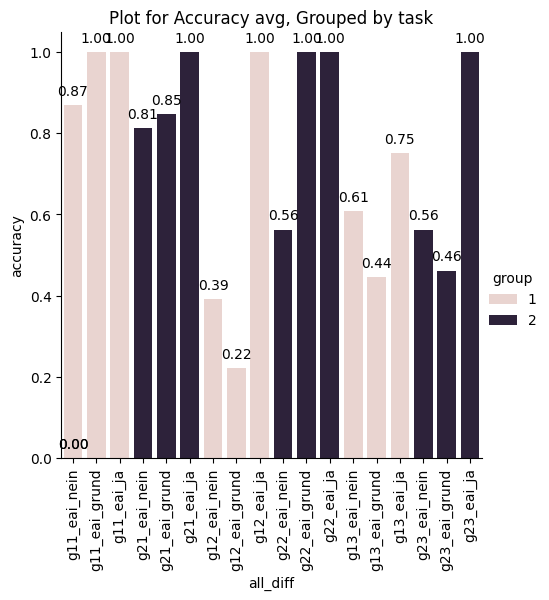

In [199]:
plt.figure(figsize=(8, 6))
g = sns.catplot(x='all_diff', y='accuracy', data=statistics_task_eai, hue='group', kind='bar', height=5, aspect=1, errorbar=None)
plt.xticks(rotation=90)
plt.title("Plot for Accuracy avg, Grouped by task")
ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
#plt.savefig('Plot_task.png')
plt.show()

#Task accuracy - stacked barchart
There is an error where the first line in "Task accuracy" must be executed a second time for the bar chart to work

In [200]:
statistic_stacked = statistic[['group','correct']]
statistic_stacked['group'] = statistic_stacked['group'].replace({1: 'Control group', 2: 'Treatment group'})
statistic_stacked = statistic_stacked.pivot_table(index='group', columns='correct', aggfunc='size', fill_value=0)



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


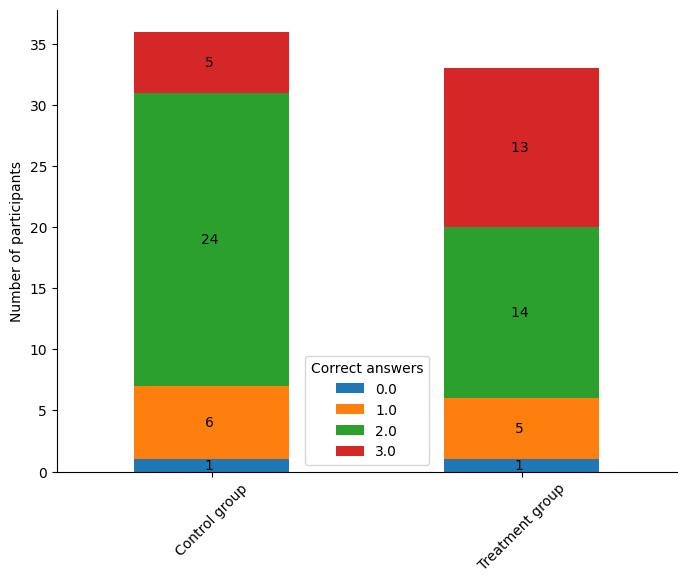

In [201]:
ax = statistic_stacked.plot(kind='bar', stacked=True, figsize=(8, 6))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.0f} '.format(height),
            horizontalalignment='center',
            verticalalignment='center')
plt.ylabel('Number of participants')
ax.set_xlabel('')
ax.set_xticklabels(statistic_stacked.index,rotation=45, ha='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(title='Correct answers')
#plt.savefig('stacked_barchart.png', bbox_inches='tight')

plt.show()

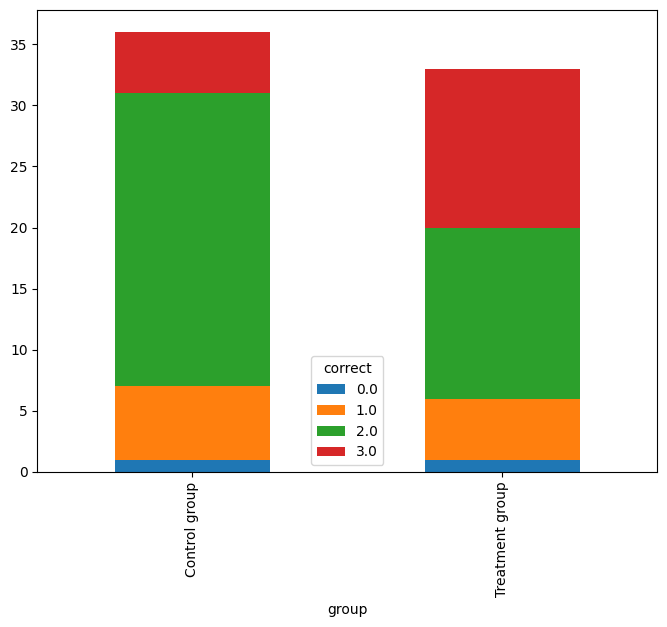

In [202]:
ax = statistic_stacked.plot(kind='bar', stacked=True, figsize=(8, 6))
#plt.savefig('stacked_barchart.png')

plt.show()

#Task accuracy - XAI experience

In [203]:
statistics_experience_df=statistic
statistics_experience_df.drop(statistics_experience_df[statistics_experience_df.experience_ai == 0 ].index, inplace=True)

In [204]:
test = statistic.loc[statistic['experience_ai']=="ja - fortgeschritten (bereits selbst implementiert)"]
test['group']

8     1
20    1
26    1
27    2
29    2
61    1
68    2
Name: group, dtype: int64

In [205]:
g1_nein = statistic.loc[statistic['group'] == 1, '1.1_G1']
g2_nein = statistic.loc[statistic['group'] == 2, '1.1_G2']
g1_grund = statistic.loc[statistic['group'] == 1, '2.1_G1']
g2_grund = statistic.loc[statistic['group'] == 2, '2.1_G2']
g13 = statistic.loc[statistic['group'] == 1, '3.1_G1']
g23 = statistic.loc[statistic['group'] == 2, '3.1_G2']

<Figure size 800x600 with 0 Axes>

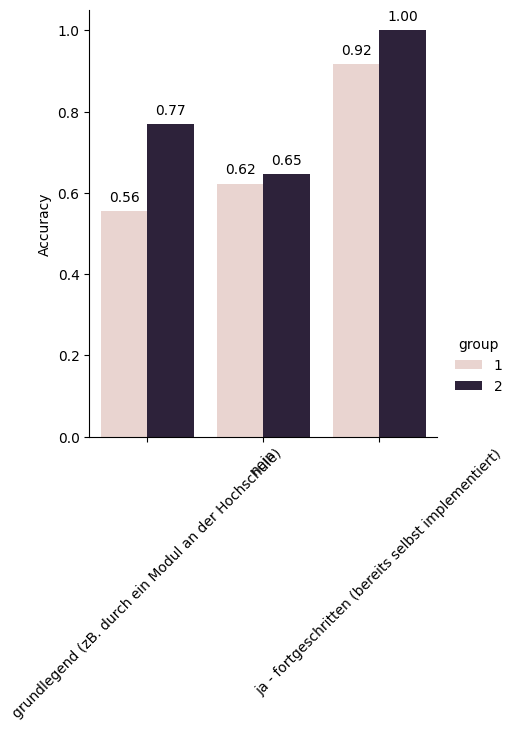

In [206]:


plt.figure(figsize=(8, 6))
g = sns.catplot(x='experience_ai', y='Accuracy_avg', hue='group', data=statistics_experience_df, kind='bar', height=5, aspect=1, errorbar=None)
plt.xticks(rotation=90)
plt.title("")
ax = g.facet_axis(0, 0)
for p in ax.patches:
    height = p.get_height()
    if height != 0:
      ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.xticks(rotation=45, ha='center')
ax.set_xlabel('')
ax.set_ylabel('Accuracy')

#plt.savefig('accuracy_experience_ai.png', bbox_inches='tight')
plt.show()

In [207]:
g1_eai_nein_m = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'nein'), 'Accuracy_avg'].mean()
g1_eai_grund_m = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'grundlegend (zB. durch ein Modul an der Hochschule)'), 'Accuracy_avg'].mean()
g1_eai_ja_m = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'ja - fortgeschritten (bereits selbst implementiert)'), 'Accuracy_avg'].mean()



g2_eai_nein_m = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'nein'), 'Accuracy_avg'].mean()
g2_eai_grund_m = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'grundlegend (zB. durch ein Modul an der Hochschule)'), 'Accuracy_avg'].mean()
g2_eai_ja_m = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'ja - fortgeschritten (bereits selbst implementiert)'), 'Accuracy_avg'].mean()

In [208]:
task = ['group 1', 'group 1', 'group 1']
values_a = [g1_eai_nein_m,g1_eai_grund_m,g1_eai_ja_m]
values_b = ['nein','grundlegend (zB. durch ein Modul an der Hochschule)','ja - fortgeschritten (bereits selbst implementiert)']



data_statistics_task_group1 = {'group': task, 'accuracy': values_a, 'experience': values_b}
statistics_task_group1 = pd.DataFrame(data_statistics_task_group1)

<Figure size 800x600 with 0 Axes>

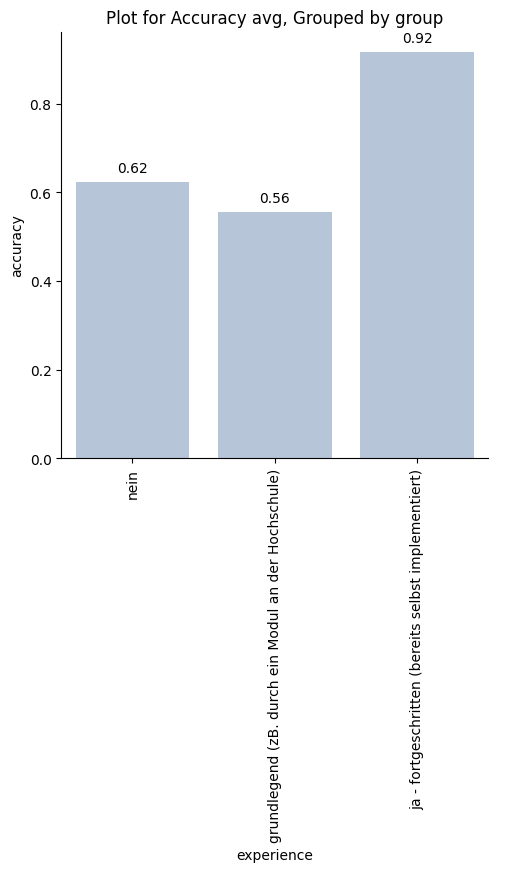

In [209]:
plt.figure(figsize=(8, 6))
g = sns.catplot(x='experience', y='accuracy', data=statistics_task_group1, kind='bar', color = "lightsteelblue", height=5, aspect=1, errorbar=None)
plt.xticks(rotation=90)
plt.title("Plot for Accuracy avg, Grouped by group")
ax = g.facet_axis(0, 0)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
#plt.savefig('accuracy_experience_ai_group1.png')
plt.show()

In [210]:
task = ['group 2', 'group 2', 'group 2']
values_a = [g2_eai_nein_m,g2_eai_grund_m,g2_eai_ja_m]
values_b = ['nein','grundlegend (zB. durch ein Modul an der Hochschule)','ja - fortgeschritten (bereits selbst implementiert)']



data_statistics_task_group2 = {'group': task, 'accuracy': values_a, 'experience': values_b}
statistics_task_group2 = pd.DataFrame(data_statistics_task_group2)

<Figure size 800x600 with 0 Axes>

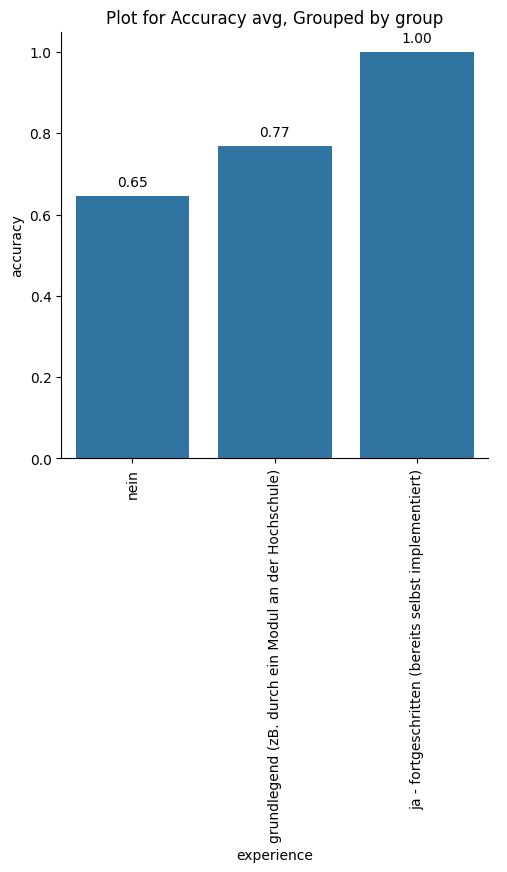

In [211]:
plt.figure(figsize=(8, 6))
g = sns.catplot(x='experience', y='accuracy', data=statistics_task_group2, kind='bar', height=5, aspect=1, errorbar=None)
plt.xticks(rotation=90)
plt.title("Plot for Accuracy avg, Grouped by group")
ax = g.facet_axis(0, 0)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
#plt.savefig('accuracy_experience_ai_group2.png')
plt.show()

In [212]:
g1_eai_nein = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'nein'), 'Accuracy_avg']
g1_eai_grund = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'grundlegend (zB. durch ein Modul an der Hochschule)'), 'Accuracy_avg']
g1_eai_ja = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'ja - fortgeschritten (bereits selbst implementiert)'), 'Accuracy_avg']



g2_eai_nein = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'nein'), 'Accuracy_avg']
g2_eai_grund = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'grundlegend (zB. durch ein Modul an der Hochschule)'), 'Accuracy_avg']
g2_eai_ja = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'ja - fortgeschritten (bereits selbst implementiert)'), 'Accuracy_avg']

In [213]:
avg_g1_eai_nein = g1_eai_nein.mean()
avg_g1_eai_grund = g1_eai_grund.mean()
avg_g1_eai_ja = g1_eai_ja.mean()

avg_g2_eai_nein = g2_eai_nein.mean()
avg_g2_eai_grund = g2_eai_grund.mean()
avg_g2_eai_ja = g2_eai_ja.mean()

sd_g1_eai_nein = g1_eai_nein.std()
sd_g1_eai_grund = g1_eai_grund.std()
sd_g1_eai_ja = g1_eai_ja.std()

sd_g2_eai_nein = g2_eai_nein.std()
sd_g2_eai_grund = g2_eai_grund.std()
sd_g2_eai_ja = g2_eai_ja.std()

print(avg_g1_eai_nein,
avg_g1_eai_grund,
avg_g1_eai_ja,

avg_g2_eai_nein,
avg_g2_eai_grund,
avg_g2_eai_ja,)

print(sd_g1_eai_nein,
sd_g1_eai_grund,
sd_g1_eai_ja,

sd_g2_eai_nein,
sd_g2_eai_grund,
sd_g2_eai_ja,)

0.6231884057971013 0.5555555555555556 0.9166666666666666 0.6458333333333333 0.769230769230769 1.0
0.18269441909526168 0.23570226039551584 0.16666666666666669 0.30956959368344517 0.21014172398537176 0.0


In [214]:
stats.mannwhitneyu(g1_eai_nein, g2_eai_nein, alternative='two-sided')

MannwhitneyuResult(statistic=172.0, pvalue=0.7006871567494544)

In [215]:
stats.mannwhitneyu(g1_eai_grund, g2_eai_grund, alternative='two-sided')

MannwhitneyuResult(statistic=30.5, pvalue=0.045709444349832144)

In [216]:
stats.mannwhitneyu(g1_eai_ja, g2_eai_ja, alternative='two-sided')

MannwhitneyuResult(statistic=4.5, pvalue=0.5637028616507731)

In [217]:
from scipy.stats import shapiro


stat, p_value = shapiro(statistic['correct'])
print(f'Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}')

Shapiro-Wilk Test Statistic: 0.8218482136726379, p-value: 1.315832207637868e-07


In [218]:
from scipy.stats import kruskal

In [219]:
kruskal(g1_eai_nein, g1_eai_grund, g1_eai_ja)

KruskalResult(statistic=9.273237361774632, pvalue=0.009690408657158823)

In [220]:
kruskal(g2_eai_nein, g2_eai_grund, g2_eai_ja)

KruskalResult(statistic=4.92909572903732, pvalue=0.08504728657590291)

In [221]:
!pip install scikit-posthocs

In [222]:
#Dunn test
import scikit_posthocs as sp


data_g1 = [g1_eai_nein, g1_eai_grund, g1_eai_ja]

p_values= sp.posthoc_dunn(data_g1, p_adjust = 'holm')

print(p_values)

          1         2         3
1  1.000000  0.300920  0.019048
2  0.300920  1.000000  0.007732
3  0.019048  0.007732  1.000000


In [223]:
import scipy.stats as stats

stats.mannwhitneyu(g1_eai_nein, g2_eai_nein, alternative='two-sided')

MannwhitneyuResult(statistic=172.0, pvalue=0.7006871567494544)

In [224]:
stats.mannwhitneyu(g1_eai_grund, g2_eai_grund, alternative='two-sided')

MannwhitneyuResult(statistic=30.5, pvalue=0.045709444349832144)

In [225]:
stats.mannwhitneyu(g1_eai_ja, g2_eai_ja, alternative='two-sided')

MannwhitneyuResult(statistic=4.5, pvalue=0.5637028616507731)

#Self-confidence

In [377]:
confidence = statistic[['group','1.2.3','2.2.3','3.2.3']]

In [378]:
confidence_g1 = confidence.loc[confidence['group']==1]
confidence_g2 = confidence.loc[confidence['group']==2]


In [379]:
c11 = confidence_g1['1.2.3']
c12 = confidence_g1['2.2.3']
c13 = confidence_g1['3.2.3']

c21 = confidence_g2['1.2.3']
c22 = confidence_g2['2.2.3']
c23 = confidence_g2['3.2.3']

In [380]:
avc_c11 = c11.mean()
avc_c12 = c12.mean()
avc_c13 = c13.mean()

avc_c21 = c21.mean()
avc_c22 = c22.mean()
avc_c23 = c23.mean()

sd_c11 = c11.std()
sd_c12 = c12.std()
sd_c13 = c13.std()

sd_c21 = c21.std()
sd_c22 = c22.std()
sd_c23 = c23.std()

print('control',avc_c11,
avc_c12,
avc_c13,
'treatment',
avc_c21,
avc_c22,
avc_c23)

print('control',sd_c11,
sd_c12,
sd_c13,
'treatment',
sd_c21,
sd_c22,
sd_c23)

control 3.5833333333333335 3.25 3.3055555555555554 treatment 3.484848484848485 3.5757575757575757 3.515151515151515
control 1.0790207200446682 0.9063269671749657 1.0370134162086937 treatment 1.0642254261084714 0.902437775912522 0.9055803429711565


In [381]:
cg1 = pd.concat([c11,c12,c13])
cg2 = pd.concat([c21,c22,c23])

In [382]:
avg_cg1 = cg1.mean()
avg_cg2 = cg2.mean()


sd_cg1 = cg1.std()
sd_cg2 = cg2.std()



print(avg_cg1,
      'treatment',
avg_cg2)

print(sd_cg1,
sd_cg2)

3.3796296296296298 treatment 3.525252525252525
1.0113153514351791 0.951298085683552


In [383]:

from scipy.stats import shapiro

stat, p_value = shapiro(statistic['1.2.3'])
print(f'Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}')

Shapiro-Wilk Test Statistic: 0.8650453090667725, p-value: 2.3847164811741095e-06


In [384]:
stat, p_value = shapiro(statistic['2.2.3'])
print(f'Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}')

Shapiro-Wilk Test Statistic: 0.8392333984375, p-value: 3.6172519912724965e-07


In [385]:
stat, p_value = shapiro(statistic['3.2.3'])
print(f'Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}')

Shapiro-Wilk Test Statistic: 0.8743901252746582, p-value: 4.963367700838717e-06


In [386]:
import scipy.stats as stats

stats.mannwhitneyu(cg1, cg2, alternative='two-sided')

MannwhitneyuResult(statistic=4927.5, pvalue=0.3036970836738053)

In [387]:
import scipy.stats as stats
stats.mannwhitneyu(c11, c21, alternative='two-sided')

MannwhitneyuResult(statistic=631.5, pvalue=0.6367183117969591)

In [388]:
stats.mannwhitneyu(c12, c22, alternative='two-sided')

MannwhitneyuResult(statistic=474.0, pvalue=0.11953527794401352)

In [389]:
stats.mannwhitneyu(c13, c23, alternative='two-sided')

MannwhitneyuResult(statistic=522.0, pvalue=0.36944279168852223)

In [390]:
stats.kruskal(c11,c12,c13)

KruskalResult(statistic=2.829386473149667, pvalue=0.2430001455732651)

In [391]:
stats.kruskal(c21,c22,c23)

KruskalResult(statistic=0.18892787809848527, pvalue=0.9098605444707395)

In [392]:
c11m = confidence_g1['1.2.3'].mean()
c12m = confidence_g1['2.2.3'].mean()
c13m = confidence_g1['3.2.3'].mean()

c21m = confidence_g2['1.2.3'].mean()
c22m = confidence_g2['2.2.3'].mean()
c23m = confidence_g2['3.2.3'].mean()

In [393]:
task = ['task1','task2','task3','task1','task2','task3']
values_a = [c11m,c12m,c13m,c21m,c22m,c23m]
values_b=['Control group','Control group','Control group','Treatment group','Treatment group','Treatment group']


data_confidence = {'task': task, 'average confidence': values_a, 'Group': values_b}
confidence_avg = pd.DataFrame(data_confidence)

In [394]:
cg1m = (c11m + c12m + c13m)/3
cg2m = (c21m+c22m+c23m)/3

In [395]:
task = ['task1','task2']
values_a = [cg1m, cg2m]
values_b=['Control group','Treatment group']


data_confidence_gm = {'task': task, 'average confidence': values_a, 'Group': values_b}
confidence_avg_gm = pd.DataFrame(data_confidence_gm)

<Figure size 800x600 with 0 Axes>

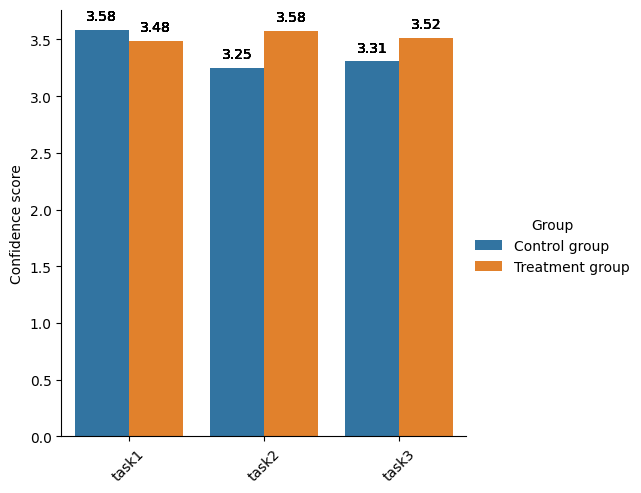

In [396]:
plt.figure(figsize=(8, 6))
g = sns.catplot(x='task', y='average confidence', data=confidence_avg, hue='Group', kind='bar', height=5, aspect=1)
plt.xticks(rotation=90)
plt.title("")
ax = g.facet_axis(0, 0)

for p in ax.patches:
  for p in ax.patches:
    height = p.get_height()
    if height != 0:
      ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45, ha='center')
ax.set_xlabel('')
ax.set_ylabel('Confidence score')

#plt.savefig('confidence_avg_task.png', bbox_inches='tight')
plt.show()

<Figure size 800x600 with 0 Axes>

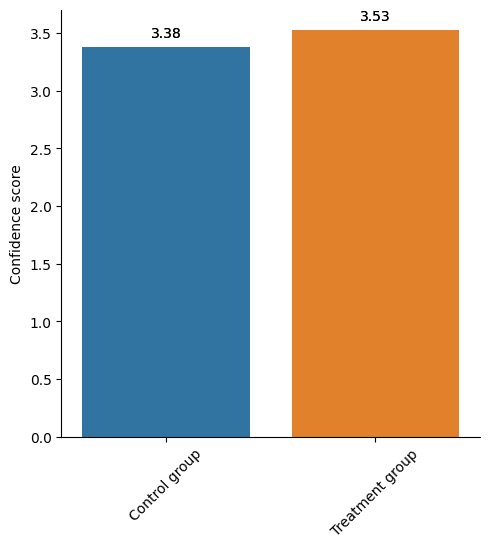

In [397]:
plt.figure(figsize=(8, 6))
g = sns.catplot(x='Group', y='average confidence', data=confidence_avg_gm, hue='Group', kind='bar', height=5, aspect=1)
plt.xticks(rotation=90)
plt.title("")
ax = g.facet_axis(0, 0)

for p in ax.patches:
  for p in ax.patches:
    height = p.get_height()
    if height != 0:
      ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45, ha='center')
ax.set_xlabel('')
ax.set_ylabel('Confidence score')

#plt.savefig('confidence_avg_gm.png', bbox_inches='tight')
plt.show()

nach experience

In [398]:
c11m = confidence_g1['1.2.3'].mean()
c12m = confidence_g1['2.2.3'].mean()
c13m = confidence_g1['3.2.3'].mean()

c21m = confidence_g2['1.2.3'].mean()
c22m = confidence_g2['2.2.3'].mean()
c23m = confidence_g2['3.2.3'].mean()

In [399]:
c11_nein = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'nein'), '1.2.3']
c11_grund = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'grundlegend (zB. durch ein Modul an der Hochschule)'), '1.2.3']
c11_ja = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'ja - fortgeschritten (bereits selbst implementiert)'), '1.2.3']

c12_nein = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'nein'), '2.2.3']
c12_grund = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'grundlegend (zB. durch ein Modul an der Hochschule)'), '2.2.3']
c12_ja = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'ja - fortgeschritten (bereits selbst implementiert)'), '2.2.3']

c13_nein = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'nein'), '3.2.3']
c13_grund = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'grundlegend (zB. durch ein Modul an der Hochschule)'), '3.2.3']
c13_ja = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'ja - fortgeschritten (bereits selbst implementiert)'), '3.2.3']


c21_nein = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'nein'), '1.2.3']
c21_grund = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'grundlegend (zB. durch ein Modul an der Hochschule)'), '1.2.3']
c21_ja = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'ja - fortgeschritten (bereits selbst implementiert)'), '1.2.3']

c22_nein = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'nein'), '2.2.3']
c22_grund = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'grundlegend (zB. durch ein Modul an der Hochschule)'), '2.2.3']
c22_ja = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'ja - fortgeschritten (bereits selbst implementiert)'), '2.2.3']

c23_nein = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'nein'), '3.2.3']
c23_grund = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'grundlegend (zB. durch ein Modul an der Hochschule)'), '3.2.3']
c23_ja = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'ja - fortgeschritten (bereits selbst implementiert)'), '3.2.3']

In [400]:
c11_nein_m = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'nein'), '1.2.3'].mean()
c11_grund_m = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'grundlegend (zB. durch ein Modul an der Hochschule)'), '1.2.3'].mean()
c11_ja_m = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'ja - fortgeschritten (bereits selbst implementiert)'), '1.2.3'].mean()

c12_nein_m = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'nein'), '2.2.3'].mean()
c12_grund_m = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'grundlegend (zB. durch ein Modul an der Hochschule)'), '2.2.3'].mean()
c12_ja_m = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'ja - fortgeschritten (bereits selbst implementiert)'), '2.2.3'].mean()

c13_nein_m = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'nein'), '3.2.3'].mean()
c13_grund_m = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'grundlegend (zB. durch ein Modul an der Hochschule)'), '3.2.3'].mean()
c13_ja_m = statistic.loc[(statistic['group'] == 1) & (statistic['experience_ai'] == 'ja - fortgeschritten (bereits selbst implementiert)'), '3.2.3'].mean()


c21_nein_m = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'nein'), '1.2.3'].mean()
c21_grund_m = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'grundlegend (zB. durch ein Modul an der Hochschule)'), '1.2.3'].mean()
c21_ja_m = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'ja - fortgeschritten (bereits selbst implementiert)'), '1.2.3'].mean()

c22_nein_m = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'nein'), '2.2.3'].mean()
c22_grund_m = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'grundlegend (zB. durch ein Modul an der Hochschule)'), '2.2.3'].mean()
c22_ja_m = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'ja - fortgeschritten (bereits selbst implementiert)'), '2.2.3'].mean()

c23_nein_m = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'nein'), '3.2.3'].mean()
c23_grund_m = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'grundlegend (zB. durch ein Modul an der Hochschule)'), '3.2.3'].mean()
c23_ja_m = statistic.loc[(statistic['group'] == 2) & (statistic['experience_ai'] == 'ja - fortgeschritten (bereits selbst implementiert)'), '3.2.3'].mean()

In [401]:
task = ['task1','task1','task1',
        'task2','task2','task2',
        'task3','task3','task3',
        'task1','task1','task1',
        'task2','task2','task2',
        'task3','task3','task3']
values_a = [c11_nein_m,c11_grund_m,c11_ja_m,
            c12_nein_m,c12_grund_m,c12_ja_m,
            c13_nein_m,c13_grund_m,c13_ja_m,
            c21_nein_m,c21_grund_m,c21_ja_m,
            c22_nein_m,c22_grund_m,c22_ja_m,
            c23_nein_m,c23_grund_m,c23_ja_m,]
values_b=['group 1','group 1','group 1',
          'group 1','group 1','group 1',
          'group 1','group 1','group 1',
          'group 2','group 2','group 2',
          'group 2','group 2','group 2',
          'group 2','group 2','group 2']


data_confidence_eai_m = {'task': task, 'average confidence': values_a, 'group': values_b}
confidence_avg_eai_m = pd.DataFrame(data_confidence_eai_m)

task 1 - experience split

In [402]:
experience = ['nein','grund','ja',
              'nein','grund','ja']
values_a = [c11_nein_m,c11_grund_m,c11_ja_m,
            c21_nein_m,c21_grund_m,c21_ja_m]
values_b=['group 1','group 1','group 1',
          'group 2','group 2','group 2']


data_confidence_eai_t1m = {'experience': experience, 'average confidence': values_a, 'group': values_b}
confidence_avg_eai_t1m = pd.DataFrame(data_confidence_eai_t1m)

<Figure size 800x600 with 0 Axes>

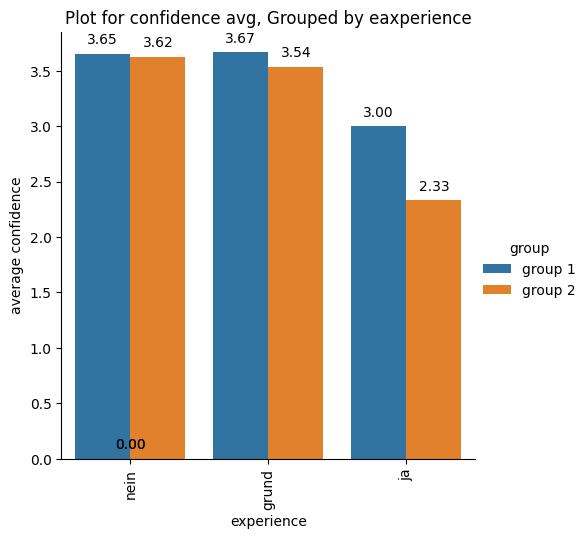

In [403]:
plt.figure(figsize=(8, 6))
g = sns.catplot(x='experience', y='average confidence', data=confidence_avg_eai_t1m, hue='group', kind='bar', height=5, aspect=1)
plt.xticks(rotation=90)
plt.title("Plot for confidence avg, Grouped by eaxperience")
ax = g.facet_axis(0, 0)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
#plt.savefig('confidence_avg_eai_t1m.png')

plt.show()

task 2 - xp split

In [404]:
experience = ['nein','grund','ja',
              'nein','grund','ja']
values_a = [c12_nein_m,c12_grund_m,c12_ja_m,
            c22_nein_m,c22_grund_m,c22_ja_m]
values_b=['group 1','group 1','group 1',
          'group 2','group 2','group 2']


data_confidence_eai_t2m = {'experience': experience, 'average confidence': values_a, 'group': values_b}
confidence_avg_eai_t2m = pd.DataFrame(data_confidence_eai_t2m)

<Figure size 800x600 with 0 Axes>

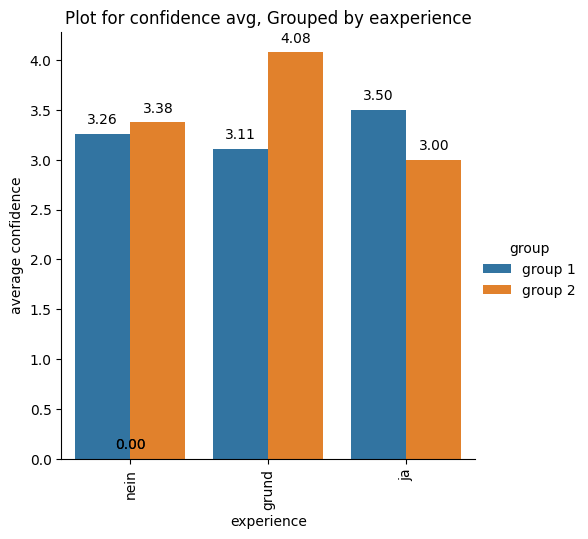

In [405]:
plt.figure(figsize=(8, 6))
g = sns.catplot(x='experience', y='average confidence', data=confidence_avg_eai_t2m, hue='group', kind='bar', height=5, aspect=1)
plt.xticks(rotation=90)
plt.title("Plot for confidence avg, Grouped by eaxperience")
ax = g.facet_axis(0, 0)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
#plt.savefig('confidence_avg_eai_t2m.png')

plt.show()

task 3 - xp split

In [406]:
experience = ['nein','grund','ja',
              'nein','grund','ja']
values_a = [c13_nein_m,c13_grund_m,c13_ja_m,
            c23_nein_m,c23_grund_m,c23_ja_m]
values_b=['group 1','group 1','group 1',
          'group 2','group 2','group 2']


data_confidence_eai_t3m = {'experience': experience, 'average confidence': values_a, 'group': values_b}
confidence_avg_eai_t3m = pd.DataFrame(data_confidence_eai_t3m)

<Figure size 800x600 with 0 Axes>

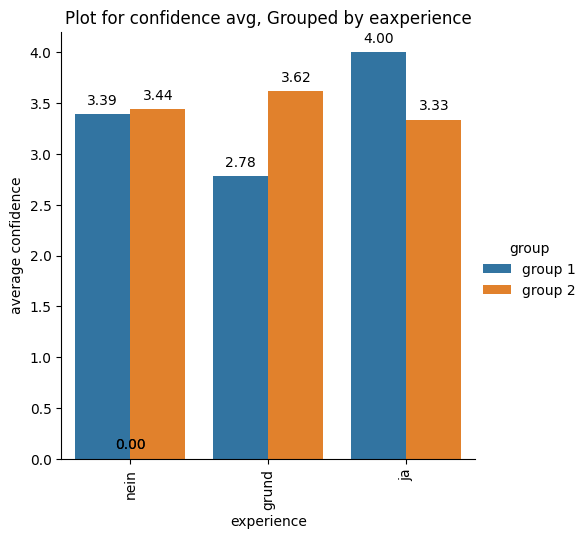

In [407]:
plt.figure(figsize=(8, 6))
g = sns.catplot(x='experience', y='average confidence', data=confidence_avg_eai_t3m, hue='group', kind='bar', height=5, aspect=1)
plt.xticks(rotation=90)
plt.title("Plot for confidence avg, Grouped by eaxperience")
ax = g.facet_axis(0, 0)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
#plt.savefig('confidence_avg_eai_t3m.png')

plt.show()

test confidence concat

In [408]:
cg1_nein = pd.concat([c11_nein,c12_nein,c13_nein])
cg1_grund = pd.concat([c11_grund,c12_grund,c13_grund])
cg1_ja = pd.concat([c11_ja,c12_ja,c13_ja])

cg2_nein = pd.concat([c21_nein,c22_nein,c23_nein])
cg2_grund = pd.concat([c21_grund,c22_grund,c23_grund])
cg2_ja = pd.concat([c21_ja,c22_ja,c23_ja])

In [409]:
cg1_nein_m = pd.concat([c11_nein,c12_nein,c13_nein]).mean()
cg1_grund_m = pd.concat([c11_grund,c12_grund,c13_grund]).mean()
cg1_ja_m = pd.concat([c11_ja,c12_ja,c13_ja]).mean()

cg2_nein_m = pd.concat([c21_nein,c22_nein,c23_nein]).mean()
cg2_grund_m = pd.concat([c21_grund,c22_grund,c23_grund]).mean()
cg2_ja_m = pd.concat([c21_ja,c22_ja,c23_ja]).mean()

In [410]:
experience = ['None','Basic','Advanced',
              'None','Basic','Advanced']
values_a = [cg1_nein_m, cg1_grund_m, cg1_ja_m,
            cg2_nein_m, cg2_grund_m, cg2_ja_m,]
values_b=['Control group','Control group','Control group',
          'Treatment group','Treatment group','Treatment group']


data_confidence_eai = {'experience': experience, 'average confidence': values_a, 'Group': values_b}
confidence_avg_eai = pd.DataFrame(data_confidence_eai)

<Figure size 800x600 with 0 Axes>

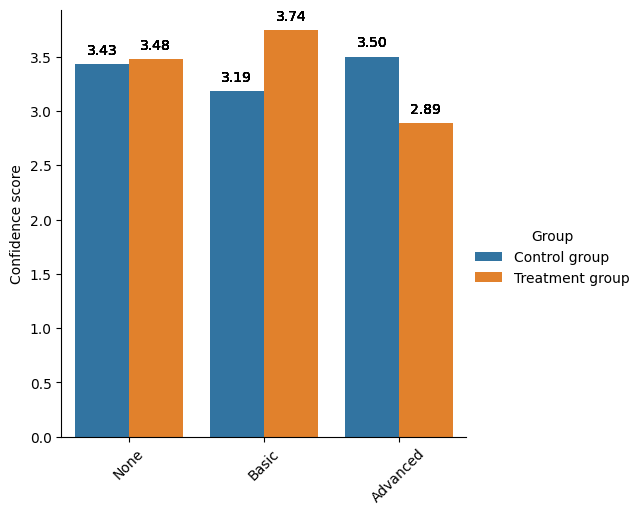

In [411]:

plt.figure(figsize=(8, 6))
g = sns.catplot(x='experience', y='average confidence', data=confidence_avg_eai, hue='Group', kind='bar', height=5, aspect=1)
plt.xticks(rotation=90)
plt.title("")
ax = g.facet_axis(0, 0)


for p in ax.patches:
  for p in ax.patches:
    height = p.get_height()
    if height != 0:
      ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xticks(rotation=45, ha='center')
ax.set_xlabel('')
ax.set_ylabel('Confidence score')

#plt.savefig('confidence_avg_eai.png', bbox_inches='tight')
plt.show()

In [412]:
import scipy.stats as stats

stats.mannwhitneyu(cg1_nein, cg2_nein, alternative='two-sided')

MannwhitneyuResult(statistic=1613.0, pvalue=0.8048834682158074)

In [413]:
stats.mannwhitneyu(cg1_grund, cg2_grund, alternative='two-sided')

MannwhitneyuResult(statistic=358.5, pvalue=0.01731338106710543)

In [414]:
stats.mannwhitneyu(cg1_ja, cg2_ja, alternative='two-sided')

MannwhitneyuResult(statistic=70.0, pvalue=0.2445685451323465)

In [415]:
from scipy.stats import shapiro


stat, p_value = shapiro(cg2_nein)
print(f'Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}')

Shapiro-Wilk Test Statistic: 0.8585205078125, p-value: 3.689630830194801e-05


In [416]:
stats.kruskal(cg1_ja,cg1_grund,cg1_nein)

KruskalResult(statistic=1.640576138355595, pvalue=0.44030479799401245)

In [417]:
stats.kruskal(cg2_ja,cg2_grund,cg2_nein)

KruskalResult(statistic=4.342492655991996, pvalue=0.11403540279149217)

In [418]:
avc_cg1_nein = cg1_nein.mean()
avc_cg1_grund = cg1_grund.mean()
avc_cg1_ja = cg1_ja.mean()

avc_cg2_nein = cg2_nein.mean()
avc_cg2_grund = cg2_grund.mean()
avg_cg2_ja = cg2_ja.mean()

sd_cg1_nein = cg1_nein.std()
sd_cg1_grund= cg1_grund.std()
sd_cg1_ja = cg1_ja.std()

sd_cg2_nein = cg2_nein.std()
sd_cg2_grund = cg2_grund.std()
sd_cg2_ja = cg2_ja.std()

print('control',avc_cg1_nein,
avc_cg1_grund,
avc_cg1_ja,
'treatment',
avc_cg2_nein,
avc_cg2_grund,
avg_cg2_ja)

print('control',sd_cg1_nein,
sd_cg1_grund,
sd_cg1_ja,
'treatment',
sd_cg2_nein,
sd_cg2_grund,
sd_cg2_ja)

control 3.4347826086956523 3.185185185185185 3.5 treatment 3.4791666666666665 3.7435897435897436 2.888888888888889
control 0.9922977030396677 0.8786806997310068 1.381698559415515 treatment 1.0103629710818451 0.7510676161988108 1.1666666666666667


#Trust

In [419]:
trust = statistic[['group','4.1','4.2','4.3','4.4','4.5','4.6','4.7',]]

In [420]:
trust_alpha = trust[['4.1','4.2','4.3','4.4','4.5','4.6','4.7']]

In [421]:
trust_alpha_alternative = trust_alpha


In [422]:
trust_alpha_alternative_g1 = trust.loc[trust['group']==1]

trust_alpha_alternative_g2 = trust.loc[trust['group']==2]


print(trust_alpha_alternative_g2.head())

    group  4.1  4.2  4.3  4.4  4.5  4.6  4.7
2       2    4    4    4    4    4    3    4
5       2    4    3    3    3    5    3    4
6       2    4    4    2    4    4    2    4
7       2    3    4    3    2    2    2    2
13      2    2    3    2    3    2    3    4


In [423]:
trust_alpha_g1 = trust.loc[trust['group']==1]
trust_alpha_g1.drop('group', axis=1, inplace=True)
print(trust_alpha_g1.head())

trust_alpha_g2 = trust.loc[trust['group']==2]
trust_alpha_g2.drop('group', axis=1, inplace=True)
print(trust_alpha_g2.head())

    4.1  4.2  4.3  4.4  4.5  4.6  4.7
1     3    3    1    3    2    3    2
3     2    2    3    1    2    3    3
4     2    2    2    2    2    3    2
8     4    4    3    2    2    4    4
10    4    4    2    2    4    4    3
    4.1  4.2  4.3  4.4  4.5  4.6  4.7
2     4    4    4    4    4    3    4
5     4    3    3    3    5    3    4
6     4    4    2    4    4    2    4
7     3    4    3    2    2    2    2
13    2    3    2    3    2    3    4



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [424]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 3.4 MB/s eta 0:00:00


In [425]:
import pingouin as pg

pg.cronbach_alpha(data=trust_alpha)


(0.7595834336624128, array([0.662, 0.837]))

In [426]:
pg.cronbach_alpha(data=trust_alpha)

(0.7595834336624128, array([0.662, 0.837]))

Trust average

In [427]:
avg_trust_levels_g1 = trust_alpha_g1.mean()
avg_trust_levels_g2 = trust_alpha_g2.mean()

print(avg_trust_levels_g1)
print(avg_trust_levels_g2)

4.1    3.194444
4.2    3.055556
4.3    2.138889
4.4    2.527778
4.5    3.027778
4.6    3.388889
4.7    3.083333
dtype: float64
4.1    3.424242
4.2    3.424242
4.3    2.636364
4.4    2.939394
4.5    3.151515
4.6    2.909091
4.7    3.727273
dtype: float64


In [428]:
avg_trust_g1=avg_trust_levels_g1.mean(axis=0)
print(avg_trust_g1)

avg_trust_g2=avg_trust_levels_g2.mean(axis=0)
print(avg_trust_g2)

2.916666666666667
3.173160173160173


In [429]:
task = ['task1','task2']
values_a = [avg_trust_g1, avg_trust_g2]
values_b=['Control group','Treatment group']


data_trust_gm = {'task': task, 'average trust': values_a, 'Group': values_b}
trust_avg_gm = pd.DataFrame(data_trust_gm)

<Figure size 800x600 with 0 Axes>

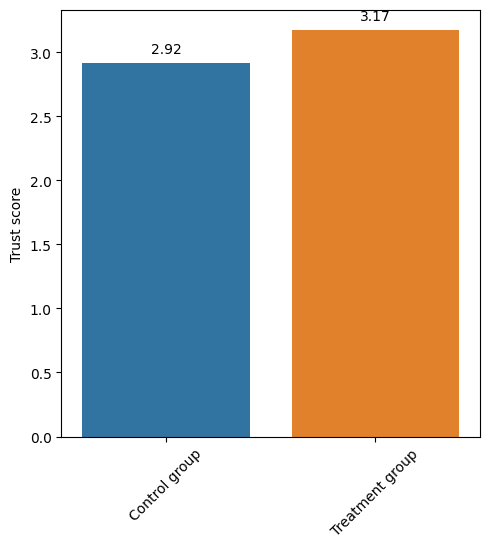

In [430]:
plt.figure(figsize=(8, 6))
g = sns.catplot(x='Group', y='average trust', data=trust_avg_gm, hue='Group', kind='bar', height=5, aspect=1)
plt.xticks(rotation=90)
plt.title("")
ax = g.facet_axis(0, 0)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45, ha='center')
ax.set_xlabel('')
ax.set_ylabel('Trust score')
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
#plt.savefig('trust_avg_gm.png', bbox_inches='tight')
plt.show()

In [431]:
tg1 = trust_alpha_g1.stack()
tg2 = trust_alpha_g2.stack()
from scipy.stats import shapiro


stat, p_value = shapiro(trust.stack())
print(f'Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}')


import scipy.stats as stats

stats.mannwhitneyu(tg1, tg2, alternative='two-sided')

Shapiro-Wilk Test Statistic: 0.8857743740081787, p-value: 8.964007017985989e-20


MannwhitneyuResult(statistic=25041.0, pvalue=0.005370405576018608)

In [432]:
avg_tg1 = tg1.mean()
avg_tg2 = tg2.mean()


sd_tg1 = tg1.std()
sd_tg2 = tg2.std()



print(avg_tg1,
      'treatment',
avg_tg2)

print(sd_tg1,
      'treatment',
sd_tg2)

2.9166666666666665 treatment 3.173160173160173
0.9763130906609908 treatment 0.9936178800848532


Trust - Dimensions

In [433]:
avc_t11 = trust_alpha_g1['4.1'].mean()
avc_t12 = trust_alpha_g1['4.2'].mean()
avc_t13 = trust_alpha_g1['4.3'].mean()
avc_t14 = trust_alpha_g1['4.4'].mean()
avc_t15 = trust_alpha_g1['4.5'].mean()
avc_t16 = trust_alpha_g1['4.6'].mean()
avc_t17 = trust_alpha_g1['4.7'].mean()

avc_t21 = trust_alpha_g2['4.1'].mean()
avc_t22 = trust_alpha_g2['4.2'].mean()
avc_t23 = trust_alpha_g2['4.3'].mean()
avc_t24 = trust_alpha_g2['4.4'].mean()
avc_t25 = trust_alpha_g2['4.5'].mean()
avc_t26 = trust_alpha_g2['4.6'].mean()
avc_t27 = trust_alpha_g2['4.7'].mean()

sd_t11 = trust_alpha_g1['4.1'].std()
sd_t12 = trust_alpha_g1['4.2'].std()
sd_t13 = trust_alpha_g1['4.3'].std()
sd_t14 = trust_alpha_g1['4.4'].std()
sd_t15 = trust_alpha_g1['4.5'].std()
sd_t16 = trust_alpha_g1['4.6'].std()
sd_t17 = trust_alpha_g1['4.7'].std()

sd_t21 = trust_alpha_g2['4.1'].std()
sd_t22 = trust_alpha_g2['4.2'].std()
sd_t23 = trust_alpha_g2['4.3'].std()
sd_t24 = trust_alpha_g2['4.4'].std()
sd_t25 = trust_alpha_g2['4.5'].std()
sd_t26 = trust_alpha_g2['4.6'].std()
sd_t27 = trust_alpha_g2['4.7'].std()

print('control',
      avc_t11,
      avc_t12,
      avc_t13,
      avc_t14,
      avc_t15,
      avc_t16,
      avc_t17,
'treatment',
      avc_t21,
      avc_t22,
      avc_t23,
      avc_t24,
      avc_t25,
      avc_t26,
      avc_t27)

print('control',
      sd_t11,
      sd_t12,
      sd_t13,
      sd_t14,
      sd_t15,
      sd_t16,
      sd_t17,
'treatment',
      sd_t21,
      sd_t22,
      sd_t23,
      sd_t24,
      sd_t25,
      sd_t26,
      sd_t27)

control 3.1944444444444446 3.0555555555555554 2.138888888888889 2.5277777777777777 3.0277777777777777 3.388888888888889 3.0833333333333335 treatment 3.4242424242424243 3.4242424242424243 2.6363636363636362 2.9393939393939394 3.1515151515151514 2.909090909090909 3.727272727272727
control 0.821825301020129 0.8261595987094034 0.6825489109748956 0.9407022031018293 1.0552213338878549 0.8710511803161505 1.0522085616183026 treatment 0.902437775912522 0.8302975005345611 0.9623597890790968 0.8992842271563097 1.0931952056132324 0.8427498280790526 1.0390117682420419


In [434]:
avg_trust_g1_41 = avg_trust_levels_g1['4.1']
print(avg_trust_g1_41)

avg_trust_g2_41 = avg_trust_levels_g2['4.1']
print(avg_trust_g2_41)

avg_trust_g1_42 = avg_trust_levels_g1['4.2']
print(avg_trust_g1_42)

avg_trust_g2_42 = avg_trust_levels_g2['4.2']
print(avg_trust_g2_42)

avg_trust_g1_43 = avg_trust_levels_g1['4.3']
print(avg_trust_g1_43)

avg_trust_g2_43 = avg_trust_levels_g2['4.3']
print(avg_trust_g2_43)

avg_trust_g1_44 = avg_trust_levels_g1['4.4']
print(avg_trust_g1_44)

avg_trust_g2_44 = avg_trust_levels_g2['4.4']
print(avg_trust_g2_44)

avg_trust_g1_45 = avg_trust_levels_g1['4.5']
print(avg_trust_g1_45)

avg_trust_g2_45 = avg_trust_levels_g2['4.5']
print(avg_trust_g2_45)

avg_trust_g1_46 = avg_trust_levels_g1['4.6']
print(avg_trust_g1_46)

avg_trust_g2_46 = avg_trust_levels_g2['4.6']
print(avg_trust_g2_46)

avg_trust_g1_47 = avg_trust_levels_g1['4.7']
print(avg_trust_g1_47)

avg_trust_g2_47 = avg_trust_levels_g2['4.7']
print(avg_trust_g2_47)


3.1944444444444446
3.4242424242424243
3.0555555555555554
3.4242424242424243
2.138888888888889
2.6363636363636362
2.5277777777777777
2.9393939393939394
3.0277777777777777
3.1515151515151514
3.388888888888889
2.909090909090909
3.0833333333333335
3.727272727272727


In [435]:
task = ['3.1','3.1',
        '3.2','3.2',
        '3.3','3.3',
        '3.4','3.4',
        '3.5','3.5',
        '3.6','3.6',
        '3.7','3.7']
values_a = [avg_trust_g1_41, avg_trust_g2_41,
            avg_trust_g1_42, avg_trust_g2_42,
            avg_trust_g1_43, avg_trust_g2_43,
            avg_trust_g1_44, avg_trust_g2_44,
            avg_trust_g1_45, avg_trust_g2_45,
            avg_trust_g1_46, avg_trust_g2_46,
            avg_trust_g1_47, avg_trust_g2_47]
values_b=['Control group','Treatment group',
          'Control group','Treatment group',
          'Control group','Treatment group',
          'Control group','Treatment group',
          'Control group','Treatment group',
          'Control group','Treatment group',
          'Control group','Treatment group']

# Create a DataFrame for graphic
data_trust_pt = {'task': task, 'average trust': values_a, 'Group': values_b}
trust_avg_pt = pd.DataFrame(data_trust_pt)


<Figure size 800x600 with 0 Axes>

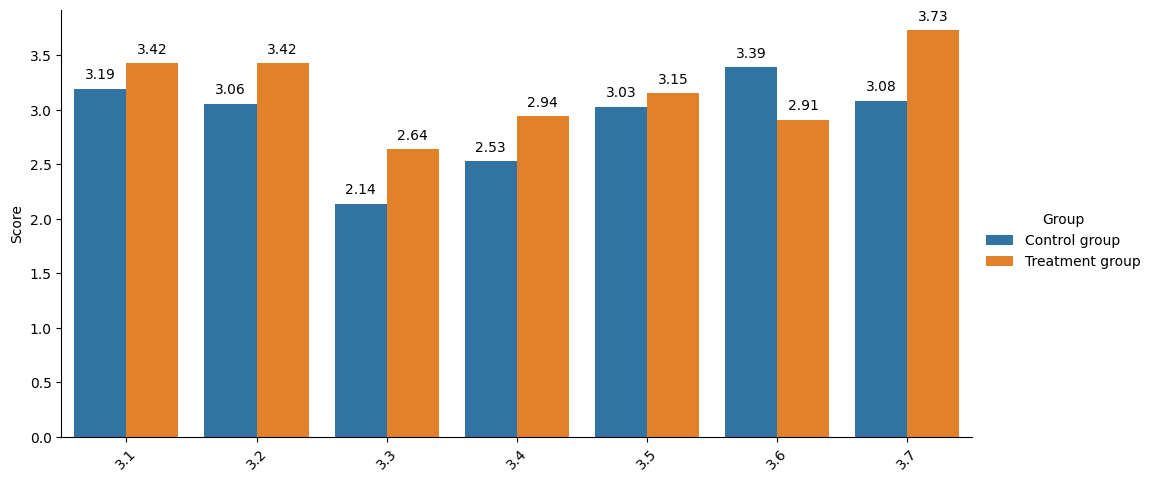

In [436]:
plt.figure(figsize=(8, 6))
g = sns.catplot(x='task', y='average trust', data=trust_avg_pt, hue='Group', kind='bar', height=5, aspect=2)
plt.xticks(rotation=90)
plt.title("")
ax = g.facet_axis(0, 0)

for p in ax.patches:
    height = p.get_height()
    if height != 0:  # Only annotate when the height is not zero
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')



plt.xticks(rotation=45, ha='center')
ax.set_xlabel('')
ax.set_ylabel('Score')

#plt.savefig('trust_avg_pt.png', bbox_inches='tight')
plt.show()

In [437]:
stats.mannwhitneyu(trust_alpha_g1, trust_alpha_g2, alternative='two-sided')

MannwhitneyuResult(statistic=array([498. , 442.5, 418. , 458.5, 560.5, 776.5, 391. ]), pvalue=array([0.20875361, 0.05367955, 0.02474014, 0.0846417 , 0.67004821,
       0.02120044, 0.01105093]))

In [438]:
stats.mannwhitneyu(trust_alpha_g1['4.1'], trust_alpha_g2['4.1'], alternative='two-sided')

MannwhitneyuResult(statistic=498.0, pvalue=0.20875360866627268)

In [439]:
stats.mannwhitneyu(trust_alpha_g1['4.2'], trust_alpha_g2['4.2'], alternative='two-sided')

MannwhitneyuResult(statistic=442.5, pvalue=0.0536795528052082)

In [440]:
stats.mannwhitneyu(trust_alpha_g1['4.3'], trust_alpha_g2['4.3'], alternative='two-sided')

MannwhitneyuResult(statistic=418.0, pvalue=0.024740136934979787)

In [441]:
stats.mannwhitneyu(trust_alpha_g1['4.4'], trust_alpha_g2['4.4'], alternative='two-sided')

MannwhitneyuResult(statistic=458.5, pvalue=0.08464169935359458)

In [442]:
stats.mannwhitneyu(trust_alpha_g1['4.5'], trust_alpha_g2['4.5'], alternative='two-sided')

MannwhitneyuResult(statistic=560.5, pvalue=0.6700482121524245)

In [443]:
stats.mannwhitneyu(trust_alpha_g1['4.6'], trust_alpha_g2['4.6'], alternative='two-sided')

MannwhitneyuResult(statistic=776.5, pvalue=0.021200436553682665)

In [444]:
stats.mannwhitneyu(trust_alpha_g1['4.7'], trust_alpha_g2['4.7'], alternative='two-sided')

MannwhitneyuResult(statistic=391.0, pvalue=0.011050930248851277)

In [445]:
stats.mannwhitneyu(trust_alpha_g1, trust_alpha_g2, alternative='two-sided')

MannwhitneyuResult(statistic=array([498. , 442.5, 418. , 458.5, 560.5, 776.5, 391. ]), pvalue=array([0.20875361, 0.05367955, 0.02474014, 0.0846417 , 0.67004821,
       0.02120044, 0.01105093]))

#Trust - XAI experience

In [446]:
trust_eai = statistic[['group','4.1','4.2','4.3','4.4','4.5','4.6','4.7','experience_ai']]

In [447]:
trust_eai_g1 = trust_eai.loc[trust_eai['group']==1]
trust_eai_g1.drop('group', axis=1, inplace=True)
print(trust_eai_g1.head())

trust_eai_g2 = trust_eai.loc[trust_eai['group']==2]
trust_eai_g2.drop('group', axis=1, inplace=True)
print(trust_eai_g2.head())

    4.1  4.2  4.3  4.4  4.5  4.6  4.7  \
1     3    3    1    3    2    3    2   
3     2    2    3    1    2    3    3   
4     2    2    2    2    2    3    2   
8     4    4    3    2    2    4    4   
10    4    4    2    2    4    4    3   

                                        experience_ai  
1   grundlegend (zB. durch ein Modul an der Hochsc...  
3                                                nein  
4                                                nein  
8   ja - fortgeschritten (bereits selbst implement...  
10                                               nein  
    4.1  4.2  4.3  4.4  4.5  4.6  4.7  \
2     4    4    4    4    4    3    4   
5     4    3    3    3    5    3    4   
6     4    4    2    4    4    2    4   
7     3    4    3    2    2    2    2   
13    2    3    2    3    2    3    4   

                                        experience_ai  
2   grundlegend (zB. durch ein Modul an der Hochsc...  
5   grundlegend (zB. durch ein Modul an der Hochsc...  
6 


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [448]:
trust_eai_g1_grund = trust_eai_g1.loc[trust_eai_g1['experience_ai']=='grundlegend (zB. durch ein Modul an der Hochschule)']
trust_eai_g1_grund.drop('experience_ai', axis=1, inplace=True)
print(trust_eai_g1_grund.head())

trust_eai_g1_nein = trust_eai_g1.loc[trust_eai_g1['experience_ai']=='nein']
trust_eai_g1_nein.drop('experience_ai', axis=1, inplace=True)

trust_eai_g1_ja = trust_eai_g1.loc[trust_eai_g1['experience_ai']=='ja - fortgeschritten (bereits selbst implementiert)']
trust_eai_g1_ja.drop('experience_ai', axis=1, inplace=True)

trust_eai_g2_grund = trust_eai_g2.loc[trust_eai_g2['experience_ai']=='grundlegend (zB. durch ein Modul an der Hochschule)']
trust_eai_g2_grund.drop('experience_ai', axis=1, inplace=True)
print(trust_eai_g2_grund.head())

trust_eai_g2_nein = trust_eai_g2.loc[trust_eai_g2['experience_ai']=='nein']
trust_eai_g2_nein.drop('experience_ai', axis=1, inplace=True)

trust_eai_g2_ja = trust_eai_g2.loc[trust_eai_g2['experience_ai']=='ja - fortgeschritten (bereits selbst implementiert)']
trust_eai_g2_ja.drop('experience_ai', axis=1, inplace=True)


    4.1  4.2  4.3  4.4  4.5  4.6  4.7
1     3    3    1    3    2    3    2
22    2    3    2    2    2    2    1
32    2    2    1    1    2    2    4
36    3    3    1    3    2    3    2
38    4    2    2    2    2    3    3
    4.1  4.2  4.3  4.4  4.5  4.6  4.7
2     4    4    4    4    4    3    4
5     4    3    3    3    5    3    4
19    2    4    1    2    1    2    4
37    4    2    3    3    4    3    4
39    4    4    4    4    4    3    4



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [449]:
import scipy.stats as stats

stats.mannwhitneyu(trust_eai_g1_grund, trust_eai_g2_grund, alternative='two-sided')

MannwhitneyuResult(statistic=array([42. , 33. , 21.5, 41. , 33.5, 67.5, 21.5]), pvalue=array([0.24423803, 0.07219416, 0.0110159 , 0.23175636, 0.08442121,
       0.53534513, 0.00746559]))

In [450]:
stats.mannwhitneyu(trust_eai_g1_nein, trust_eai_g2_nein, alternative='two-sided')

MannwhitneyuResult(statistic=array([163.5, 139.5, 152.5, 155. , 238. , 233.5, 170. ]), pvalue=array([0.52321202, 0.17875924, 0.32993856, 0.38737648, 0.09417607,
       0.13948245, 0.68848955]))

In [451]:
stats.mannwhitneyu(trust_eai_g1_ja, trust_eai_g2_ja, alternative='two-sided')

MannwhitneyuResult(statistic=array([5., 6., 7., 3., 3., 8., 1.]), pvalue=array([0.84857209, 1.        , 0.82549791, 0.32412659, 0.33972778,
       0.55411313, 0.0922308 ]))

In [452]:
stats.mannwhitneyu(trust_eai_g1_ja['4.1'], trust_eai_g2_ja['4.1'], alternative='two-sided')

MannwhitneyuResult(statistic=5.0, pvalue=0.8485720888307414)

In [453]:
trust_eai_g1_grund_stacked = trust_eai_g1_grund.stack()
trust_eai_g1_ja_stacked = trust_eai_g1_ja.stack()
trust_eai_g1_nein_stacked = trust_eai_g1_nein.stack()

In [454]:
trust_eai_g2_grund_stacked = trust_eai_g2_grund.stack()
trust_eai_g2_ja_stacked = trust_eai_g2_ja.stack()
trust_eai_g2_nein_stacked = trust_eai_g2_nein.stack()

In [455]:
stats.mannwhitneyu(trust_eai_g1_grund_stacked, trust_eai_g2_grund_stacked, alternative='two-sided')

MannwhitneyuResult(statistic=1829.5, pvalue=6.907337896405577e-05)

In [456]:
stats.mannwhitneyu(trust_eai_g1_ja_stacked, trust_eai_g2_ja_stacked, alternative='two-sided')

MannwhitneyuResult(statistic=240.0, pvalue=0.2588411739282058)

In [457]:
stats.mannwhitneyu(trust_eai_g1_nein_stacked, trust_eai_g2_nein_stacked, alternative='two-sided')

MannwhitneyuResult(statistic=8756.0, pvalue=0.6698746209115516)

In [458]:
trust_eai_g1_grund_mean = trust_eai_g1_grund.mean()
trust_eai_g1_grund_mean = trust_eai_g1_grund_mean.mean(axis=0)
trust_eai_g1_ja_mean = trust_eai_g1_ja.mean()
trust_eai_g1_ja_mean = trust_eai_g1_ja_mean.mean(axis=0)
trust_eai_g1_nein_mean = trust_eai_g1_nein.mean()
trust_eai_g1_nein_mean = trust_eai_g1_nein_mean.mean(axis=0)

In [459]:
trust_eai_g2_grund_mean = trust_eai_g2_grund.mean()
trust_eai_g2_grund_mean = trust_eai_g2_grund_mean.mean(axis=0)
trust_eai_g2_ja_mean = trust_eai_g2_ja.mean()
trust_eai_g2_ja_mean = trust_eai_g2_ja_mean.mean(axis=0)
trust_eai_g2_nein_mean = trust_eai_g2_nein.mean()
trust_eai_g2_nein_mean = trust_eai_g2_nein_mean.mean(axis=0)

<Figure size 800x600 with 0 Axes>

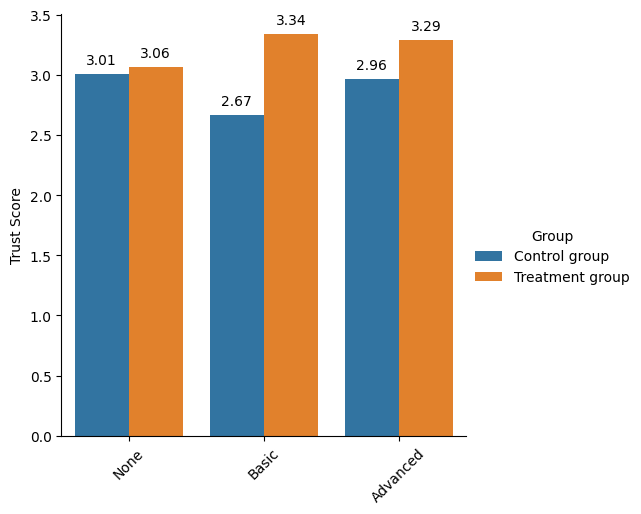

In [460]:
experience = ['None','Basic','Advanced',
              'None','Basic','Advanced']
values_a = [trust_eai_g1_nein_mean, trust_eai_g1_grund_mean, trust_eai_g1_ja_mean,
            trust_eai_g2_nein_mean, trust_eai_g2_grund_mean, trust_eai_g2_ja_mean]
values_b=['Control group','Control group','Control group',
          'Treatment group','Treatment group','Treatment group']


data_trust_eai = {'experience': experience, 'average trust': values_a, 'Group': values_b}
trust_avg_eai = pd.DataFrame(data_trust_eai)

plt.figure(figsize=(8, 6))
g = sns.catplot(x='experience', y='average trust', data=trust_avg_eai, hue='Group', kind='bar', height=5, aspect=1)
plt.xticks(rotation=90)
plt.title("")
ax = g.facet_axis(0, 0)





for p in ax.patches:
    height = p.get_height()
    if height != 0:  # Only annotate when the height is not zero
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')



plt.xticks(rotation=45, ha='center')
ax.set_xlabel('')
ax.set_ylabel('Trust Score')

#plt.savefig('trust_avg_eai.png', bbox_inches='tight')
plt.show()

In [461]:
t_eai_g1_grund=trust_eai_g1_grund.stack()
t_eai_g1_ja=trust_eai_g1_ja.stack()
t_eai_g1_nein=trust_eai_g1_nein.stack()

t_eai_g2_grund=trust_eai_g2_grund.stack()
t_eai_g2_ja=trust_eai_g2_ja.stack()
t_eai_g2_nein=trust_eai_g2_nein.stack()

In [462]:
avc_t_eai_g1_grund = t_eai_g1_grund.mean()
avc_t_eai_g1_nein = t_eai_g1_nein.mean()
avc_t_eai_g1_ja = t_eai_g1_ja.mean()

avc_t_eai_g2_grund = t_eai_g2_grund.mean()
avc_t_eai_g2_nein = t_eai_g2_nein.mean()
avc_t_eai_g2_ja = t_eai_g2_ja.mean()

sd_t_eai_g1_grund = t_eai_g1_grund.std()
sd_t_eai_g1_nein = t_eai_g1_nein.std()
sd_t_eai_g1_ja = t_eai_g1_ja.std()

sd_t_eai_g2_grund = t_eai_g2_grund.std()
sd_t_eai_g2_nein = t_eai_g2_nein.std()
sd_t_eai_g2_ja = t_eai_g2_ja.std()

print('control',
      avc_t_eai_g1_nein,
      avc_t_eai_g1_grund,
      avc_t_eai_g1_ja,

'treatment',
      avc_t_eai_g2_nein,
      avc_t_eai_g2_grund,
      avc_t_eai_g2_ja)

print('control',
      sd_t_eai_g1_nein,
      sd_t_eai_g1_grund,
      sd_t_eai_g1_ja,

'treatment',
      sd_t_eai_g2_nein,
      sd_t_eai_g2_grund,
      sd_t_eai_g2_ja)

control 3.0062111801242235 2.6666666666666665 2.9642857142857144 treatment 3.0625 3.340659340659341 3.2857142857142856
control 0.9649928394160361 0.9837387536759294 0.9615628812527939 treatment 0.9705691652347629 0.9912929852782085 1.1019463300386796


#Utilisation

In [463]:
util = statistic[['group','1.2.1','1.2.2','2.2.1','2.2.2','3.2.1','3.2.2']]

In [464]:
util_g1 = util.loc[util['group']==1]
util_g2 = util.loc[util['group']==2]


In [465]:
u_ai_11 = util_g1['1.2.2']
u_ai_12 = util_g1['2.2.2']
u_ai_13 = util_g1['3.2.2']

u_data_11 = util_g1['1.2.1']
u_data_12 = util_g1['2.2.1']
u_data_13 = util_g1['3.2.1']

u_ai_21 = util_g2['1.2.2']
u_ai_22 = util_g2['2.2.2']
u_ai_23 = util_g2['3.2.2']

u_data_21 = util_g2['1.2.1']
u_data_22 = util_g2['2.2.1']
u_data_23 = util_g2['3.2.1']

In [466]:
from scipy.stats import shapiro


stat, p_value = shapiro(statistic['1.2.1'])
print(f'Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}')

Shapiro-Wilk Test Statistic: 0.6384797096252441, p-value: 9.354930892435664e-12


In [467]:
stat, p_value = shapiro(statistic['2.2.2'])
print(f'Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}')

Shapiro-Wilk Test Statistic: 0.8462990522384644, p-value: 5.949781325398362e-07


In [468]:
stat, p_value = shapiro(statistic['3.2.2'])
print(f'Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}')

Shapiro-Wilk Test Statistic: 0.898221492767334, p-value: 3.7218822399154305e-05


In [469]:
import scipy.stats as stats

stats.mannwhitneyu(u_data_11, u_data_21, alternative='two-sided')

MannwhitneyuResult(statistic=572.5, pvalue=0.7379829144464594)

In [470]:
stats.mannwhitneyu(u_data_12, u_data_22, alternative='two-sided')

MannwhitneyuResult(statistic=756.5, pvalue=0.02417504759745056)

In [471]:
stats.mannwhitneyu(u_data_13, u_data_23, alternative='two-sided')

MannwhitneyuResult(statistic=776.0, pvalue=0.01443692893949466)

In [472]:
stats.mannwhitneyu(u_ai_11, u_ai_21, alternative='two-sided')

MannwhitneyuResult(statistic=514.0, pvalue=0.2983076246546671)

In [473]:
stats.mannwhitneyu(u_ai_12, u_ai_22, alternative='two-sided')

MannwhitneyuResult(statistic=394.0, pvalue=0.012822076255583558)

In [474]:
stats.mannwhitneyu(u_ai_13, u_ai_23, alternative='two-sided')

MannwhitneyuResult(statistic=375.5, pvalue=0.006661966446122269)

In [475]:
u_ai_23.mean()

3.212121212121212

In [476]:
task = ['task 1', 'task 1',
        'task 2', 'task 2',
        'task 3', 'task 3']
values_a = [u_ai_11.mean(),u_ai_21.mean(),
            u_ai_12.mean(),u_ai_22.mean(),
            u_ai_13.mean(),u_ai_23.mean()]
values_b=['Control group','Treatment group',
          'Control group','Treatment group',
          'Control group','Treatment group',]


data_util_ai = {'task': task, 'average utilization': values_a, 'Group': values_b}
util_ai = pd.DataFrame(data_util_ai)

In [477]:
task = ['task 1', 'task 1',
        'task 2', 'task 2',
        'task 3', 'task 3']
values_a = [u_data_11.mean(),u_data_21.mean(),
            u_data_12.mean(),u_data_22.mean(),
            u_data_13.mean(),u_data_23.mean()]
values_b=['Control group','Treatment group',
          'Control group','Treatment group',
          'Control group','Treatment group',]


data_util_data = {'task': task, 'average utilization': values_a, 'Group': values_b}
util_data = pd.DataFrame(data_util_data)

<Figure size 800x600 with 0 Axes>

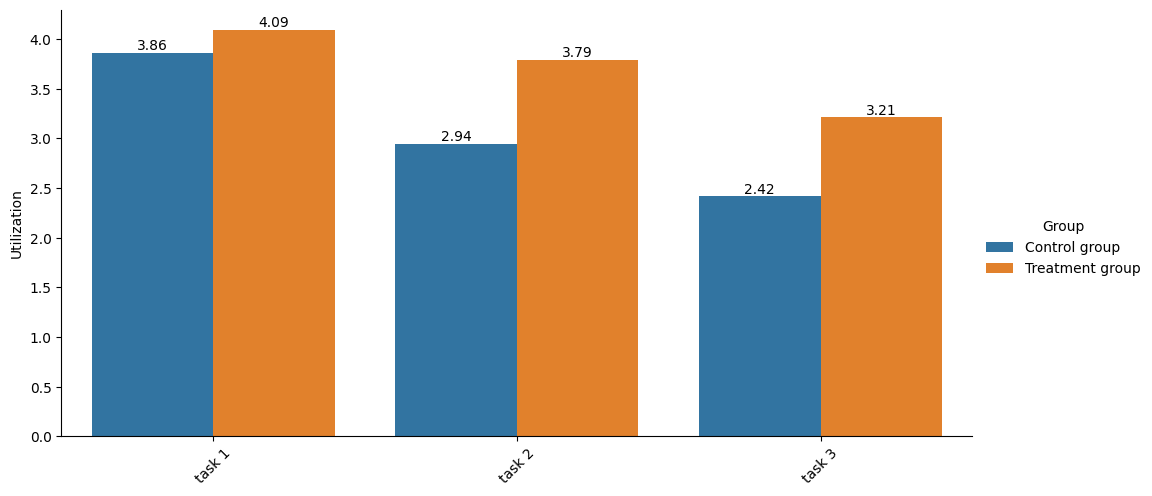

In [478]:


plt.figure(figsize=(8, 6))
g = sns.catplot(x='task', y='average utilization', data=util_ai, hue='Group', kind='bar', height=5, aspect=2)
plt.xticks(rotation=90)
plt.title("")
ax = g.facet_axis(0, 0)

for p in ax.patches:
    height = p.get_height()
    if height != 0:
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.xticks(rotation=45, ha='center')
ax.set_xlabel('')
ax.set_ylabel('Utilization')

plt.savefig('util_ai.png', bbox_inches='tight')
plt.show()


<Figure size 800x600 with 0 Axes>

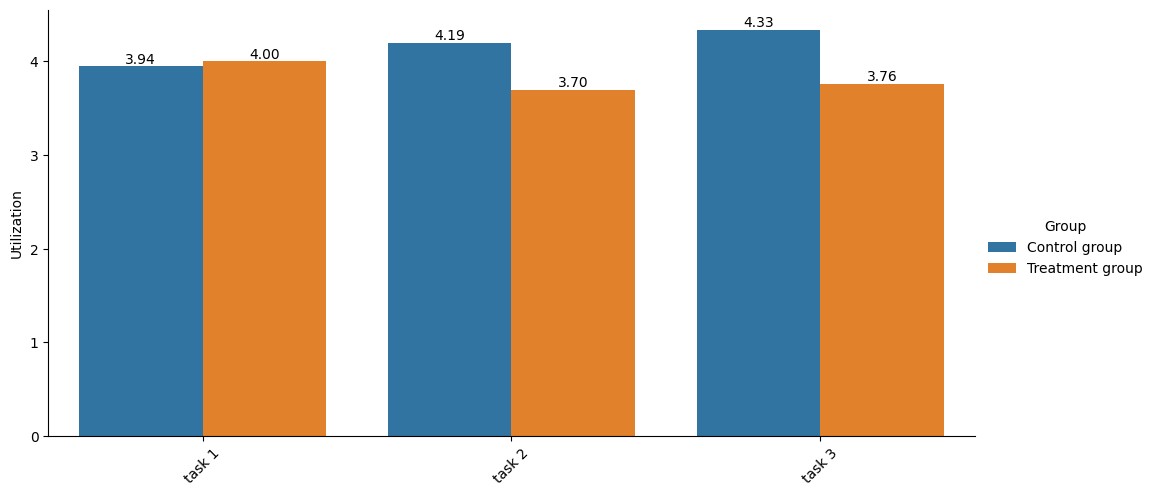

In [479]:
plt.figure(figsize=(8, 6))
g = sns.catplot(x='task', y='average utilization', data=util_data, hue='Group', kind='bar', height=5, aspect=2)
plt.xticks(rotation=90)
plt.title("")
ax = g.facet_axis(0, 0)

for p in ax.patches:
    height = p.get_height()
    if height != 0:
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45, ha='center')
ax.set_xlabel('')
ax.set_ylabel('Utilization')

plt.savefig('util_data.png', bbox_inches='tight')
plt.show()


#Other

In [480]:
task = ['correct','correct','false','false']
values_a = [36,33,2,4]
values_b=['Control group','Treatment group','Control group','Treatment group']


data_fail_check = {'correct': task, 'amount failed': values_a, 'group': values_b}
fail_check = pd.DataFrame(data_fail_check)

<Figure size 800x600 with 0 Axes>

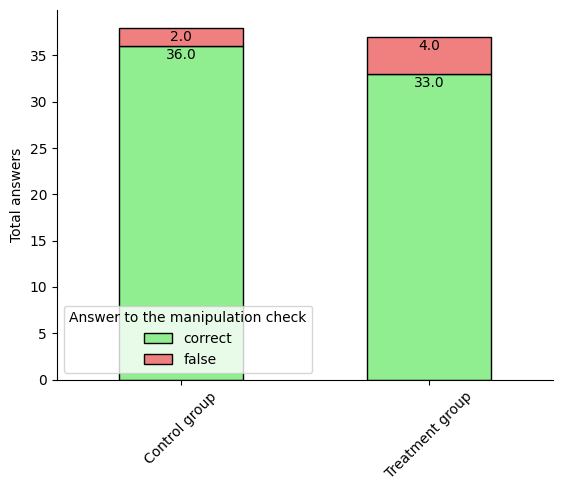

In [481]:
pivot_fail_check = fail_check.pivot_table(index='group', columns='correct', values='amount failed', aggfunc='sum', fill_value=0)

plt.figure(figsize=(8, 6))
ax = pivot_fail_check.plot(kind='bar', stacked=True, color=['lightgreen', 'lightcoral'], edgecolor='black')


for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height - 1.0), ha='center', va='center', color='black')

plt.title('')
plt.xlabel('Group')

plt.legend(title='Answer to the manipulation check')
plt.xticks(rotation=45, ha='center')
ax.set_xlabel('')
ax.set_ylabel('Total answers')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.savefig('fail_check.png', bbox_inches='tight')
plt.show()

rest

In [482]:
import scipy.stats as stats

stats.mannwhitneyu(c12, c22, alternative='two-sided')

MannwhitneyuResult(statistic=474.0, pvalue=0.11953527794401352)

In [483]:
import scipy.stats as stats

stats.mannwhitneyu(c13, c23, alternative='two-sided')

MannwhitneyuResult(statistic=522.0, pvalue=0.36944279168852223)

In [484]:
c11m = confidence_g1['1.2.3'].mean()
c12m = confidence_g1['2.2.3'].mean()
c13m = confidence_g1['3.2.3'].mean()

c21m = confidence_g2['1.2.3'].mean()
c22m = confidence_g2['2.2.3'].mean()
c23m = confidence_g2['3.2.3'].mean()

In [485]:
task = ['task1','task2','task3','task1','task2','task3']
values_a = [c11m,c12m,c13m,c21m,c22m,c23m]
values_b=['group 1','group 1','group 1','group 2','group 2','group 2']

# Create a DataFrame for graphic
data_confidence = {'task': task, 'average confidence': values_a, 'group': values_b}
confidence_avg = pd.DataFrame(data_confidence)

<Figure size 800x600 with 0 Axes>

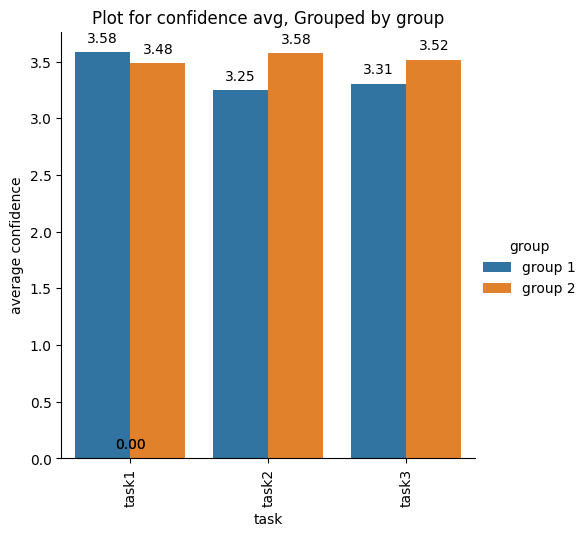

In [486]:
plt.figure(figsize=(8, 6))
g = sns.catplot(x='task', y='average confidence', data=confidence_avg, hue='group', kind='bar', height=5, aspect=1, errorbar=None)
plt.xticks(rotation=90)
plt.title("Plot for confidence avg, Grouped by group")
ax = g.facet_axis(0, 0)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
#plt.savefig('confidence_avg.png') #WICHTIG ! Trennen in 3*diese grafik damit 3x mann u test sinn ergibt
plt.show()

In [487]:
print(statistic.loc[statistic['group'] == 1, ('ID','manipulation_check','Accuracy_avg')])

     ID manipulation_check  Accuracy_avg
1     6                Rot      0.666667
3     9                Rot      0.666667
4    10                Rot      0.666667
8    14                Rot      0.666667
10   17                Rot      0.666667
14   24                Rot      0.666667
15   25                Rot      0.666667
16   29                Rot      0.666667
20   33                Rot      1.000000
21   39                Rot      0.333333
22   40                Rot      0.333333
23   42                Rot      0.666667
24   43                Rot      0.666667
26   46                Rot      1.000000
30   54                Rot      0.666667
31   56                Rot      0.666667
32   57                Rot      0.333333
36   62                Rot      0.666667
38   65                Rot      1.000000
47   80                Rot      0.666667
48   81                Rot      0.666667
49   82                Rot      0.666667
52   86                Rot      0.000000
54   88         

#characteristics of participants

gender

In [518]:
gender_distrib = statistic['gender'].value_counts()

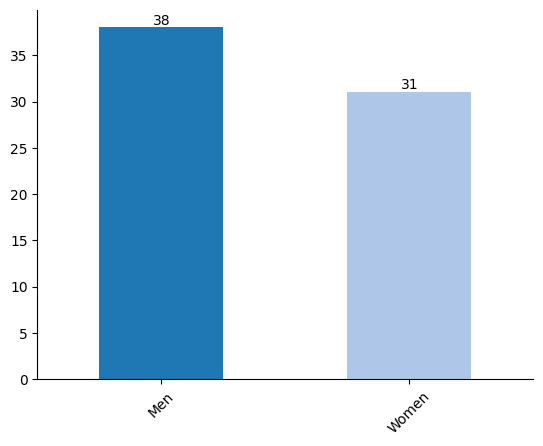

In [519]:
ax = gender_distrib.plot.bar(color=['#1f77b4', '#aec7e8'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Men', 'Women'], rotation=45, ha='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.savefig('gender_di.png',bbox_inches='tight')
plt.show()

age

In [520]:
age_distrib = statistic['age_group'].value_counts()
age_distrib=age_distrib.rename(index={'60 und darüber': '60+'})

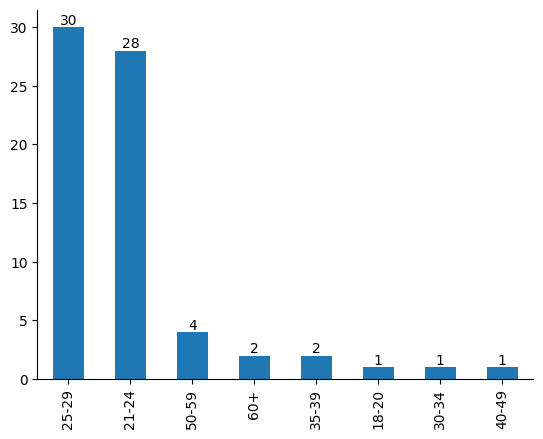

In [521]:
ax = age_distrib.plot.bar()



for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('age_di.png',bbox_inches='tight')
plt.show()


In [522]:
age_distrib=age_distrib.rename(index={'60 und darüber': '60+'})

student

In [523]:
student_distrib = statistic['student'].value_counts()
student_distrib=student_distrib.rename(index={0: 'not disclosed'})

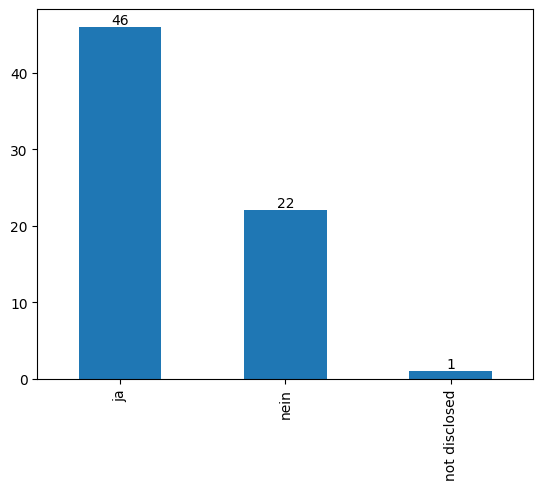

In [524]:
ax = student_distrib.plot.bar()



for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.savefig('student_distrib.png')
plt.show()


xp loan

In [525]:
statistic['experience_loan']

1                 nein
2                 nein
3                 nein
4                 nein
5                 nein
            ...       
70                nein
71                   0
72    ja - als Kund:in
73                nein
74                nein
Name: experience_loan, Length: 69, dtype: object

In [526]:
xp_loan_distrib = statistic['experience_loan'].value_counts()
xp_loan_distrib.name = ''
xp_loan_distrib=xp_loan_distrib.rename(index={0: 'Undisclosed'})
xp_loan_distrib=xp_loan_distrib.rename(index={'nein': 'None'})
xp_loan_distrib=xp_loan_distrib.rename(index={'ja - als Kund:in': 'As customer'})

In [527]:
type(xp_loan_distrib)

pandas.core.series.Series

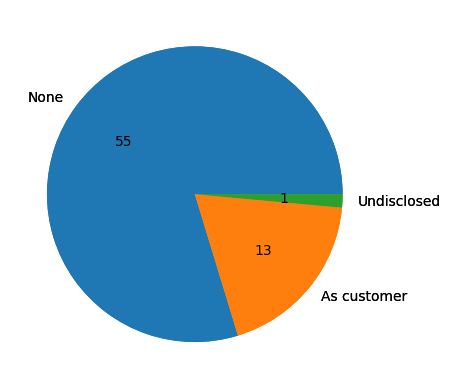

In [528]:
ax = xp_loan_distrib.plot.pie()

ax.pie(xp_loan_distrib,
       labels=xp_loan_distrib.index.values,
       autopct=lambda p: '{:.0f}'.format(p * sum(xp_loan_distrib) / 100))
ax.set_title('')
plt.savefig('xp_loan_di.png',bbox_inches='tight')


plt.show()

xp ai

In [529]:
xp_ai_distrib = statistic['experience_ai'].value_counts()
xp_ai_distrib.name = ''
xp_ai_distrib=xp_ai_distrib.rename(index={0: 'Undisclosed'})
xp_ai_distrib=xp_ai_distrib.rename(index={'nein': 'None'})
xp_ai_distrib=xp_ai_distrib.rename(index={'ja - fortgeschritten (bereits selbst implementiert)': 'Advanced knowledge'})
xp_ai_distrib=xp_ai_distrib.rename(index={'grundlegend (zB. durch ein Modul an der Hochschule)': 'Basic knowledge'})

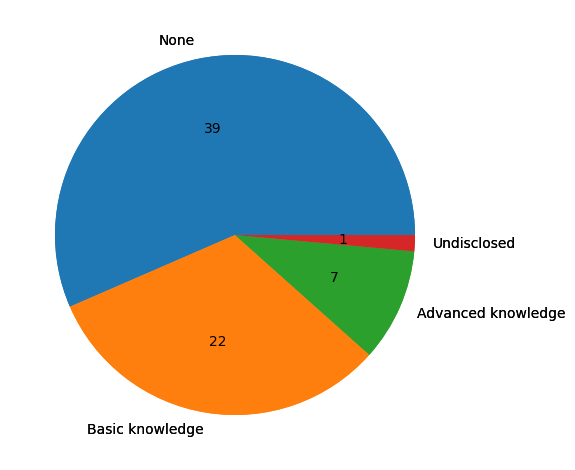

In [530]:
ax = xp_ai_distrib.plot.pie()

ax.pie(xp_ai_distrib,
       labels=xp_ai_distrib.index.values,
       autopct=lambda p: '{:.0f}'.format(p * sum(xp_loan_distrib) / 100))
plt.savefig('xp_ai_distrib.png',bbox_inches='tight')
plt.tight_layout()

plt.show()

#Benchmark plots

Charts - bucketing comparisons

In [502]:
#Table for Accuracy and F1 single bucket aggregate !

single_data = {
    'Measure': ["Accuracy", "F1"],
    'XGB': [0.635841, 0.708889],
    'CB': [0.626451, 0.704635],
    'KNN': [0.567984, 0.627133],
    'GBC': [0.612451, 0.696126],
    'RF': [0.616797, 0.668694],

}

single = pd.DataFrame(single_data)
single.set_index('Measure', inplace=True )

print(single)
single_t = single.transpose()

               XGB        CB       KNN       GBC        RF
Measure                                                   
Accuracy  0.635841  0.626451  0.567984  0.612451  0.616797
F1        0.708889  0.704635  0.627133  0.696126  0.668694


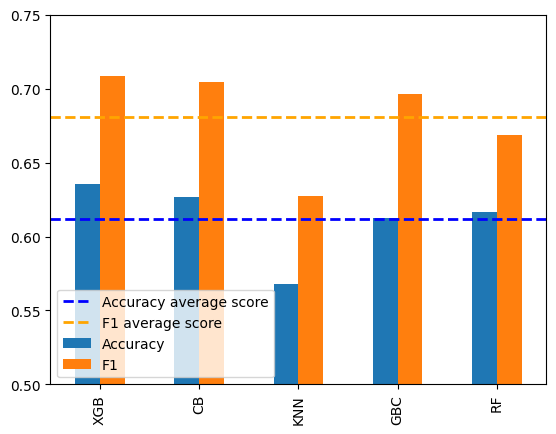

In [503]:
single_t.plot(kind='bar')
plt.ylim(0.5, 0.75)
plt.axhline(single_t['Accuracy'].mean(), color='blue', linewidth=2, linestyle='--', label="Accuracy average score")
plt.axhline(single_t['F1'].mean(), color='orange', linewidth=2, linestyle='--', label="F1 average score")
plt.legend(loc='lower left')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.savefig('barchart_single_bucket.png', bbox_inches='tight')  # Change the filename and format as needed

plt.show()

In [504]:
#Tabel for Accuracy and F1 prefix bucket aggregate !




Prefix_length = [1,1,1,1,1,
                 1,1,1,1,1,
                 2,2,2,2,2,
                 2,2,2,2,2,
                 3,3,3,3,3,
                 3,3,3,3,3,
                 4,4,4,4,4,
                 4,4,4,4,4,
                 5,5,5,5,5,
                 5,5,5,5,5,
                 6,6,6,6,6,
                 6,6,6,6,6,
                 7,7,7,7,7,
                 7,7,7,7,7,
                 8,8,8,8,8,
                 8,8,8,8,8,
                 9,9,9,9,9,
                 9,9,9,9,9,
                 10,10,10,10,10,
                 10,10,10,10,10,
                 11,11,11,11,11,
                 11,11,11,11,11,
                 12,12,12,12,12,
                 12,12,12,12,12,
                 13,13,13,13,13,
                 13,13,13,13,13,
                 14,14,14,14,14,
                 14,14,14,14,14,
                 15,15,15,15,15,
                 15,15,15,15,15,
                 16,16,16,16,16,
                 16,16,16,16,16,
                 17,17,17,17,17,
                 17,17,17,17,17,
                 18,18,18,18,18,
                 18,18,18,18,18,
                 19,19,19,19,19,
                 19,19,19,19,19,
                 20,20,20,20,20,
                 20,20,20,20,20]

Algorithm = ['XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',
             'XGB', 'CB', 'KNN', 'GBC', 'RF',]
Measure=['Accuracy','Accuracy','Accuracy','Accuracy','Accuracy',
         'F1','F1','F1','F1','F1',
         'Accuracy','Accuracy','Accuracy','Accuracy','Accuracy',
         'F1','F1','F1','F1','F1',
         'Accuracy','Accuracy','Accuracy','Accuracy','Accuracy',
         'F1','F1','F1','F1','F1',
         'Accuracy','Accuracy','Accuracy','Accuracy','Accuracy',
         'F1','F1','F1','F1','F1',
         'Accuracy','Accuracy','Accuracy','Accuracy','Accuracy',
         'F1','F1','F1','F1','F1',
         'Accuracy','Accuracy','Accuracy','Accuracy','Accuracy',
         'F1','F1','F1','F1','F1',
         'Accuracy','Accuracy','Accuracy','Accuracy','Accuracy',
         'F1','F1','F1','F1','F1',
         'Accuracy','Accuracy','Accuracy','Accuracy','Accuracy',
         'F1','F1','F1','F1','F1',
         'Accuracy','Accuracy','Accuracy','Accuracy','Accuracy',
         'F1','F1','F1','F1','F1',
         'Accuracy','Accuracy','Accuracy','Accuracy','Accuracy',
         'F1','F1','F1','F1','F1',
         'Accuracy','Accuracy','Accuracy','Accuracy','Accuracy',
         'F1','F1','F1','F1','F1',
         'Accuracy','Accuracy','Accuracy','Accuracy','Accuracy',
         'F1','F1','F1','F1','F1',
         'Accuracy','Accuracy','Accuracy','Accuracy','Accuracy',
         'F1','F1','F1','F1','F1',
         'Accuracy','Accuracy','Accuracy','Accuracy','Accuracy',
         'F1','F1','F1','F1','F1',
         'Accuracy','Accuracy','Accuracy','Accuracy','Accuracy',
         'F1','F1','F1','F1','F1',
         'Accuracy','Accuracy','Accuracy','Accuracy','Accuracy',
         'F1','F1','F1','F1','F1',
         'Accuracy','Accuracy','Accuracy','Accuracy','Accuracy',
         'F1','F1','F1','F1','F1',
         'Accuracy','Accuracy','Accuracy','Accuracy','Accuracy',
         'F1','F1','F1','F1','F1',
         'Accuracy','Accuracy','Accuracy','Accuracy','Accuracy',
         'F1','F1','F1','F1','F1',
         'Accuracy','Accuracy','Accuracy','Accuracy','Accuracy',
         'F1','F1','F1','F1','F1']
Score=[0.574919, 0.581875, 0.541326, 0.583415, 0.559574,
       0.632982,0.653882, 0.592759, 0.662417, 0.606776,

       0.570193, 0.584317, 0.548796, 0.590423, 0.551026,
       0.635548, 0.659760, 0.603302, 0.672679, 0.624005,

       0.563291, 0.586175, 0.547097, 0.590104, 0.554690,
       0.629342, 0.661951, 0.599841, 0.672769, 0.624815,

       0.570724, 0.586441, 0.546134, 0.590476, 0.546460,
       0.636042, 0.659344, 0.600632, 0.669080, 0.612499,

       0.569131, 0.588733, 0.548804, 0.589892, 0.528885,
       0.630574, 0.655234, 0.593651, 0.665345, 0.573159,

       0.574335, 0.588299, 0.549166, 0.598556, 0.544016,
       0.634736, 0.657166, 0.597417, 0.667843, 0.586020,

       0.579562, 0.592946, 0.551042, 0.599586, 0.537497,
       0.649297, 0.669969, 0.604181, 0.680903, 0.585311,

       0.577406, 0.591069, 0.548644, 0.596066, 0.538171,
       0.644100, 0.663532, 0.599818, 0.672147, 0.583417,

       0.579220, 0.590924, 0.552034, 0.593159, 0.540860,
       0.651680, 0.671191, 0.605897, 0.680566, 0.588152,

       0.574622, 0.588620, 0.554024, 0.592985, 0.546998,
       0.641789, 0.665488, 0.607951, 0.672899, 0.590671,

       0.578368, 0.590351, 0.549821, 0.590989, 0.542899,
       0.648695, 0.669943, 0.605934, 0.674010, 0.591339,

       0.574076, 0.584038, 0.549412, 0.589899, 0.544244,
       0.644289, 0.664823, 0.604259, 0.674413, 0.591708,

       0.581162, 0.594671, 0.553557, 0.596701, 0.547149,
       0.651841, 0.673064, 0.609209, 0.678712, 0.595471,

       0.586743, 0.600441, 0.558116, 0.600548, 0.553873,
       0.657257, 0.677285, 0.612401, 0.680717, 0.601073,

       0.590254, 0.598585, 0.567603, 0.605718, 0.556440,
       0.661349, 0.678880, 0.624438, 0.689955, 0.606831,

       0.636691, 0.645707, 0.612293, 0.652897, 0.598798,
       0.722235, 0.734680, 0.696236, 0.740947, 0.679623,

       0.667666, 0.668890, 0.632541, 0.676478, 0.625077,
       0.754353, 0.759027, 0.721818, 0.763561, 0.712261,

       0.682184, 0.688633, 0.651533, 0.693295, 0.645211,
       0.776246, 0.784057, 0.750032, 0.788692, 0.740861,

       0.710999, 0.719182, 0.693360, 0.724078, 0.672502,
       0.807060, 0.814439, 0.791072, 0.819485, 0.773855,

       0.723808, 0.731237, 0.699022, 0.734986, 0.685899,
       0.821442, 0.828140, 0.801822, 0.831554, 0.790272]


prefix_length_data = {'Prefix length': Prefix_length, 'Algorithm': Algorithm, 'Measure': Measure, 'Score': Score}
prefix_length_data_df = pd.DataFrame(prefix_length_data)

prefix_length_data_df
prefix_length_data_df.set_index('Prefix length', inplace=True)
#prefix_graph.set_index('Measure', inplace=True )


#prefix_graph_t = prefix_graph.transpose()

In [505]:
prefix_length_data_df

Algorithm   Measure     Score
Prefix length                              
1                   XGB  Accuracy  0.574919
1                    CB  Accuracy  0.581875
1                   KNN  Accuracy  0.541326
1                   GBC  Accuracy  0.583415
1                    RF  Accuracy  0.559574
...                 ...       ...       ...
20                  XGB        F1  0.821442
20                   CB        F1  0.828140
20                  KNN        F1  0.801822
20                  GBC        F1  0.831554
20                   RF        F1  0.790272

[200 rows x 3 columns]

In [506]:
prefix_length_data_df[
    (prefix_length_data_df['Measure'] == 'Accuracy') &
    (prefix_length_data_df['Algorithm'] == 'XGB')
]

Algorithm   Measure     Score
Prefix length                              
1                   XGB  Accuracy  0.574919
2                   XGB  Accuracy  0.570193
3                   XGB  Accuracy  0.563291
4                   XGB  Accuracy  0.570724
5                   XGB  Accuracy  0.569131
6                   XGB  Accuracy  0.574335
7                   XGB  Accuracy  0.579562
8                   XGB  Accuracy  0.577406
9                   XGB  Accuracy  0.579220
10                  XGB  Accuracy  0.574622
11                  XGB  Accuracy  0.578368
12                  XGB  Accuracy  0.574076
13                  XGB  Accuracy  0.581162
14                  XGB  Accuracy  0.586743
15                  XGB  Accuracy  0.590254
16                  XGB  Accuracy  0.636691
17                  XGB  Accuracy  0.667666
18                  XGB  Accuracy  0.682184
19                  XGB  Accuracy  0.710999
20                  XGB  Accuracy  0.723808

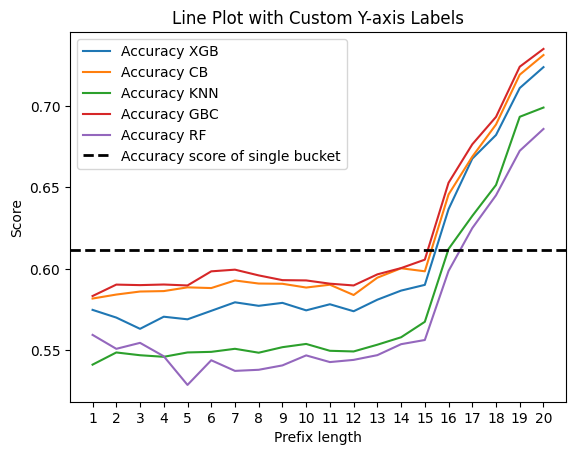

In [507]:
import pandas as pd
import matplotlib.pyplot as plt


plt.plot(prefix_length_data_df[
    (prefix_length_data_df['Measure'] == 'Accuracy') &
    (prefix_length_data_df['Algorithm'] == 'XGB')
]["Score"], label='Accuracy XGB')


plt.plot(prefix_length_data_df[
    (prefix_length_data_df['Measure'] == 'Accuracy') &
    (prefix_length_data_df['Algorithm'] == 'CB')
]["Score"], label='Accuracy CB')





plt.plot(prefix_length_data_df[
    (prefix_length_data_df['Measure'] == 'Accuracy') &
    (prefix_length_data_df['Algorithm'] == 'KNN')
]["Score"], label='Accuracy KNN')


plt.plot(prefix_length_data_df[
    (prefix_length_data_df['Measure'] == 'Accuracy') &
    (prefix_length_data_df['Algorithm'] == 'GBC')
]["Score"], label='Accuracy GBC')




plt.plot(prefix_length_data_df[
    (prefix_length_data_df['Measure'] == 'Accuracy') &
    (prefix_length_data_df['Algorithm'] == 'RF')
]["Score"], label='Accuracy RF')

plt.axhline(single_t['Accuracy'].mean(), color='black', linewidth=2, linestyle='--', label="Accuracy score of single bucket")




plt.xlabel('Prefix length')
plt.ylabel('Score')
plt.title('Line Plot with Custom Y-axis Labels')


plt.legend()
plt.xticks(range(1, 21))
#plt.savefig('linechart_accuracy_prefix.png', bbox_inches='tight')  # Change the filename and format as needed


plt.show()


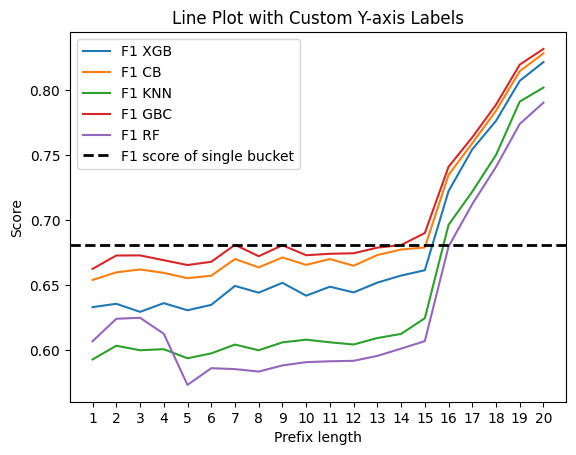

In [508]:
import pandas as pd
import matplotlib.pyplot as plt


plt.plot(prefix_length_data_df[
    (prefix_length_data_df['Measure'] == 'F1') &
    (prefix_length_data_df['Algorithm'] == 'XGB')
]["Score"], label='F1 XGB')


plt.plot(prefix_length_data_df[
    (prefix_length_data_df['Measure'] == 'F1') &
    (prefix_length_data_df['Algorithm'] == 'CB')
]["Score"], label='F1 CB')


plt.plot(prefix_length_data_df[
    (prefix_length_data_df['Measure'] == 'F1') &
    (prefix_length_data_df['Algorithm'] == 'KNN')
]["Score"], label='F1 KNN')


plt.plot(prefix_length_data_df[
    (prefix_length_data_df['Measure'] == 'F1') &
    (prefix_length_data_df['Algorithm'] == 'GBC')
]["Score"], label='F1 GBC')


plt.plot(prefix_length_data_df[
    (prefix_length_data_df['Measure'] == 'F1') &
    (prefix_length_data_df['Algorithm'] == 'RF')
]["Score"], label='F1 RF')


plt.axhline(single_t['F1'].mean(), color='black', linewidth=2, linestyle='--', label="F1 score of single bucket")


plt.xlabel('Prefix length')
plt.ylabel('Score')
plt.title('Line Plot with Custom Y-axis Labels')


plt.legend()
plt.xticks(range(1, 21))
#plt.savefig('linechart_F1_prefix.png', bbox_inches='tight')  # Change the filename and format as needed


plt.show()


Charts - encoding comparisons

In [509]:
#Table for Accuracy and F1 prefix length 19 aggregate !

aggregate_data = {
    'type': ["aggregate", "aggregate"],
    'XGB': [0.710999, 0.80706],
    'CB': [0.719182, 0.818228],
    'KNN': [0.69336, 0.791072],
    'GBC': [0.724078, 0.819522],
    'RF': [0.674245, 0.772872],
    'SVC': [0.710195, 0.819405]
}

aggregate = pd.DataFrame(aggregate_data)
aggregate.set_index('type', inplace=True )

print(aggregate)

                XGB        CB       KNN       GBC        RF       SVC
type                                                                 
aggregate  0.710999  0.719182  0.693360  0.724078  0.674245  0.710195
aggregate  0.807060  0.818228  0.791072  0.819522  0.772872  0.819405


(0.5, 0.9)

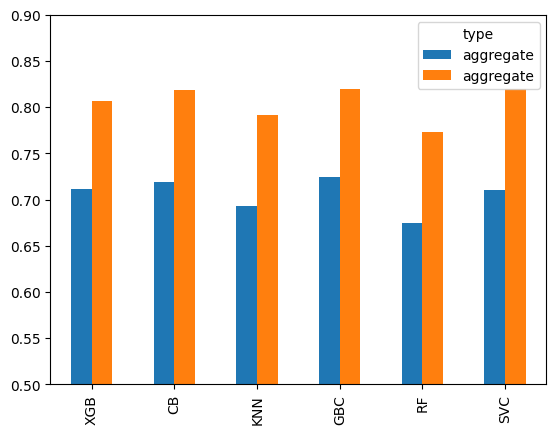

In [510]:
aggregate_graph = aggregate.transpose()
aggregate_graph.plot.bar()
#print(aggregate_graph.index)
plt.ylim(0.5, 0.9)


In [511]:
#Table for Accuracy and F1 prefix length 19 index !

index_data = {
    'type': ['index', 'index'],
    'XGB': [0.712475, 0.807871],
    'CB': [0.723407, 0.817625],
    'KNN': [0.686385, 0.786066],
    'GBC': [0.725486, 0.819443],
    'RF': [0.674581, 0.773434],
    'SVC': [0.720926, 0.81609]
}

index = pd.DataFrame(index_data)
index.set_index('type', inplace=True )

print(index)

            XGB        CB       KNN       GBC        RF       SVC
type                                                             
index  0.712475  0.723407  0.686385  0.725486  0.674581  0.720926
index  0.807871  0.817625  0.786066  0.819443  0.773434  0.816090


     aggregate     index
XGB   0.710999  0.712475
CB    0.719182  0.723407
KNN   0.693360  0.686385
GBC   0.724078  0.725486
RF    0.674245  0.674581
SVC   0.710195  0.720926


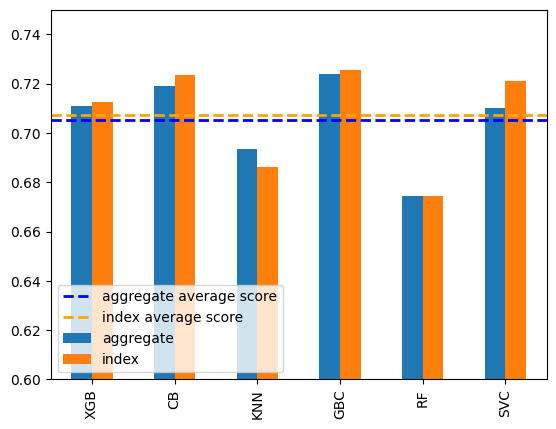

In [512]:
accuracy_data = pd.concat([aggregate.iloc[0], index.iloc[0]], axis=1)
print(accuracy_data)


accuracy_data.plot(kind='bar')
plt.ylim(0.6, 0.75)
plt.axhline(aggregate.iloc[0].mean(), color='blue', linewidth=2, linestyle='--', label="aggregate average score")
plt.axhline(index.iloc[0].mean(), color='orange', linewidth=2, linestyle='--', label="index average score")
plt.legend(loc='lower left')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.savefig('barchart_accuracy.png', bbox_inches='tight')  # Change the filename and format as needed

plt.show()


     aggregate     index
XGB   0.807060  0.807871
CB    0.818228  0.817625
KNN   0.791072  0.786066
GBC   0.819522  0.819443
RF    0.772872  0.773434
SVC   0.819405  0.816090


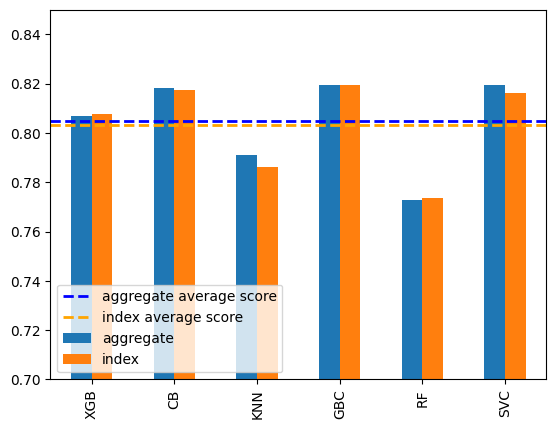

In [513]:
F1_data = pd.concat([aggregate.iloc[1], index.iloc[1]], axis=1)
print(F1_data)

#accuracy_graph = accuracy_data.transpose()
F1_data.plot(kind='bar')
#print(aggregate_graph.index)
plt.ylim(0.7, 0.85)
plt.axhline(aggregate.iloc[1].mean(), color='blue', linewidth=2, linestyle='--', label="aggregate average score")
plt.axhline(index.iloc[1].mean(), color='orange', linewidth=2, linestyle='--', label="index average score")
plt.legend(loc='lower left')

#plt.savefig('barchart_F1.png', bbox_inches='tight')  # Change the filename and format as needed


Charts - algorithm comparison

In [514]:
algorithm_comparison = {
    'measure': ["accuracy", "F1"],
    'XGB': [0.710999, 0.80706],
    'CB': [0.719182, 0.818228],
    'KNN': [0.69336, 0.791072],
    'GBC': [0.724078, 0.819522],
    'RF': [0.674245, 0.772872],
    'SVM': [0.710195, 0.819405],
    'LSTM': [0.703883, 0.815677]
}

algorithms = pd.DataFrame(algorithm_comparison)
algorithms.set_index('measure', inplace =True)

In [515]:
algorithms = algorithms.transpose()

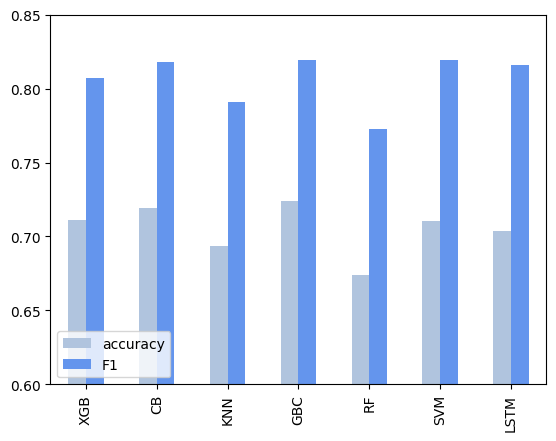

In [516]:
algorithms.plot(kind='bar', color = ("lightsteelblue", "cornflowerblue"))
plt.ylim(0.6, 0.85)

#plt.axhline(aggregate.iloc[0].mean(), color='blue', linewidth=2, linestyle='--', label="aggregate average score")
#plt.axhline(index.iloc[0].mean(), color='orange', linewidth=2, linestyle='--', label="index average score")
plt.legend(loc='lower left')
#plt.xticks(algorithms["accuracy"])
#plt.savefig('algorithms_accuracy_f1.png', bbox_inches='tight')  # Change the filename and format as needed
